<h1>Initialization</h1>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import math
from tqdm import tqdm
import pickle
import numba

In [2]:
import pandas as pd
import random

class DataStructureForRecommendationSorted:
    def __init__(self, path):
        self.ratings = pd.read_csv(path)
        self.user_to_idx = {}
        self.movie_to_idx = {}
        self.idx_to_user = []
        self.idx_to_movie = []
        self.data_by_user_idx = []
        self.data_by_movie_idx = []
        
        for index, user_id, movie_id, rating, timestamp in self.ratings.itertuples():
            if user_id not in self.user_to_idx:
                self.user_to_idx[user_id] = len(self.idx_to_user)
                self.idx_to_user.append(user_id)
                self.data_by_user_idx.append([])
                
            self.data_by_user_idx[self.user_to_idx[user_id]].append((movie_id, rating,timestamp))
            
            if movie_id not in self.movie_to_idx:
                self.movie_to_idx[movie_id] = len(self.idx_to_movie)
                self.idx_to_movie.append(movie_id)
                self.data_by_movie_idx.append([])
                
            self.data_by_movie_idx[self.movie_to_idx[movie_id]].append((user_id, rating,timestamp))

    def get_movie(self, movie_id):
        return self.data_by_movie_idx[self.movie_to_idx[movie_id]]

    def get_user(self, user_id):
        return self.data_by_user_idx[self.user_to_idx[user_id]]

    def get_all_users_list(self):
        return self.data_by_user_idx

    def get_all_movies_list(self):
        return self.data_by_movie_idx

    def get_user_from_index(self, user):
        return self.user_to_idx

    def get_movie_from_index(self, movie):
        return self.movie_to_idx

    def get_train_test_user(self):
        data_by_users = self.data_by_user_idx
        train_data = []
        val_data = []
        test_data = []
        
        for user_ratings in data_by_users:
            sorted_ratings = sorted(user_ratings, key=lambda x: x[2])  
    
            split_idx = int(0.7 * len(sorted_ratings))
            val_idx = int(0.9 * len(sorted_ratings))
    
            train_data.append(sorted_ratings[:split_idx])  
            val_data.append(sorted_ratings[split_idx:val_idx])  
            test_data.append(sorted_ratings[val_idx:])  
    
        return train_data,val_data, test_data

    def get_train_test_movies(self):
        data_by_movies = self.data_by_movie_idx
        train_data = []
        val_data = []
        test_data = []
        
        for movie_ratings in data_by_movies :
            sorted_ratings = sorted(movie_ratings, key=lambda x: x[2])  
    
            split_idx = int(0.8 * len(sorted_ratings))
            val_idx = int(0.9 * len(sorted_ratings))
    
            train_data.append(sorted_ratings[:split_idx])  
            val_data.append(sorted_ratings[split_idx:val_idx])  
            test_data.append(sorted_ratings[val_idx:])  
                    
        return train_data,val_data, test_data


In [3]:
import pandas as pd
import random

class DataStructureForRecommendation:
    def __init__(self, path):
        self.ratings = pd.read_csv(path)
        self.user_to_idx = {}
        self.movie_to_idx = {}
        self.idx_to_user = []
        self.idx_to_movie = []
        self.data_by_user_idx = []
        self.data_by_movie_idx = []
        
        for index, user_id, movie_id, rating, timestamp in self.ratings.itertuples():
            if user_id not in self.user_to_idx:
                self.user_to_idx[user_id] = len(self.idx_to_user)
                self.idx_to_user.append(user_id)
                self.data_by_user_idx.append([])
                
            self.data_by_user_idx[self.user_to_idx[user_id]].append((movie_id, rating))
            
            if movie_id not in self.movie_to_idx:
                self.movie_to_idx[movie_id] = len(self.idx_to_movie)
                self.idx_to_movie.append(movie_id)
                self.data_by_movie_idx.append([])
                
            self.data_by_movie_idx[self.movie_to_idx[movie_id]].append((user_id, rating))

    def get_movie(self, movie_id):
        return self.data_by_movie_idx[self.movie_to_idx[movie_id]]

    def get_user(self, user_id):
        return self.data_by_user_idx[self.user_to_idx[user_id]]

    def get_all_users_list(self):
        return self.data_by_user_idx

    def get_all_movies_list(self):
        return self.data_by_movie_idx

    def get_user_from_index(self, user):
        return self.user_to_idx

    def get_movie_from_index(self, movie):
        return self.movie_to_idx

    def get_train_test_user(self):
        data_by_users = self.data_by_user_idx
        train_data = []
        test_data = []
        
        for i in range(len(data_by_users)):
            train_data.append([])
            test_data.append([])
            for j in range(len(data_by_users[i])):
                ran = random.uniform(0, 1)
                if ran >= 0.9:
                    test_data[i].append(data_by_users[i][j])
                else:
                    train_data[i].append(data_by_users[i][j])
                    
        return train_data, test_data

    def get_train_test_movies(self):
        data_by_movies = self.data_by_movie_idx
        train_data = []
        test_data = []
        
        for i in range(len(data_by_movies)):
            train_data.append([])
            test_data.append([])
            for j in range(len(data_by_movies[i])):
                ran = random.uniform(0, 1)
                if ran >= 0.9:
                    test_data[i].append(data_by_movies[i][j])
                else:
                    train_data[i].append(data_by_movies[i][j])
                    
        return train_data, test_data


<h1>Data set plots (power laws, ratings and movies distributions)</h1>

In [4]:
dataset = DataStructureForRecommendation('/var/autofs/misc/home/omer/Desktop/ml-32m/ratings.csv')

data_by_user = dataset.get_all_users_list()
data_by_movie = dataset.get_all_movies_list()

movie_train_data, movie_test_data = dataset.get_train_test_movies()
user_train_data, user_test_data = dataset.get_train_test_user()

movie_to_idx = dataset.get_movie_from_index(1)
user_to_idx = dataset.get_user_from_index(1)


/tmp/ipykernel_12142/2956478479.py:12: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  movie_degree = pd.value_counts(movie_degree)
/tmp/ipykernel_12142/2956478479.py:12: FutureWarning: value_counts with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  movie_degree = pd.value_counts(movie_degree)
/tmp/ipykernel_12142/2956478479.py:13: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  user_degree = pd.value_counts(user_degree)
/tmp/ipykernel_12142/2956478479.py:13: FutureWarning: value_counts with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  user_degree = pd.value_counts(user_degree)


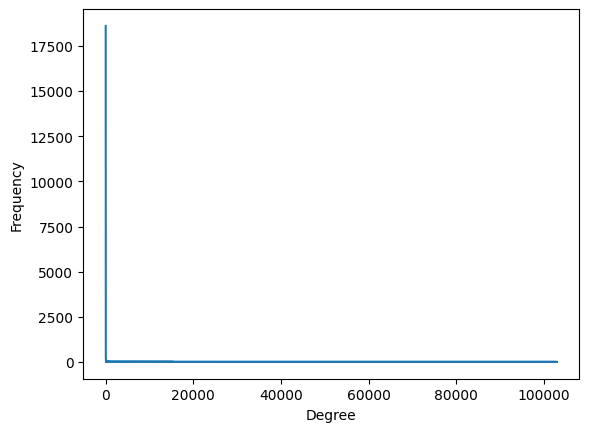

In [6]:
movielist_sorted = sorted(data_by_movie, key=len, reverse=True)
userlist_sorted = sorted(data_by_user, key=len, reverse=True)

user_degree = []
for user in userlist_sorted:
    user_degree.append(len(user))

movie_degree = []
for movie in movielist_sorted:
    movie_degree.append(len(movie))

movie_degree = pd.value_counts(movie_degree)
user_degree = pd.value_counts(user_degree)

fig, axes = plt.subplots()
axes.set_xlabel('Degree')
axes.set_ylabel('Frequency')
axes.plot(movie_degree)

plt.savefig('movies_degree.svg')


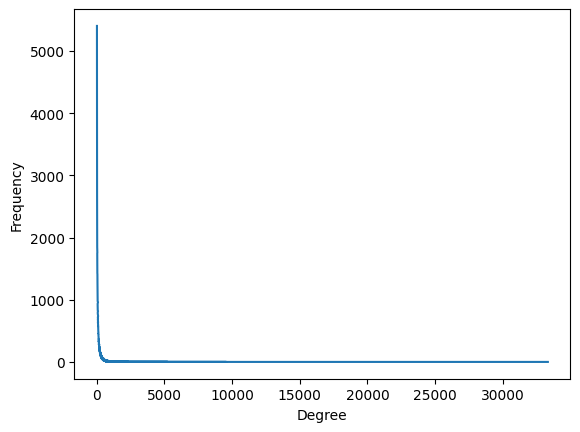

In [7]:
fig, axes = plt.subplots()
axes.set_xlabel('Degree')
axes.set_ylabel('Frequency')
axes.set_title('Degree Distribution for Users')
axes.plot(user_degree)

plt.savefig('users_degree.svg')

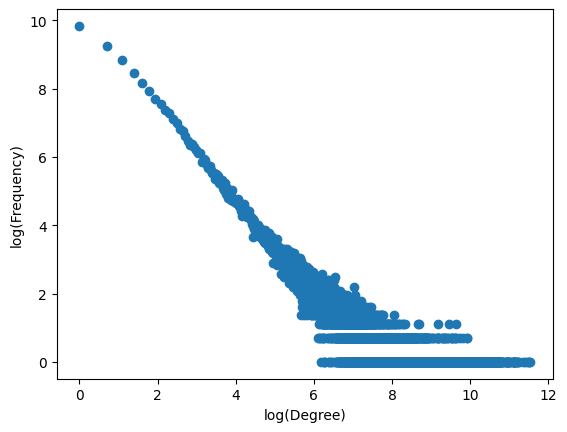

In [9]:
x = movie_degree.index
y = movie_degree.values

fig, axes = plt.subplots()
axes.scatter(np.log(x), np.log(y))
axes.set_xlabel('log(Degree)')
axes.set_ylabel('log(Frequency)')
axes.set_title("Zipf's Law for Movies")

plt.savefig("movies_degree_log.svg")


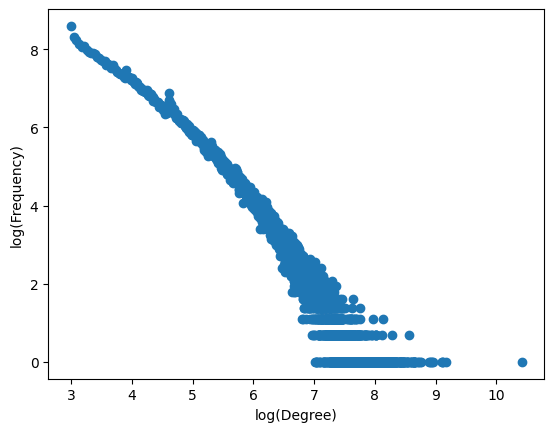

In [8]:
x = user_degree.index
y = user_degree.values

fig, axes = plt.subplots()
axes.scatter(np.log(x), np.log(y))
axes.set_xlabel('log(Degree)')
axes.set_ylabel('log(Frequency)')
axes.set_title("Zipf's Law for Users")

plt.savefig("users_degree_log.svg")


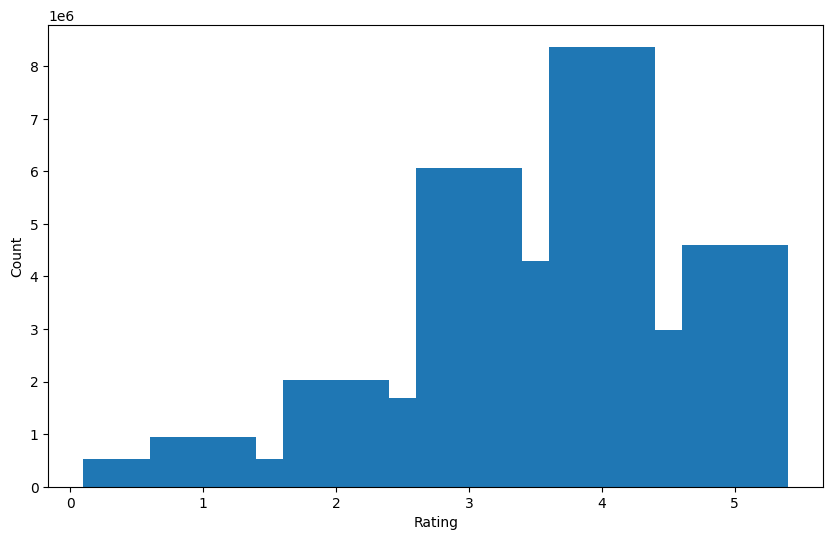

In [10]:
ratings_count = dataset.ratings['rating'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(ratings_count.index, ratings_count.values)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')

plt.savefig("dist_of_rating.svg")
plt.show()


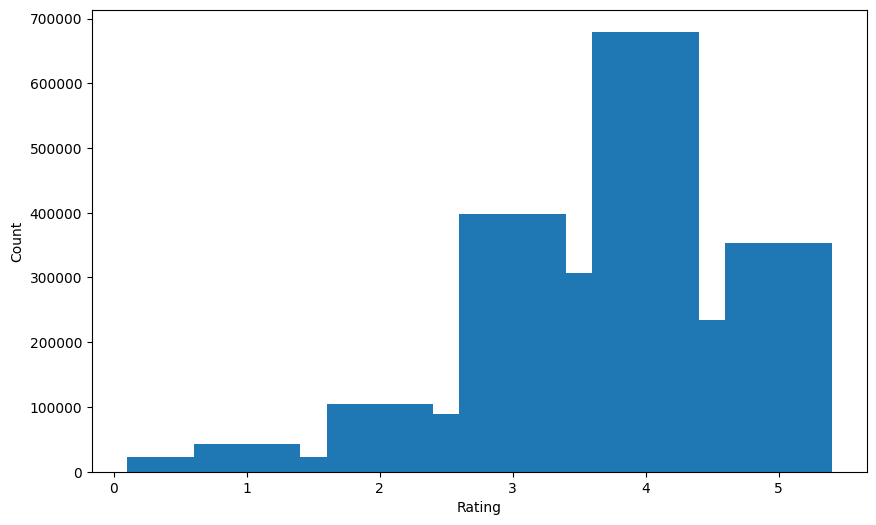

In [11]:
movies = pd.read_csv("/var/autofs/misc/home/omer/Desktop/ml-32m/movies.csv")
ratings = dataset.ratings
movies_and_ratings = ratings.merge(movies, on='movieId')

drama_movies_ratings = movies_and_ratings['rating'].loc[movies_and_ratings['genres'] == 'Drama'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(drama_movies_ratings.index, drama_movies_ratings.values)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Drama Movies Ratings')

plt.savefig("dist_of_drama_movies.svg")
plt.show()


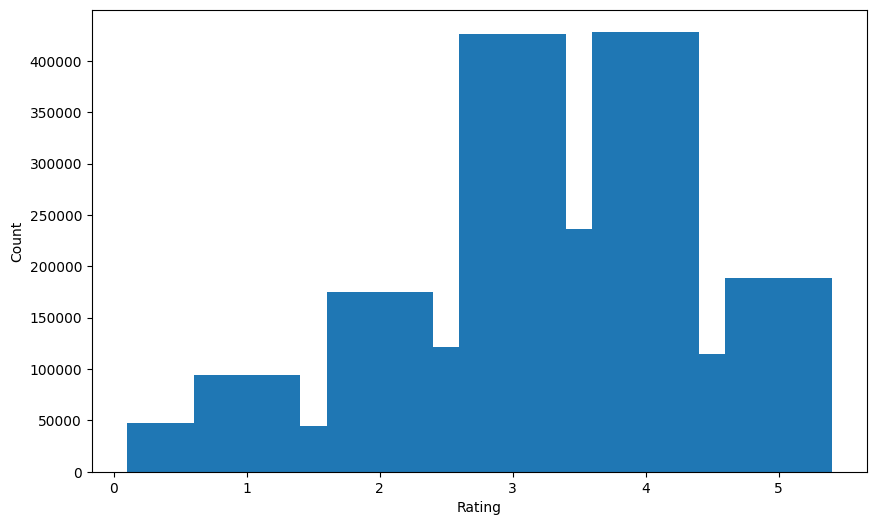

In [12]:
comedy_movies_ratings = movies_and_ratings['rating'].loc[movies_and_ratings['genres'] == 'Comedy'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(comedy_movies_ratings.index, comedy_movies_ratings.values)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Comedy Movies Ratings')

plt.savefig("dist_of_comedy_movies.svg")
plt.show()


<h1>ALS with biases only</h1>

<h3>ALS with biases only with only train , test randomly</h3>

In [14]:
dataset = DataStructureForRecommendation('/var/autofs/misc/home/omer/Desktop/ml-32m/ratings.csv')

movie_train_data, movie_test_data = dataset.get_train_test_movies()
user_train_data, user_test_data = dataset.get_train_test_user()

movie_to_idx = dataset.get_movie_from_index(1)
user_to_idx = dataset.get_user_from_index(1)


In [15]:
movies_user = []
rating_user = []
users_movie = []
rating_movie = []
for i in range(len(user_train_data)):
    if len(movies_user) <= i: 
        movies_user.append([])

    if len(rating_user) <= i:
        rating_user.append([])

    for movie, rating in user_train_data[i]:
        movies_user[i].append(movie)
        rating_user[i].append(rating)
        
for i in range(len(movie_train_data)):
    if len(users_movie) <= i: 
        users_movie.append([])

    if len(rating_movie) <= i:
        rating_movie.append([])

    for user, rating in movie_train_data[i]:
        users_movie[i].append(user)
        rating_movie[i].append(rating)


In [16]:
movies_user_test = []
rating_user_test = []
users_movie_test = []
rating_movie_test = []
for i in range(len(user_test_data)):
    if len(movies_user_test) <= i: 
        movies_user_test.append([])

    if len(rating_user_test) <= i:
        rating_user_test.append([])

    for movie, rating in user_test_data[i]:
        movies_user_test[i].append(movie)
        rating_user_test[i].append(rating)
        
for i in range(len(movie_test_data)):
    if len(users_movie_test) <= i: 
        users_movie_test.append([])

    if len(rating_movie_test) <= i:
        rating_movie_test.append([])

    for user, rating in movie_test_data[i]:
        users_movie_test[i].append(user)
        rating_movie_test[i].append(rating)


In [17]:
def calculate_user_bias():
        for i in range(len(user_train_data)):
            bias_sum = 0
            actual_rating = rating_user[i]
            movies_ids = movies_user[i]
            movie_index = [movie_to_idx[movie_id] for movie_id in movies_ids]
            y = movies_biases[movie_index]
            actual_rating = np.array(actual_rating)
            bias_sum = lambd * (actual_rating - y)
            bias_sum = np.sum(bias_sum, axis=0)
            bias = bias_sum / ( (lambd * len(actual_rating)) + gamma)
            users_biases[i] = bias
        return users_biases

def calculate_movie_bias():
        for i in range(len(movie_train_data)):
            bias_sum = 0
            actual_rating = rating_movie[i]
            users_ids = users_movie[i]
            user_index = [user_to_idx[user_id] for user_id in users_ids]
            y = users_biases[user_index]
            actual_rating = np.array(actual_rating)
            bias_sum = lambd * (actual_rating - y)
            bias_sum = np.sum(bias_sum, axis=0)
            bias = bias_sum / ( (lambd * len(actual_rating)) + gamma)
            movies_biases[i] = bias
        return movies_biases


def calculate_loss():
    overall_loss = 0
    n = 0
    for i in range(len(user_train_data)):
            movies_ids = movies_user[i]
            actual_rating = rating_user[i]
            movie_index = [movie_to_idx[movie_id] for movie_id in movies_ids]
            y = users_biases[i] + movies_biases[movie_index]
            error = actual_rating - y
            loss = error ** 2
            loss = np.sum(loss, axis=0)
            overall_loss += loss
            n += len(actual_rating)    
    return overall_loss / n


def calculate_loss_test():
    overall_loss = 0
    n = 0
    for i in range(len(user_test_data)):
            movies_ids = movies_user_test[i]
            actual_rating = rating_user_test[i]
            movie_index = [movie_to_idx[movie_id] for movie_id in movies_ids]
            y = users_biases[i] + movies_biases[movie_index]
            error = actual_rating - y
            loss = error ** 2
            loss = np.sum(loss, axis=0)
            overall_loss += loss
            n += len(actual_rating)   
    return overall_loss / n


def calculate_rmsq_test():
    rmsq = 0
    n = 0
    for i in range(len(user_test_data)):
        movies_ids = movies_user_test[i]
        actual_rating = rating_user_test[i]
        movie_index = [movie_to_idx[movie_id] for movie_id in movies_ids]
        y = users_biases[i] + movies_biases[movie_index]
        error = actual_rating - y
        loss = error ** 2
        loss = np.sum(loss, axis=0)
        rmsq += loss
        n += len(actual_rating)
    rmsq = np.sqrt(rmsq / n)
    return n, rmsq



def calculate_rmsq():
    rmsq = 0
    n = 0
    for i in range(len(user_train_data)):
        movies_ids = movies_user[i]
        actual_rating = rating_user[i]
        movie_index = [movie_to_idx[movie_id] for movie_id in movies_ids]
        y = users_biases[i] + movies_biases[movie_index]
        error = actual_rating - y
        loss = error ** 2
        loss = np.sum(loss, axis=0)
        rmsq += loss
        n += len(actual_rating)
    rmsq = np.sqrt(rmsq / n)
    return n, rmsq
    

loss_values_test = []
rmsq_values_test = []
loss_values = []
rmsq_values = []

repeat = 10
lambd = 0.1
gamma = 0.1
taw = 1


users_biases = np.zeros(len(user_train_data))
movies_biases = np.zeros(len(movie_train_data))
import time
for _ in tqdm(range(repeat)):

    epoch_stime = time.time()
    
    start_time = time.time()
    calculate_user_bias()
    end_time = time.time()
    execution_time = end_time - start_time
    print(f"Execution time for user bias : {execution_time:.6f} seconds")


    start_time = time.time()
    calculate_movie_bias()
    end_time = time.time()
    execution_time = end_time - start_time
    print(f"Execution time for movie bias : {execution_time:.6f} seconds")


    start_time = time.time()
    loss = calculate_loss()
    loss_values.append((lambd / 2) * loss)
    end_time = time.time()
    execution_time = end_time - start_time
    print(f"Execution time for train loss : {execution_time:.6f} seconds")


    start_time = time.time()
    n, rmsq = calculate_rmsq()
    rmsq_values.append(rmsq)
    end_time = time.time()
    execution_time = end_time - start_time
    print(f"Execution time for train rmsq : {execution_time:.6f} seconds")
    

    start_time = time.time()
    loss_test = calculate_loss_test()
    loss_values_test.append((lambd / 2) * loss_test)
    end_time = time.time()
    execution_time = end_time - start_time
    print(f"Execution time for test loss : {execution_time:.6f} seconds")
    
    

    start_time = time.time()
    n_test, rmsq_test = calculate_rmsq_test()
    rmsq_values_test.append(rmsq_test)
    end_time = time.time()
    execution_time = end_time - start_time
    print(f"Execution time for test rmsq : {execution_time:.6f} seconds")
    
    
    
    epoch_etime = time.time()
    
    execution_epoch_time = epoch_etime - epoch_stime

    print(f' epoch {_} ended in {execution_epoch_time} : loss train {loss}, loss test {loss_test}, rmsq {rmsq}, rmsq test {rmsq_test}')


  0%|                                                    | 0/10 [00:00<?, ?it/s]

Execution time for user bias : 2.909303 seconds
Execution time for movie bias : 9.227668 seconds
Execution time for train loss : 3.016852 seconds
Execution time for train rmsq : 3.122271 seconds
Execution time for test loss : 1.171512 seconds


 10%|████▍                                       | 1/10 [00:20<03:05, 20.59s/it]

Execution time for test rmsq : 1.144588 seconds
 epoch 0 ended in 20.592461109161377 : loss train 0.7416470311525978, loss test 0.7534923670835005, rmsq 0.8611893120287767, rmsq test 0.8680393810671844
Execution time for user bias : 2.805581 seconds
Execution time for movie bias : 8.874171 seconds
Execution time for train loss : 2.997939 seconds
Execution time for train rmsq : 2.988839 seconds
Execution time for test loss : 1.146335 seconds


 20%|████████▊                                   | 2/10 [00:40<02:41, 20.22s/it]

Execution time for test rmsq : 1.145826 seconds
 epoch 1 ended in 19.959149599075317 : loss train 0.7187327282927454, loss test 0.7306523389587682, rmsq 0.8477810615322481, rmsq test 0.8547820417853713
Execution time for user bias : 2.792736 seconds
Execution time for movie bias : 8.732981 seconds
Execution time for train loss : 3.005826 seconds
Execution time for train rmsq : 3.051367 seconds
Execution time for test loss : 1.134748 seconds


 30%|█████████████▏                              | 3/10 [01:00<02:20, 20.05s/it]

Execution time for test rmsq : 1.127016 seconds
 epoch 2 ended in 19.844931840896606 : loss train 0.717921940431133, loss test 0.7299056323384744, rmsq 0.8473027442603577, rmsq test 0.8543451482500936
Execution time for user bias : 2.804610 seconds
Execution time for movie bias : 8.914889 seconds
Execution time for train loss : 3.041913 seconds
Execution time for train rmsq : 2.998903 seconds
Execution time for test loss : 1.165909 seconds


 40%|█████████████████▌                          | 4/10 [01:20<02:00, 20.07s/it]

Execution time for test rmsq : 1.167104 seconds
 epoch 3 ended in 20.09363341331482 : loss train 0.7178828467764603, loss test 0.7298821207958018, rmsq 0.8472796744738188, rmsq test 0.8543313881602396
Execution time for user bias : 2.843897 seconds
Execution time for movie bias : 8.783216 seconds
Execution time for train loss : 2.923060 seconds
Execution time for train rmsq : 3.021823 seconds
Execution time for test loss : 1.186929 seconds


 50%|██████████████████████                      | 5/10 [01:40<01:40, 20.01s/it]

Execution time for test rmsq : 1.141882 seconds
 epoch 4 ended in 19.901077270507812 : loss train 0.7178552919772289, loss test 0.7298576870953339, rmsq 0.847263413571735, rmsq test 0.8543170881442873
Execution time for user bias : 2.835705 seconds
Execution time for movie bias : 8.649644 seconds
Execution time for train loss : 2.910318 seconds
Execution time for train rmsq : 2.898728 seconds
Execution time for test loss : 1.103234 seconds


 60%|██████████████████████████▍                 | 6/10 [01:59<01:19, 19.84s/it]

Execution time for test rmsq : 1.109259 seconds
 epoch 5 ended in 19.507198810577393 : loss train 0.7178285421295096, loss test 0.7298310295508148, rmsq 0.8472476273968016, rmsq test 0.8543014863330245
Execution time for user bias : 2.711154 seconds
Execution time for movie bias : 8.312942 seconds
Execution time for train loss : 2.893586 seconds
Execution time for train rmsq : 2.877172 seconds
Execution time for test loss : 1.126904 seconds


 70%|██████████████████████████████▊             | 7/10 [02:18<00:58, 19.58s/it]

Execution time for test rmsq : 1.114207 seconds
 epoch 6 ended in 19.036211729049683 : loss train 0.7178047315587571, loss test 0.729806505522966, rmsq 0.8472335755615196, rmsq test 0.8542871329494353
Execution time for user bias : 2.730080 seconds
Execution time for movie bias : 8.233961 seconds
Execution time for train loss : 2.938890 seconds
Execution time for train rmsq : 2.980211 seconds
Execution time for test loss : 1.114206 seconds


 80%|███████████████████████████████████▏        | 8/10 [02:38<00:38, 19.43s/it]

Execution time for test rmsq : 1.111994 seconds
 epoch 7 ended in 19.109598636627197 : loss train 0.7177833251328704, loss test 0.7297841390605355, rmsq 0.8472209423361007, rmsq test 0.8542740421319938
Execution time for user bias : 2.743487 seconds
Execution time for movie bias : 8.417567 seconds
Execution time for train loss : 2.909773 seconds
Execution time for train rmsq : 2.882441 seconds
Execution time for test loss : 1.115718 seconds


 90%|███████████████████████████████████████▌    | 9/10 [02:57<00:19, 19.35s/it]

Execution time for test rmsq : 1.116128 seconds
 epoch 8 ended in 19.185349941253662 : loss train 0.7177636019866346, loss test 0.7297633701737876, rmsq 0.8472093023489736, rmsq test 0.8542618861764744
Execution time for user bias : 2.712258 seconds
Execution time for movie bias : 8.260350 seconds
Execution time for train loss : 2.888908 seconds
Execution time for train rmsq : 2.883375 seconds
Execution time for test loss : 1.107505 seconds


100%|███████████████████████████████████████████| 10/10 [03:16<00:00, 19.62s/it]

Execution time for test rmsq : 1.115944 seconds
 epoch 9 ended in 18.968591451644897 : loss train 0.7177451121224399, loss test 0.7297438034803265, rmsq 0.8471983900612889, rmsq test 0.8542504337021589


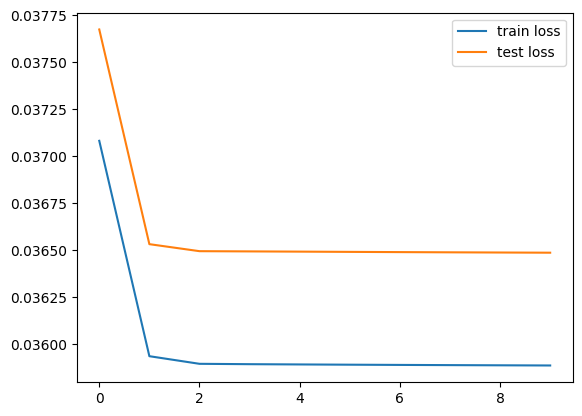

In [18]:
plt.plot(loss_values, label="Train loss")
plt.plot(loss_values_test, label="Test loss")
plt.legend(['train loss', 'test loss'])
plt.savefig('loss_without_factors_without_val.svg')


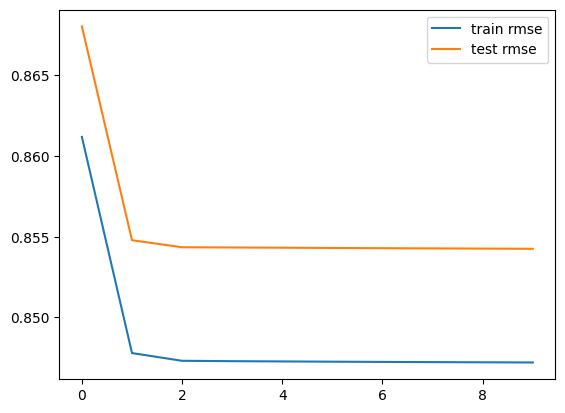

In [19]:
plt.plot(rmsq_values)
plt.plot(rmsq_values_test)
plt.legend(['train rmse', 'test rmse'])
plt.savefig('rmse_without_factors_without_val.svg')


<h3>ALS with biases with train , validation , test + with sorting the users and the movies by timestamp</h3>

In [4]:
dataset = DataStructureForRecommendationSorted('/var/autofs/misc/home/omer/Desktop/ml-32m/ratings.csv')

movie_train_data,movie_val_data, movie_test_data = dataset.get_train_test_movies()
user_train_data,user_val_data,user_test_data = dataset.get_train_test_user()

movie_to_idx = dataset.get_movie_from_index(1)
user_to_idx = dataset.get_user_from_index(1)


In [5]:
movies_user = []
rating_user = []
users_movie = []
rating_movie = []
for i in range(len(user_train_data)):
    if len(movies_user) <= i: 
        movies_user.append([])

    if len(rating_user) <= i:
        rating_user.append([])

    for movie, rating,_ in user_train_data[i]:
        movies_user[i].append(movie)
        rating_user[i].append(rating)
        
for i in range(len(movie_train_data)):
    if len(users_movie) <= i: 
        users_movie.append([])

    if len(rating_movie) <= i:
        rating_movie.append([])

    for user, rating,_ in movie_train_data[i]:
        users_movie[i].append(user)
        rating_movie[i].append(rating)


In [6]:
movies_user_val = []
rating_user_val = []
users_movie_val = []
rating_movie_val = []
for i in range(len(user_val_data)):
    if len(movies_user_val) <= i: 
        movies_user_val.append([])

    if len(rating_user_val) <= i:
        rating_user_val.append([])

    for movie, rating,_ in user_val_data[i]:
        movies_user_val[i].append(movie)
        rating_user_val[i].append(rating)
        
for i in range(len(movie_val_data)):
    if len(users_movie_val) <= i: 
        users_movie_val.append([])

    if len(rating_movie_val) <= i:
        rating_movie_val.append([])

    for user, rating,_ in movie_val_data[i]:
        users_movie_val[i].append(user)
        rating_movie_val[i].append(rating)


In [7]:
movies_user_test = []
rating_user_test = []
users_movie_test = []
rating_movie_test = []
for i in range(len(user_test_data)):
    if len(movies_user_test) <= i: 
        movies_user_test.append([])

    if len(rating_user_test) <= i:
        rating_user_test.append([])

    for movie, rating,_ in user_test_data[i]:
        movies_user_test[i].append(movie)
        rating_user_test[i].append(rating)
        
for i in range(len(movie_test_data)):
    if len(users_movie_test) <= i: 
        users_movie_test.append([])

    if len(rating_movie_test) <= i:
        rating_movie_test.append([])

    for user, rating,_ in movie_test_data[i]:
        users_movie_test[i].append(user)
        rating_movie_test[i].append(rating)


In [8]:
def calculate_user_bias():
        for i in range(len(user_train_data)):
            bias_sum = 0
            actual_rating = rating_user[i]
            movies_ids = movies_user[i]
            movie_index = [movie_to_idx[movie_id] for movie_id in movies_ids]
            y = movies_biases[movie_index]
            actual_rating = np.array(actual_rating)
            bias_sum = lambd * (actual_rating - y)
            bias_sum = np.sum(bias_sum, axis=0)
            bias = bias_sum / ( (lambd * len(actual_rating)) + gamma)
            users_biases[i] = bias
        return users_biases

def calculate_movie_bias():
        for i in range(len(movie_train_data)):
            bias_sum = 0
            actual_rating = rating_movie[i]
            users_ids = users_movie[i]
            user_index = [user_to_idx[user_id] for user_id in users_ids]
            y = users_biases[user_index]
            actual_rating = np.array(actual_rating)
            bias_sum = lambd * (actual_rating - y)
            bias_sum = np.sum(bias_sum, axis=0)
            bias = bias_sum / ( (lambd * len(actual_rating)) + gamma)
            movies_biases[i] = bias
        return movies_biases


def calculate_loss():
    overall_loss = 0
    n = 0
    for i in range(len(user_train_data)):
            movies_ids = movies_user[i]
            actual_rating = rating_user[i]
            movie_index = [movie_to_idx[movie_id] for movie_id in movies_ids]
            y = users_biases[i] + movies_biases[movie_index]
            error = actual_rating - y
            loss = error ** 2
            loss = np.sum(loss, axis=0)
            overall_loss += loss
            n += len(actual_rating)    
    return overall_loss / n


def calculate_loss_val():
    overall_loss = 0
    n = 0
    for i in range(len(user_val_data)):
            movies_ids = movies_user_val[i]
            actual_rating = rating_user_val[i]
            movie_index = [movie_to_idx[movie_id] for movie_id in movies_ids]
            y = users_biases[i] + movies_biases[movie_index]
            error = actual_rating - y
            loss = error ** 2
            loss = np.sum(loss, axis=0)
            overall_loss += loss
            n += len(actual_rating)   
    return overall_loss / n


def calculate_rmsq_val():
    rmsq = 0
    n = 0
    for i in range(len(user_val_data)):
        movies_ids = movies_user_val[i]
        actual_rating = rating_user_val[i]
        movie_index = [movie_to_idx[movie_id] for movie_id in movies_ids]
        y = users_biases[i] + movies_biases[movie_index]
        error = actual_rating - y
        loss = error ** 2
        loss = np.sum(loss, axis=0)
        rmsq += loss
        n += len(actual_rating)
    rmsq = np.sqrt(rmsq / n)
    return n, rmsq



def calculate_rmsq():
    rmsq = 0
    n = 0
    for i in range(len(user_train_data)):
        movies_ids = movies_user[i]
        actual_rating = rating_user[i]
        movie_index = [movie_to_idx[movie_id] for movie_id in movies_ids]
        y = users_biases[i] + movies_biases[movie_index]
        error = actual_rating - y
        loss = error ** 2
        loss = np.sum(loss, axis=0)
        rmsq += loss
        n += len(actual_rating)
    rmsq = np.sqrt(rmsq / n)
    return n, rmsq
    

loss_values_val = []
rmsq_values_val = []
loss_values = []
rmsq_values = []

repeat = 10
lambd = 0.1
gamma = 0.1
taw = 1

users_biases = np.zeros(len(user_train_data))
movies_biases = np.zeros(len(movie_train_data))
import time
for _ in tqdm(range(repeat)):

    epoch_stime = time.time()
    
    start_time = time.time()
    calculate_user_bias()
    end_time = time.time()
    execution_time = end_time - start_time
    print(f"Execution time for user bias : {execution_time:.6f} seconds")


    start_time = time.time()
    calculate_movie_bias()
    end_time = time.time()
    execution_time = end_time - start_time
    print(f"Execution time for movie bias : {execution_time:.6f} seconds")


    start_time = time.time()
    loss = calculate_loss()
    loss_values.append((lambd / 2) * loss)
    end_time = time.time()
    execution_time = end_time - start_time
    print(f"Execution time for train loss : {execution_time:.6f} seconds")


    start_time = time.time()
    n, rmsq = calculate_rmsq()
    rmsq_values.append(rmsq)
    end_time = time.time()
    execution_time = end_time - start_time
    print(f"Execution time for train rmsq : {execution_time:.6f} seconds")
    

    start_time = time.time()
    loss_val = calculate_loss_val()
    loss_values_val.append((lambd / 2) * loss_val)
    end_time = time.time()
    execution_time = end_time - start_time
    print(f"Execution time for val loss : {execution_time:.6f} seconds")
    
    

    start_time = time.time()
    n_val, rmsq_val = calculate_rmsq_val()
    rmsq_values_val.append(rmsq_val)
    end_time = time.time()
    execution_time = end_time - start_time
    print(f"Execution time for val rmsq : {execution_time:.6f} seconds")
    
    
    
    epoch_etime = time.time()
    
    execution_epoch_time = epoch_etime - epoch_stime

    print(f' epoch {_} ended in {execution_epoch_time} : loss train {loss}, loss val {loss_val}, rmsq {rmsq}, rmsq val {rmsq_val}')


  0%|                                                    | 0/10 [00:00<?, ?it/s]

Execution time for user bias : 2.822494 seconds
Execution time for movie bias : 7.795324 seconds
Execution time for train loss : 3.002583 seconds
Execution time for train rmsq : 2.976145 seconds
Execution time for val loss : 1.533714 seconds


 10%|████▍                                       | 1/10 [00:19<02:57, 19.67s/it]

Execution time for val rmsq : 1.541070 seconds
 epoch 0 ended in 19.672123193740845 : loss train 0.742849580165733, loss val 0.7762703729933131, rmsq 0.8618872200965351, rmsq val 0.881062071021851
Execution time for user bias : 2.800190 seconds
Execution time for movie bias : 7.805838 seconds
Execution time for train loss : 2.969517 seconds
Execution time for train rmsq : 3.038688 seconds
Execution time for val loss : 1.540948 seconds


 20%|████████▊                                   | 2/10 [00:39<02:37, 19.68s/it]

Execution time for val rmsq : 1.535297 seconds
 epoch 1 ended in 19.69079279899597 : loss train 0.7187061718213678, loss val 0.7524804636334023, rmsq 0.8477653990470286, rmsq val 0.8674563179972824
Execution time for user bias : 2.924549 seconds
Execution time for movie bias : 8.190686 seconds
Execution time for train loss : 2.990862 seconds
Execution time for train rmsq : 2.984399 seconds
Execution time for val loss : 1.530574 seconds


 30%|█████████████▏                              | 3/10 [00:59<02:19, 19.91s/it]

Execution time for val rmsq : 1.548924 seconds
 epoch 2 ended in 20.170257806777954 : loss train 0.7181187932463726, loss val 0.7523099262782467, rmsq 0.8474189006898375, rmsq val 0.867358015053903
Execution time for user bias : 2.850142 seconds
Execution time for movie bias : 7.706189 seconds
Execution time for train loss : 2.959234 seconds
Execution time for train rmsq : 2.978973 seconds
Execution time for val loss : 1.550874 seconds


 40%|█████████████████▌                          | 4/10 [01:19<01:58, 19.77s/it]

Execution time for val rmsq : 1.517774 seconds
 epoch 3 ended in 19.563443183898926 : loss train 0.7180791286774181, loss val 0.7522581486696839, rmsq 0.847395497201524, rmsq val 0.8673281666530172
Execution time for user bias : 2.845556 seconds
Execution time for movie bias : 8.109475 seconds
Execution time for train loss : 3.016921 seconds
Execution time for train rmsq : 3.020984 seconds
Execution time for val loss : 1.535300 seconds


 50%|██████████████████████                      | 5/10 [01:39<01:39, 19.88s/it]

Execution time for val rmsq : 1.532368 seconds
 epoch 4 ended in 20.060867071151733 : loss train 0.7180197594784281, loss val 0.752116978363736, rmsq 0.847360466081837, rmsq val 0.8672467805438865
Execution time for user bias : 2.866867 seconds
Execution time for movie bias : 7.994221 seconds
Execution time for train loss : 2.973528 seconds
Execution time for train rmsq : 2.960631 seconds
Execution time for val loss : 1.532599 seconds


 60%|██████████████████████████▍                 | 6/10 [01:59<01:19, 19.87s/it]

Execution time for val rmsq : 1.540641 seconds
 epoch 5 ended in 19.86877751350403 : loss train 0.7179637791997134, loss val 0.751982763644183, rmsq 0.8473274332863969, rmsq val 0.8671693973176078
Execution time for user bias : 3.092944 seconds
Execution time for movie bias : 8.773064 seconds
Execution time for train loss : 3.079618 seconds
Execution time for train rmsq : 3.095665 seconds
Execution time for val loss : 1.576826 seconds


 70%|██████████████████████████████▊             | 7/10 [02:20<01:00, 20.31s/it]

Execution time for val rmsq : 1.578590 seconds
 epoch 6 ended in 21.197059154510498 : loss train 0.7179148934698525, loss val 0.7518664244921802, rmsq 0.8472985857829886, rmsq val 0.867102314892643
Execution time for user bias : 3.147851 seconds
Execution time for movie bias : 9.190399 seconds
Execution time for train loss : 3.005264 seconds
Execution time for train rmsq : 3.168762 seconds
Execution time for val loss : 1.498714 seconds


 80%|███████████████████████████████████▏        | 8/10 [02:41<00:41, 20.70s/it]

Execution time for val rmsq : 1.541731 seconds
 epoch 7 ended in 21.552988052368164 : loss train 0.7178710543119363, loss val 0.7517632971183277, rmsq 0.8472727154298882, rmsq val 0.867042846183698
Execution time for user bias : 2.793374 seconds
Execution time for movie bias : 8.059632 seconds
Execution time for train loss : 3.121358 seconds
Execution time for train rmsq : 3.197119 seconds
Execution time for val loss : 1.520928 seconds


 90%|███████████████████████████████████████▌    | 9/10 [03:02<00:20, 20.56s/it]

Execution time for val rmsq : 1.542779 seconds
 epoch 8 ended in 20.23547101020813 : loss train 0.7178305249986977, loss val 0.751669040360363, rmsq 0.8472487975787855, rmsq val 0.8669884891740852
Execution time for user bias : 2.857078 seconds
Execution time for movie bias : 8.071540 seconds
Execution time for train loss : 2.992556 seconds
Execution time for train rmsq : 2.995395 seconds
Execution time for val loss : 1.529016 seconds


100%|███████████████████████████████████████████| 10/10 [03:22<00:00, 20.20s/it]

Execution time for val rmsq : 1.550446 seconds
 epoch 9 ended in 19.996286630630493 : loss train 0.7177923415611455, loss val 0.7515810901254705, rmsq 0.8472262634982142, rmsq val 0.8669377660048445


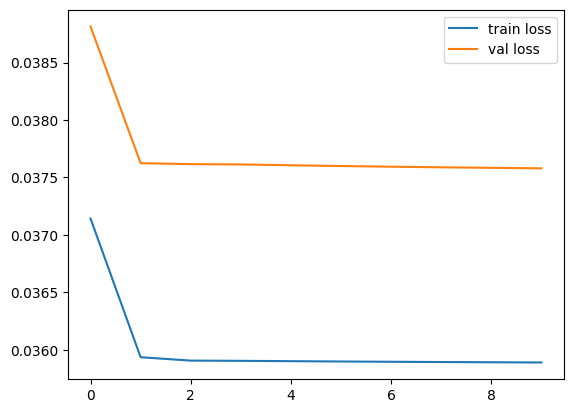

In [9]:
plt.plot(loss_values, label="Train loss")
plt.plot(loss_values_val, label="Val loss")
plt.legend(['train loss', 'val loss'])
plt.savefig('loss_without_factors_with_val.svg')


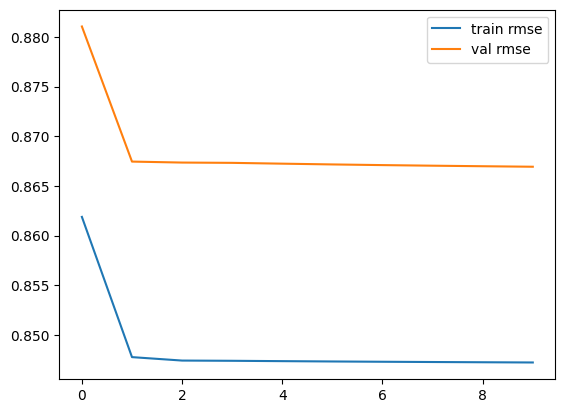

In [10]:
plt.plot(rmsq_values)
plt.plot(rmsq_values_val)
plt.legend(['train rmse', 'val rmse'])
plt.savefig('rmse_without_factors_with_val.svg')


In [11]:
def calculate_rmsq_test():
    rmsq = 0
    n = 0
    for i in range(len(user_test_data)):
        movies_ids = movies_user_test[i]
        actual_rating = rating_user_test[i]
        movie_index = [movie_to_idx[movie_id] for movie_id in movies_ids]
        y = users_biases[i] + movies_biases[movie_index]
        error = actual_rating - y
        loss = error ** 2
        loss = np.sum(loss, axis=0)
        rmsq += loss
        n += len(actual_rating)
    rmsq = np.sqrt(rmsq / n)
    return n, rmsq

In [12]:
n_test, rmsq_test = calculate_rmsq_test()
print(f'rmse for the test data = {rmsq_test}')

rmse for the test data = 0.8853603975666658


<h1>Hyper-parameter Selection (using the 100K dataset)</h1>

<h3>For The sorted and splitted dataset</h3>

In [4]:
dataset = DataStructureForRecommendationSorted('/var/autofs/misc/home/omer/Desktop/ml-latest-small/ratings.csv')

movie_train_data,movie_val_data, movie_test_data = dataset.get_train_test_movies()
user_train_data,user_val_data,user_test_data = dataset.get_train_test_user()

movie_to_idx = dataset.get_movie_from_index(1)
user_to_idx = dataset.get_user_from_index(1)


In [5]:
movies_user = []
rating_user = []
users_movie = []
rating_movie = []
for i in range(len(user_train_data)):
    if len(movies_user) <= i: 
        movies_user.append([])

    if len(rating_user) <= i:
        rating_user.append([])

    for movie, rating,_ in user_train_data[i]:
        movies_user[i].append(movie)
        rating_user[i].append(rating)
        
for i in range(len(movie_train_data)):
    if len(users_movie) <= i: 
        users_movie.append([])

    if len(rating_movie) <= i:
        rating_movie.append([])

    for user, rating,_ in movie_train_data[i]:
        users_movie[i].append(user)
        rating_movie[i].append(rating)


In [6]:
movies_user_val = []
rating_user_val = []
users_movie_val = []
rating_movie_val = []
for i in range(len(user_val_data)):
    if len(movies_user_val) <= i: 
        movies_user_val.append([])

    if len(rating_user_val) <= i:
        rating_user_val.append([])

    for movie, rating,_ in user_val_data[i]:
        movies_user_val[i].append(movie)
        rating_user_val[i].append(rating)
        
for i in range(len(movie_val_data)):
    if len(users_movie_val) <= i: 
        users_movie_val.append([])

    if len(rating_movie_val) <= i:
        rating_movie_val.append([])

    for user, rating,_ in movie_val_data[i]:
        users_movie_val[i].append(user)
        rating_movie_val[i].append(rating)


In [7]:
movies_user_test = []
rating_user_test = []
users_movie_test = []
rating_movie_test = []
for i in range(len(user_test_data)):
    if len(movies_user_test) <= i: 
        movies_user_test.append([])

    if len(rating_user_test) <= i:
        rating_user_test.append([])

    for movie, rating,_ in user_test_data[i]:
        movies_user_test[i].append(movie)
        rating_user_test[i].append(rating)
        
for i in range(len(movie_test_data)):
    if len(users_movie_test) <= i: 
        users_movie_test.append([])

    if len(rating_movie_test) <= i:
        rating_movie_test.append([])

    for user, rating,_ in movie_test_data[i]:
        users_movie_test[i].append(user)
        rating_movie_test[i].append(rating)


In [8]:
def update_user_latent_factors(lambd,gamma,tau,factors):
    for i in range(len(user_train_data)):
        x = np.zeros(factors)
        y = np.zeros((factors, factors))
        actual_rating = rating_user[i]
        movies_ids = movies_user[i]
        movie_index = [movie_to_idx[movie_id] for movie_id in movies_ids]
        error = actual_rating - users_biases[i] - movies_biases[movie_index]
        x = movies_latent[:, movie_index] * error
        x = np.sum(x, axis=1)
        y = np.matmul(movies_latent[:, movie_index], movies_latent[:, movie_index].T)
        y += np.identity(factors) * tau  
        users_latent[:, i] = np.linalg.solve(lambd * y, lambd * x)


def update_movie_latent_factors(lambd,gamma,tau,factors):
    for i in range(len(movie_train_data)):
        x = np.zeros(factors)
        y = np.zeros((factors, factors))
        actual_rating = rating_movie[i]
        users_ids = users_movie[i]
        user_index = [user_to_idx[user_id] for user_id in users_ids]
        error = actual_rating - movies_biases[i] - users_biases[user_index]
        x = users_latent[:, user_index] * error
        x = np.sum(x, axis=1)
        y = np.matmul(users_latent[:, user_index], users_latent[:, user_index].T)
        y += np.identity(factors) * tau  
        movies_latent[:, i] = np.linalg.solve(lambd * y, lambd * x)


def calculate_user_bias(lambd,gamma,tau):
        for i in range(len(user_train_data)):
            bias_sum = 0
            actual_rating = rating_user[i]
            movies_ids = movies_user[i]
            movie_index = [movie_to_idx[movie_id] for movie_id in movies_ids]
            x = np.dot(users_latent[:,i].T,movies_latent[:,movie_index])
            y = x + movies_biases[movie_index]
            actual_rating = np.array(actual_rating)
            bias_sum = lambd * (actual_rating - y)
            bias_sum = np.sum(bias_sum, axis=0)
            bias = bias_sum / ( (lambd * len(actual_rating)) + gamma)
            users_biases[i] = bias
        return users_biases

def calculate_movie_bias(lambd,gamma,tau):
        for i in range(len(movie_train_data)):
            bias_sum = 0
            actual_rating = rating_movie[i]
            users_ids = users_movie[i]
            user_index = [user_to_idx[user_id] for user_id in users_ids]
            x = np.dot(movies_latent[:,i].T,users_latent[:,user_index])
            y = x + users_biases[user_index]
            actual_rating = np.array(actual_rating)
            bias_sum = lambd * (actual_rating - y)
            bias_sum = np.sum(bias_sum, axis=0)
            bias = bias_sum / ( (lambd * len(actual_rating)) + gamma)
            movies_biases[i] = bias
        return movies_biases


def calculate_loss(lambd,gamma,tau):
    overall_loss = 0
    n = 0
    for i in range(len(user_train_data)):
            movies_ids = movies_user[i]
            actual_rating = rating_user[i]
            movie_index = [movie_to_idx[movie_id] for movie_id in movies_ids]
            x = np.dot(users_latent[:,i].T, movies_latent[:,movie_index])
            y = x + users_biases[i] + movies_biases[movie_index]
            error = actual_rating - y
            loss = error ** 2
            loss = np.sum(loss, axis=0)
            overall_loss += loss
            n += len(actual_rating) 
    return overall_loss / n


def calculate_loss_val(lambd,gamma,tau):
    overall_loss = 0
    n = 0
    for i in range(len(user_val_data)):
            movies_ids = movies_user_val[i]
            actual_rating = rating_user_val[i]
            movie_index = [movie_to_idx[movie_id] for movie_id in movies_ids]
            x = np.dot(users_latent[:,i].T, movies_latent[:,movie_index])
            y = x + users_biases[i] + movies_biases[movie_index]
            error = actual_rating - y
            loss = error ** 2
            loss = np.sum(loss, axis=0)
            overall_loss += loss
            n += len(actual_rating)  
    return overall_loss / n
    



def calculate_rmse_val(lambd,gamma,tau):
    rmse = 0
    n = 0
    for i in range(len(user_val_data)):
        movies_ids = movies_user_val[i]
        actual_rating = rating_user_val[i]
        movie_index = [movie_to_idx[movie_id] for movie_id in movies_ids]
        x = np.dot(users_latent[:,i].T, movies_latent[:,movie_index])
        y = x + users_biases[i] + movies_biases[movie_index]
        error = actual_rating - y
        loss = error ** 2
        loss = np.sum(loss, axis=0)
        rmse += loss
        n += len(actual_rating)
    rmse = np.sqrt(rmse / n)
    return n, rmse


def calculate_rmse(lambd,gamma,tau):
    rmse = 0
    n = 0
    for i in range(len(user_train_data)):
        movies_ids = movies_user[i]
        actual_rating = rating_user[i]
        movie_index = [movie_to_idx[movie_id] for movie_id in movies_ids]
        x = np.dot(users_latent[:,i].T, movies_latent[:,movie_index])
        y = x + users_biases[i] + movies_biases[movie_index]
        error = actual_rating - y
        loss = error ** 2
        loss = np.sum(loss, axis=0)
        rmse += loss
        n += len(actual_rating)
    rmse = np.sqrt(rmse / n)
    return n, rmse
 

In [9]:
lambda_values = [0.01, 0.1, 0.2, 0.5]
gamma_values = [0.01, 0.1, 0.2]
tau_values = [0.5, 1, 2]  

best_rmse = float('inf')
best_params = (None, None, None)  
best_loss_values = []
best_rmse_values = []

for lambd in lambda_values:
    for gamma in gamma_values:
        for tau in tau_values:
            print(f'Training with λ={lambd}, γ={gamma}, τ={tau}')

            loss_values_val = []
            rmse_values_val = []
            loss_values = []
            rmse_values = []

            users_biases = np.zeros(len(user_train_data))
            movies_biases = np.zeros(len(movie_train_data))
            users_latent = np.random.normal(0, 1 / np.sqrt(10), size=(10, len(user_train_data)))
            movies_latent = np.random.normal(0, 1 / np.sqrt(10), size=(10, len(movie_train_data)))


            for _ in tqdm(range(10)):
                calculate_user_bias(lambd,gamma,tau)
                update_user_latent_factors(lambd,gamma,tau,10)
                calculate_movie_bias(lambd,gamma,tau)
                update_movie_latent_factors(lambd,gamma,tau,10)

                loss = calculate_loss(lambd,gamma,tau)
                loss_values.append((lambd / 2) * loss)

                n, rmse = calculate_rmse(lambd,gamma,tau)
                rmse_values.append(rmse)

                loss_val = calculate_loss_val(lambd,gamma,tau)
                loss_values_val.append((lambd / 2) * loss_val)

                n_val, rmse_val = calculate_rmse_val(lambd,gamma,tau)
                

                print(f'epoch {_} : loss train {loss} , loss val {loss_val}  rmse {rmse}  rmse val {rmse_val} ')

          

            if rmse_val < best_rmse:
                best_rmse = rmse_val
                best_params = (lambd, gamma, tau) 
                best_loss_values = loss_values
                best_rmse_values = rmse_values

print(f'Best parameters: λ = {best_params[0]}, γ = {best_params[1]}, τ = {best_params[2]}, RMSE = {best_rmse}')


Training with λ=0.01, γ=0.01, τ=0.5


 10%|████▍                                       | 1/10 [00:00<00:03,  2.49it/s]

epoch 0 : loss train 0.5441569722925683 , loss val 0.5906506414278296  rmse 0.7376699616309236  rmse val 0.768537989580105 


 20%|████████▊                                   | 2/10 [00:01<00:04,  1.72it/s]

epoch 1 : loss train 0.4331307287489108 , loss val 0.5201044115048645  rmse 0.6581266813835394  rmse val 0.7211826478118178 


 30%|█████████████▏                              | 3/10 [00:01<00:03,  1.88it/s]

epoch 2 : loss train 0.3968076092126035 , loss val 0.5007300343670305  rmse 0.6299266697105335  rmse val 0.7076228051490642 


 40%|█████████████████▌                          | 4/10 [00:01<00:02,  2.08it/s]

epoch 3 : loss train 0.37832413118313335 , loss val 0.4898206365728664  rmse 0.6150805891776567  rmse val 0.6998718715399744 


 50%|██████████████████████                      | 5/10 [00:02<00:02,  2.21it/s]

epoch 4 : loss train 0.36711354211997616 , loss val 0.4836924400830607  rmse 0.6058989537208133  rmse val 0.6954800069614229 


 60%|██████████████████████████▍                 | 6/10 [00:02<00:01,  2.30it/s]

epoch 5 : loss train 0.35961010456017467 , loss val 0.479246400100757  rmse 0.5996749991121646  rmse val 0.6922762455124088 


 70%|██████████████████████████████▊             | 7/10 [00:03<00:01,  2.32it/s]

epoch 6 : loss train 0.3541226226783028 , loss val 0.4752936401285221  rmse 0.5950820302095358  rmse val 0.6894154336309292 


 80%|███████████████████████████████████▏        | 8/10 [00:03<00:00,  2.38it/s]

epoch 7 : loss train 0.3498418025623536 , loss val 0.472310263195333  rmse 0.5914742619610371  rmse val 0.6872483271680863 


 90%|███████████████████████████████████████▌    | 9/10 [00:04<00:00,  2.37it/s]

epoch 8 : loss train 0.34658687867915455 , loss val 0.47023267012957837  rmse 0.5887162972766717  rmse val 0.6857351311764466 


100%|███████████████████████████████████████████| 10/10 [00:04<00:00,  2.25it/s]


epoch 9 : loss train 0.34412690605201196 , loss val 0.4685597558431332  rmse 0.5866233084799921  rmse val 0.6845142480935902 
Training with λ=0.01, γ=0.01, τ=1


 10%|████▍                                       | 1/10 [00:00<00:04,  2.16it/s]

epoch 0 : loss train 0.5599862096741618 , loss val 0.6124545919591553  rmse 0.7483222632490375  rmse val 0.7825947814540775 


 20%|████████▊                                   | 2/10 [00:00<00:03,  2.34it/s]

epoch 1 : loss train 0.43699843070370836 , loss val 0.5198438157709916  rmse 0.6610585682855252  rmse val 0.721001952681816 


 30%|█████████████▏                              | 3/10 [00:01<00:02,  2.38it/s]

epoch 2 : loss train 0.39739715516633 , loss val 0.49407029231953464  rmse 0.6303944441112485  rmse val 0.7029013389655299 


 40%|█████████████████▌                          | 4/10 [00:01<00:02,  2.33it/s]

epoch 3 : loss train 0.3793776717854141 , loss val 0.4844449794437711  rmse 0.6159364186224209  rmse val 0.6960208182545771 


 50%|██████████████████████                      | 5/10 [00:02<00:02,  2.36it/s]

epoch 4 : loss train 0.36908165791348846 , loss val 0.47962342485029263  rmse 0.6075209115030432  rmse val 0.6925484999985868 


 60%|██████████████████████████▍                 | 6/10 [00:02<00:01,  2.22it/s]

epoch 5 : loss train 0.3621249145039744 , loss val 0.47599377845574525  rmse 0.6017681567713387  rmse val 0.6899230235727354 


 70%|██████████████████████████████▊             | 7/10 [00:03<00:01,  2.15it/s]

epoch 6 : loss train 0.35720865935976814 , loss val 0.4728800712827717  rmse 0.5976693562161006  rmse val 0.6876627598487297 


 80%|███████████████████████████████████▏        | 8/10 [00:03<00:00,  2.24it/s]

epoch 7 : loss train 0.35367798787206356 , loss val 0.47027738688523574  rmse 0.5947083216771593  rmse val 0.6857677353778288 


 90%|███████████████████████████████████████▌    | 9/10 [00:03<00:00,  2.24it/s]

epoch 8 : loss train 0.35099160720391204 , loss val 0.46821114224459803  rmse 0.5924454466057715  rmse val 0.6842595576567404 


100%|███████████████████████████████████████████| 10/10 [00:04<00:00,  2.28it/s]


epoch 9 : loss train 0.34882993891741204 , loss val 0.4665674141747241  rmse 0.5906182683573308  rmse val 0.6830574018153409 
Training with λ=0.01, γ=0.01, τ=2


 10%|████▍                                       | 1/10 [00:00<00:04,  2.22it/s]

epoch 0 : loss train 0.5855697808705337 , loss val 0.643748514976129  rmse 0.7652253137936131  rmse val 0.802339401360876 


 20%|████████▊                                   | 2/10 [00:00<00:03,  2.18it/s]

epoch 1 : loss train 0.4478723278220308 , loss val 0.5387207916027528  rmse 0.6692326410315256  rmse val 0.7339760156863117 


 30%|█████████████▏                              | 3/10 [00:01<00:03,  2.23it/s]

epoch 2 : loss train 0.4093580150834984 , loss val 0.5114344330381035  rmse 0.6398109213537219  rmse val 0.7151464416733845 


 40%|█████████████████▌                          | 4/10 [00:01<00:02,  2.33it/s]

epoch 3 : loss train 0.3928109356150477 , loss val 0.5016728393613583  rmse 0.6267463088164522  rmse val 0.7082886695136089 


 50%|██████████████████████                      | 5/10 [00:02<00:02,  2.37it/s]

epoch 4 : loss train 0.38390398919069957 , loss val 0.49642604222757425  rmse 0.6195998621616209  rmse val 0.7045750791985012 


 60%|██████████████████████████▍                 | 6/10 [00:02<00:01,  2.38it/s]

epoch 5 : loss train 0.37841830777458446 , loss val 0.49321001880124055  rmse 0.6151571407165688  rmse val 0.7022891276399205 


 70%|██████████████████████████████▊             | 7/10 [00:02<00:01,  2.39it/s]

epoch 6 : loss train 0.37468358709823424 , loss val 0.4911280282611674  rmse 0.6121140311234781  rmse val 0.7008052712852318 


 80%|███████████████████████████████████▏        | 8/10 [00:03<00:00,  2.41it/s]

epoch 7 : loss train 0.37195187067009694 , loss val 0.4896473699970352  rmse 0.6098785704302923  rmse val 0.6997480760938434 


 90%|███████████████████████████████████████▌    | 9/10 [00:03<00:00,  2.42it/s]

epoch 8 : loss train 0.3698372441414742 , loss val 0.4884990035925919  rmse 0.6081424538226831  rmse val 0.6989270373884472 


100%|███████████████████████████████████████████| 10/10 [00:04<00:00,  2.38it/s]


epoch 9 : loss train 0.36813485049646 , loss val 0.4875162565421512  rmse 0.6067411725739897  rmse val 0.6982236436430316 
Training with λ=0.01, γ=0.1, τ=0.5


 10%|████▍                                       | 1/10 [00:00<00:03,  2.30it/s]

epoch 0 : loss train 0.5862634506600864 , loss val 0.6298409983393956  rmse 0.7656784250976949  rmse val 0.7936252253673617 


 20%|████████▊                                   | 2/10 [00:00<00:03,  2.41it/s]

epoch 1 : loss train 0.4597636934479117 , loss val 0.5460116503340295  rmse 0.6780587684322884  rmse val 0.7389260114071161 


 30%|█████████████▏                              | 3/10 [00:01<00:02,  2.43it/s]

epoch 2 : loss train 0.4230634796082338 , loss val 0.5311773238083484  rmse 0.6504333014293117  rmse val 0.7288191296942942 


 40%|█████████████████▌                          | 4/10 [00:01<00:02,  2.45it/s]

epoch 3 : loss train 0.40608259491348114 , loss val 0.5240332820852202  rmse 0.6372461023132908  rmse val 0.7239014311943444 


 50%|██████████████████████                      | 5/10 [00:02<00:02,  2.45it/s]

epoch 4 : loss train 0.39539235357845665 , loss val 0.5180500394261734  rmse 0.6288023167724947  rmse val 0.7197569307941213 


 60%|██████████████████████████▍                 | 6/10 [00:02<00:01,  2.43it/s]

epoch 5 : loss train 0.3884386464189169 , loss val 0.5143901472650498  rmse 0.6232484628291649  rmse val 0.7172099743206656 


 70%|██████████████████████████████▊             | 7/10 [00:02<00:01,  2.41it/s]

epoch 6 : loss train 0.3839737981831255 , loss val 0.5106806731616492  rmse 0.6196561935324503  rmse val 0.7146192504835349 


 80%|███████████████████████████████████▏        | 8/10 [00:03<00:00,  2.43it/s]

epoch 7 : loss train 0.38103626508484184 , loss val 0.508270288955144  rmse 0.6172813500218858  rmse val 0.7129307743078174 


 90%|███████████████████████████████████████▌    | 9/10 [00:03<00:00,  2.45it/s]

epoch 8 : loss train 0.37913882515298464 , loss val 0.5076790320958  rmse 0.6157424990635165  rmse val 0.7125159872562861 


100%|███████████████████████████████████████████| 10/10 [00:04<00:00,  2.44it/s]


epoch 9 : loss train 0.3780227558402427 , loss val 0.5083387847411084  rmse 0.6148355518675239  rmse val 0.7129788108640455 
Training with λ=0.01, γ=0.1, τ=1


 10%|████▍                                       | 1/10 [00:00<00:04,  2.21it/s]

epoch 0 : loss train 0.6020925158715184 , loss val 0.6611058278530012  rmse 0.7759462068156003  rmse val 0.8130841456165537 


 20%|████████▊                                   | 2/10 [00:00<00:03,  2.34it/s]

epoch 1 : loss train 0.4748806028132708 , loss val 0.5793813506572465  rmse 0.6891158123372811  rmse val 0.7611710390294986 


 30%|█████████████▏                              | 3/10 [00:01<00:02,  2.39it/s]

epoch 2 : loss train 0.43703142520920873 , loss val 0.5550116670010339  rmse 0.661083523625577  rmse val 0.7449910516248057 


 40%|█████████████████▌                          | 4/10 [00:01<00:02,  2.37it/s]

epoch 3 : loss train 0.4175145564470827 , loss val 0.5369154732502938  rmse 0.6461536631847588  rmse val 0.7327451625567335 


 50%|██████████████████████                      | 5/10 [00:02<00:02,  2.33it/s]

epoch 4 : loss train 0.40483129333014256 , loss val 0.5222731833805276  rmse 0.6362635407833318  rmse val 0.7226847053733236 


 60%|██████████████████████████▍                 | 6/10 [00:02<00:01,  2.36it/s]

epoch 5 : loss train 0.3969680784719068 , loss val 0.5135980410252958  rmse 0.6300540282165544  rmse val 0.716657547944132 


 70%|██████████████████████████████▊             | 7/10 [00:02<00:01,  2.39it/s]

epoch 6 : loss train 0.3923156328259975 , loss val 0.5095191764731697  rmse 0.6263510460005615  rmse val 0.7138061196663767 


 80%|███████████████████████████████████▏        | 8/10 [00:03<00:00,  2.25it/s]

epoch 7 : loss train 0.3896326304414775 , loss val 0.5079696704732961  rmse 0.6242055994954527  rmse val 0.7127199102545797 


 90%|███████████████████████████████████████▌    | 9/10 [00:03<00:00,  2.31it/s]

epoch 8 : loss train 0.38802729634001487 , loss val 0.5079161495352421  rmse 0.6229183705270016  rmse val 0.7126823623012163 


100%|███████████████████████████████████████████| 10/10 [00:04<00:00,  2.34it/s]


epoch 9 : loss train 0.3870518197890399 , loss val 0.508966385969794  rmse 0.6221348887412117  rmse val 0.7134188012449588 
Training with λ=0.01, γ=0.1, τ=2


 10%|████▍                                       | 1/10 [00:00<00:03,  2.43it/s]

epoch 0 : loss train 0.6358203921109481 , loss val 0.7063866127905349  rmse 0.7973834661635192  rmse val 0.8404680914767287 


 20%|████████▊                                   | 2/10 [00:00<00:03,  2.51it/s]

epoch 1 : loss train 0.5008009271373481 , loss val 0.6082157559212473  rmse 0.7076728955791285  rmse val 0.7798818858783985 


 30%|█████████████▏                              | 3/10 [00:01<00:02,  2.48it/s]

epoch 2 : loss train 0.45187889834449974 , loss val 0.5697203143454995  rmse 0.6722193826010224  rmse val 0.7547981944503441 


 40%|█████████████████▌                          | 4/10 [00:01<00:02,  2.48it/s]

epoch 3 : loss train 0.4292403248379208 , loss val 0.5497491238152739  rmse 0.6551643494863871  rmse val 0.7414506887280325 


 50%|██████████████████████                      | 5/10 [00:02<00:02,  2.47it/s]

epoch 4 : loss train 0.41789298668126246 , loss val 0.5374068486708947  rmse 0.6464464298619511  rmse val 0.7330803834989003 


 60%|██████████████████████████▍                 | 6/10 [00:02<00:01,  2.48it/s]

epoch 5 : loss train 0.4117728514435621 , loss val 0.5299552671708345  rmse 0.6416952948585194  rmse val 0.7279802656465589 


 70%|██████████████████████████████▊             | 7/10 [00:03<00:01,  1.92it/s]

epoch 6 : loss train 0.4081344226135735 , loss val 0.5261763384922422  rmse 0.6388539916237305  rmse val 0.7253801337865838 


 80%|███████████████████████████████████▏        | 8/10 [00:03<00:01,  1.90it/s]

epoch 7 : loss train 0.405868940086397 , loss val 0.525158863738266  rmse 0.6370784410780175  rmse val 0.7246784554119613 


 90%|███████████████████████████████████████▌    | 9/10 [00:04<00:00,  1.93it/s]

epoch 8 : loss train 0.40447966839008714 , loss val 0.5260268589317387  rmse 0.6359871605544306  rmse val 0.7252770911394752 


100%|███████████████████████████████████████████| 10/10 [00:05<00:00,  1.99it/s]


epoch 9 : loss train 0.40369234045840174 , loss val 0.5280180218900109  rmse 0.6353678780505053  rmse val 0.7266484857825074 
Training with λ=0.01, γ=0.2, τ=0.5


 10%|████▍                                       | 1/10 [00:00<00:04,  2.06it/s]

epoch 0 : loss train 0.6496660906799511 , loss val 0.7052975854626927  rmse 0.8060186664587559  rmse val 0.8398199720551379 


 20%|████████▊                                   | 2/10 [00:01<00:05,  1.45it/s]

epoch 1 : loss train 0.5038404482439612 , loss val 0.6078417783832284  rmse 0.709817193539267  rmse val 0.7796420835121899 


 30%|█████████████▏                              | 3/10 [00:01<00:04,  1.67it/s]

epoch 2 : loss train 0.45152210826268585 , loss val 0.5695847511140595  rmse 0.671953948022248  rmse val 0.7547083881301834 


 40%|█████████████████▌                          | 4/10 [00:02<00:03,  1.79it/s]

epoch 3 : loss train 0.42872797708926336 , loss val 0.5543520969833331  rmse 0.6547732256967013  rmse val 0.7445482502721588 


 50%|██████████████████████                      | 5/10 [00:02<00:02,  1.89it/s]

epoch 4 : loss train 0.4167350117538069 , loss val 0.5475659487399623  rmse 0.6455501620740304  rmse val 0.7399769920341864 


 60%|██████████████████████████▍                 | 6/10 [00:03<00:02,  1.95it/s]

epoch 5 : loss train 0.4102020050415321 , loss val 0.5451900426081158  rmse 0.6404701437549858  rmse val 0.7383698548885347 


 70%|██████████████████████████████▊             | 7/10 [00:03<00:01,  1.97it/s]

epoch 6 : loss train 0.4065879457887773 , loss val 0.5453078745471654  rmse 0.6376424905766376  rmse val 0.7384496425262629 


 80%|███████████████████████████████████▏        | 8/10 [00:04<00:01,  2.00it/s]

epoch 7 : loss train 0.4047361392969483 , loss val 0.5471432642011548  rmse 0.63618876074397  rmse val 0.7396913303541922 


 90%|███████████████████████████████████████▌    | 9/10 [00:04<00:00,  1.97it/s]

epoch 8 : loss train 0.4038726972037502 , loss val 0.550381360506663  rmse 0.6355097931611677  rmse val 0.7418769173566886 


100%|███████████████████████████████████████████| 10/10 [00:05<00:00,  1.91it/s]


epoch 9 : loss train 0.40365435587653126 , loss val 0.554378946902754  rmse 0.6353379855451201  rmse val 0.7445662810675447 
Training with λ=0.01, γ=0.2, τ=1


 10%|████▍                                       | 1/10 [00:00<00:04,  1.86it/s]

epoch 0 : loss train 0.6586949054624441 , loss val 0.7275490906724912  rmse 0.8116002128279933  rmse val 0.8529648824380117 


 20%|████████▊                                   | 2/10 [00:01<00:04,  1.97it/s]

epoch 1 : loss train 0.5128955497747316 , loss val 0.6354987778935726  rmse 0.7161672638251009  rmse val 0.797181772178449 


 30%|█████████████▏                              | 3/10 [00:01<00:03,  2.01it/s]

epoch 2 : loss train 0.46080089105524313 , loss val 0.5879348919850089  rmse 0.67882316626294  rmse val 0.7667691256075775 


 40%|█████████████████▌                          | 4/10 [00:02<00:03,  1.95it/s]

epoch 3 : loss train 0.43562492290937915 , loss val 0.5665402468084962  rmse 0.6600188807218921  rmse val 0.7526886785441217 


 50%|██████████████████████                      | 5/10 [00:02<00:02,  1.94it/s]

epoch 4 : loss train 0.42273715166024584 , loss val 0.5557103245145889  rmse 0.6501823987622595  rmse val 0.7454598074440961 


 60%|██████████████████████████▍                 | 6/10 [00:03<00:02,  1.97it/s]

epoch 5 : loss train 0.4156173040312327 , loss val 0.5510769494950425  rmse 0.6446838791463865  rmse val 0.7423455728264583 


 70%|██████████████████████████████▊             | 7/10 [00:03<00:01,  2.00it/s]

epoch 6 : loss train 0.41172699468728846 , loss val 0.5510463983636018  rmse 0.6416595629204699  rmse val 0.7423249951090168 


 80%|███████████████████████████████████▏        | 8/10 [00:04<00:00,  2.00it/s]

epoch 7 : loss train 0.4099797040483348 , loss val 0.5536033813243139  rmse 0.6402965750715326  rmse val 0.7440452817700773 


 90%|███████████████████████████████████████▌    | 9/10 [00:04<00:00,  1.96it/s]

epoch 8 : loss train 0.4096393064277519 , loss val 0.5569476888068519  rmse 0.6400307074100053  rmse val 0.7462892795738472 


100%|███████████████████████████████████████████| 10/10 [00:05<00:00,  1.95it/s]


epoch 9 : loss train 0.4100293947989379 , loss val 0.5604167669179817  rmse 0.6403353768135397  rmse val 0.7486098896741759 
Training with λ=0.01, γ=0.2, τ=2


 10%|████▍                                       | 1/10 [00:00<00:04,  2.02it/s]

epoch 0 : loss train 0.6908424065739982 , loss val 0.7567566827990337  rmse 0.8311693007889537  rmse val 0.869917629893218 


 20%|████████▊                                   | 2/10 [00:01<00:04,  1.97it/s]

epoch 1 : loss train 0.5371129560490364 , loss val 0.6473263558653359  rmse 0.7328799056114422  rmse val 0.804565942521392 


 30%|█████████████▏                              | 3/10 [00:01<00:03,  1.93it/s]

epoch 2 : loss train 0.47915617016054757 , loss val 0.5948360322145562  rmse 0.6922110734165898  rmse val 0.77125613917463 


 40%|█████████████████▌                          | 4/10 [00:02<00:03,  1.96it/s]

epoch 3 : loss train 0.4529760389952099 , loss val 0.5696749330237597  rmse 0.6730349463402401  rmse val 0.7547681319609088 


 50%|██████████████████████                      | 5/10 [00:02<00:02,  2.01it/s]

epoch 4 : loss train 0.440542049799884 , loss val 0.5587319665331784  rmse 0.6637334177212143  rmse val 0.7474837567018954 


 60%|██████████████████████████▍                 | 6/10 [00:03<00:01,  2.02it/s]

epoch 5 : loss train 0.43492188490181777 , loss val 0.5559222614012692  rmse 0.6594860763517436  rmse val 0.7456019456796429 


 70%|██████████████████████████████▊             | 7/10 [00:03<00:01,  2.03it/s]

epoch 6 : loss train 0.4324787379029003 , loss val 0.5576418982952119  rmse 0.6576311564265339  rmse val 0.746754242234493 


 80%|███████████████████████████████████▏        | 8/10 [00:04<00:01,  2.00it/s]

epoch 7 : loss train 0.43160243843427915 , loss val 0.5616332821396531  rmse 0.6569645640628413  rmse val 0.7494219653437262 


 90%|███████████████████████████████████████▌    | 9/10 [00:04<00:00,  1.96it/s]

epoch 8 : loss train 0.43159135152630823 , loss val 0.5666188935021198  rmse 0.6569561260284497  rmse val 0.7527409205710287 


100%|███████████████████████████████████████████| 10/10 [00:05<00:00,  1.93it/s]


epoch 9 : loss train 0.43208908811603025 , loss val 0.5718709084455954  rmse 0.6573348371386003  rmse val 0.7562214678555452 
Training with λ=0.1, γ=0.01, τ=0.5


 10%|████▍                                       | 1/10 [00:00<00:04,  2.06it/s]

epoch 0 : loss train 0.5440316597188668 , loss val 0.5845360533075923  rmse 0.7375850186377614  rmse val 0.7645495754413786 


 20%|████████▊                                   | 2/10 [00:00<00:03,  2.09it/s]

epoch 1 : loss train 0.432634787702245 , loss val 0.518970473039485  rmse 0.6577497911077167  rmse val 0.7203960529038765 


 30%|█████████████▏                              | 3/10 [00:01<00:03,  2.14it/s]

epoch 2 : loss train 0.3935376057726039 , loss val 0.49226718639695705  rmse 0.6273257573004666  rmse val 0.7016175499493702 


 40%|█████████████████▌                          | 4/10 [00:01<00:02,  2.13it/s]

epoch 3 : loss train 0.3740448817276638 , loss val 0.47947552318938  rmse 0.6115920876921674  rmse val 0.6924417110409944 


 50%|██████████████████████                      | 5/10 [00:02<00:02,  2.13it/s]

epoch 4 : loss train 0.36259323179337355 , loss val 0.47270691638802914  rmse 0.6021571487521954  rmse val 0.687536847294768 


 60%|██████████████████████████▍                 | 6/10 [00:02<00:01,  2.12it/s]

epoch 5 : loss train 0.3551424197250852 , loss val 0.4680809551965437  rmse 0.5959382683844738  rmse val 0.684164421171215 


 70%|██████████████████████████████▊             | 7/10 [00:03<00:01,  2.09it/s]

epoch 6 : loss train 0.3499467107764738 , loss val 0.46488172312472004  rmse 0.5915629389815371  rmse val 0.6818223545211172 


 80%|███████████████████████████████████▏        | 8/10 [00:03<00:00,  2.09it/s]

epoch 7 : loss train 0.34611867811211555 , loss val 0.4630793310374466  rmse 0.5883185175669006  rmse val 0.680499324788384 


 90%|███████████████████████████████████████▌    | 9/10 [00:04<00:00,  2.11it/s]

epoch 8 : loss train 0.34322171344195773 , loss val 0.46190496480887855  rmse 0.5858512724591095  rmse val 0.6796359060621198 


100%|███████████████████████████████████████████| 10/10 [00:04<00:00,  2.11it/s]


epoch 9 : loss train 0.3409944644083901 , loss val 0.4608950190291087  rmse 0.5839473130415022  rmse val 0.6788924944563084 
Training with λ=0.1, γ=0.01, τ=1


 10%|████▍                                       | 1/10 [00:00<00:04,  1.84it/s]

epoch 0 : loss train 0.5619422194870611 , loss val 0.6149834819774033  rmse 0.7496280540955369  rmse val 0.7842088254906363 


 20%|████████▊                                   | 2/10 [00:01<00:04,  1.99it/s]

epoch 1 : loss train 0.43661419182615074 , loss val 0.5280617478440294  rmse 0.6607678804437688  rmse val 0.7266785725780205 


 30%|█████████████▏                              | 3/10 [00:01<00:03,  2.04it/s]

epoch 2 : loss train 0.39791166114797283 , loss val 0.5014894152846109  rmse 0.6308023946910576  rmse val 0.7081591736923352 


 40%|█████████████████▌                          | 4/10 [00:01<00:02,  2.05it/s]

epoch 3 : loss train 0.38005055283313427 , loss val 0.49102527387491207  rmse 0.6164824026954332  rmse val 0.700731955796874 


 50%|██████████████████████                      | 5/10 [00:02<00:02,  2.08it/s]

epoch 4 : loss train 0.3699260370320302 , loss val 0.48479972389187703  rmse 0.6082154528060185  rmse val 0.696275609146175 


 60%|██████████████████████████▍                 | 6/10 [00:02<00:01,  2.09it/s]

epoch 5 : loss train 0.3635942492245601 , loss val 0.4804167425441309  rmse 0.6029877687188688  rmse val 0.6931210158003658 


 70%|██████████████████████████████▊             | 7/10 [00:03<00:01,  2.08it/s]

epoch 6 : loss train 0.3592325069310423 , loss val 0.4770401118537662  rmse 0.5993600811958053  rmse val 0.6906809045092865 


 80%|███████████████████████████████████▏        | 8/10 [00:03<00:00,  2.09it/s]

epoch 7 : loss train 0.35592492176809726 , loss val 0.47427482946611155  rmse 0.5965944365882884  rmse val 0.6886761426578617 


 90%|███████████████████████████████████████▌    | 9/10 [00:04<00:00,  2.13it/s]

epoch 8 : loss train 0.35328127321247976 , loss val 0.47209136238473814  rmse 0.5943746909252443  rmse val 0.687089049821592 


100%|███████████████████████████████████████████| 10/10 [00:04<00:00,  2.08it/s]


epoch 9 : loss train 0.35115424624453856 , loss val 0.4704319629502032  rmse 0.5925826914824113  rmse val 0.6858804290473691 
Training with λ=0.1, γ=0.01, τ=2


 10%|████▍                                       | 1/10 [00:00<00:05,  1.76it/s]

epoch 0 : loss train 0.5867876002143981 , loss val 0.6406405364848126  rmse 0.76602062649409  rmse val 0.8004002351853806 


 20%|████████▊                                   | 2/10 [00:01<00:04,  1.95it/s]

epoch 1 : loss train 0.4533938042554315 , loss val 0.5420632566422752  rmse 0.6733452340779071  rmse val 0.736249452727997 


 30%|█████████████▏                              | 3/10 [00:01<00:03,  2.01it/s]

epoch 2 : loss train 0.41397498545648803 , loss val 0.5138445417678752  rmse 0.6434088789070975  rmse val 0.7168295067642481 


 40%|█████████████████▌                          | 4/10 [00:02<00:02,  2.03it/s]

epoch 3 : loss train 0.39561148919736283 , loss val 0.5000851995683848  rmse 0.6289765410548813  rmse val 0.707167023812893 


 50%|██████████████████████                      | 5/10 [00:02<00:02,  2.04it/s]

epoch 4 : loss train 0.3856247381055045 , loss val 0.4918099907245091  rmse 0.6209869065491675  rmse val 0.7012916588157234 


 60%|██████████████████████████▍                 | 6/10 [00:02<00:01,  2.06it/s]

epoch 5 : loss train 0.37945966109420326 , loss val 0.4866922913385379  rmse 0.6160029716602049  rmse val 0.697633350219539 


 70%|██████████████████████████████▊             | 7/10 [00:03<00:01,  2.09it/s]

epoch 6 : loss train 0.3754186022480172 , loss val 0.4835226934022359  rmse 0.6127141276713123  rmse val 0.6953579606233296 


 80%|███████████████████████████████████▏        | 8/10 [00:03<00:00,  2.10it/s]

epoch 7 : loss train 0.37262134077638176 , loss val 0.48150278486629444  rmse 0.6104271789299538  rmse val 0.6939040170414742 


 90%|███████████████████████████████████████▌    | 9/10 [00:04<00:00,  2.10it/s]

epoch 8 : loss train 0.3705736473439734 , loss val 0.4801287725446701  rmse 0.6087476056166246  rmse val 0.6929132503745834 


100%|███████████████████████████████████████████| 10/10 [00:04<00:00,  2.05it/s]


epoch 9 : loss train 0.36900945093936427 , loss val 0.47912011761025936  rmse 0.6074614810334596  rmse val 0.6921850313393517 
Training with λ=0.1, γ=0.1, τ=0.5


 10%|████▍                                       | 1/10 [00:00<00:04,  1.96it/s]

epoch 0 : loss train 0.5424639227332247 , loss val 0.5844057244286861  rmse 0.7365215018811228  rmse val 0.7644643382321284 


 20%|████████▊                                   | 2/10 [00:01<00:03,  2.00it/s]

epoch 1 : loss train 0.42935822349898467 , loss val 0.5102514149065752  rmse 0.6552543197102821  rmse val 0.7143188468090249 


 30%|█████████████▏                              | 3/10 [00:01<00:03,  2.07it/s]

epoch 2 : loss train 0.39188738242346316 , loss val 0.48639279248770323  rmse 0.6260090913265263  rmse val 0.6974186637076063 


 40%|█████████████████▌                          | 4/10 [00:01<00:02,  2.09it/s]

epoch 3 : loss train 0.3736345016359984 , loss val 0.47711638660476385  rmse 0.6112564941462777  rmse val 0.690736119371764 


 50%|██████████████████████                      | 5/10 [00:02<00:02,  2.05it/s]

epoch 4 : loss train 0.3632906446985112 , loss val 0.47270648225456907  rmse 0.6027359659905083  rmse val 0.6875365315781912 


 60%|██████████████████████████▍                 | 6/10 [00:02<00:01,  2.06it/s]

epoch 5 : loss train 0.356431011642218 , loss val 0.4701208917148938  rmse 0.5970184349266093  rmse val 0.6856536237160085 


 70%|██████████████████████████████▊             | 7/10 [00:03<00:01,  2.01it/s]

epoch 6 : loss train 0.3514060993198846 , loss val 0.4680013384127552  rmse 0.5927951579760791  rmse val 0.6841062332801502 


 80%|███████████████████████████████████▏        | 8/10 [00:03<00:00,  2.00it/s]

epoch 7 : loss train 0.34776786303301854 , loss val 0.46619291272821106  rmse 0.58971846082094  rmse val 0.6827832106373231 


 90%|███████████████████████████████████████▌    | 9/10 [00:04<00:00,  2.03it/s]

epoch 8 : loss train 0.34520176020958865 , loss val 0.4648091293157611  rmse 0.5875387308166063  rmse val 0.6817691173086099 


100%|███████████████████████████████████████████| 10/10 [00:04<00:00,  2.04it/s]


epoch 9 : loss train 0.34333476703346366 , loss val 0.4636186011778232  rmse 0.5859477511122162  rmse val 0.6808954407086475 
Training with λ=0.1, γ=0.1, τ=1


 10%|████▍                                       | 1/10 [00:00<00:04,  1.82it/s]

epoch 0 : loss train 0.555644144470143 , loss val 0.6120127676984323  rmse 0.7454154173815719  rmse val 0.7823124488964958 


 20%|████████▊                                   | 2/10 [00:01<00:04,  1.87it/s]

epoch 1 : loss train 0.43504593261052077 , loss val 0.5235392364183832  rmse 0.659580118416649  rmse val 0.7235601125120035 


 30%|█████████████▏                              | 3/10 [00:01<00:03,  1.96it/s]

epoch 2 : loss train 0.39555819706990486 , loss val 0.4946963295381657  rmse 0.628934175466642  rmse val 0.703346521664937 


 40%|█████████████████▌                          | 4/10 [00:02<00:02,  2.02it/s]

epoch 3 : loss train 0.3768232046282518 , loss val 0.48318636155259265  rmse 0.6138592710289972  rmse val 0.6951160777543508 


 50%|██████████████████████                      | 5/10 [00:02<00:02,  2.04it/s]

epoch 4 : loss train 0.3663905633681311 , loss val 0.4775390082296157  rmse 0.6053020430893415  rmse val 0.6910419728421825 


 60%|██████████████████████████▍                 | 6/10 [00:03<00:01,  2.04it/s]

epoch 5 : loss train 0.3600637564555273 , loss val 0.47400344821373297  rmse 0.60005312802745  rmse val 0.6884790833523797 


 70%|██████████████████████████████▊             | 7/10 [00:03<00:01,  2.06it/s]

epoch 6 : loss train 0.3557104545429257 , loss val 0.47122838244064247  rmse 0.5964146666061505  rmse val 0.6864607654051632 


 80%|███████████████████████████████████▏        | 8/10 [00:03<00:00,  2.06it/s]

epoch 7 : loss train 0.35245587917086413 , loss val 0.4688476828881656  rmse 0.5936799467481314  rmse val 0.6847245306604441 


 90%|███████████████████████████████████████▌    | 9/10 [00:04<00:00,  2.08it/s]

epoch 8 : loss train 0.3499495427211902 , loss val 0.4668073954339957  rmse 0.5915653325890473  rmse val 0.6832330462104389 


100%|███████████████████████████████████████████| 10/10 [00:04<00:00,  2.04it/s]


epoch 9 : loss train 0.34803632364313164 , loss val 0.46511446439348947  rmse 0.5899460345176766  rmse val 0.681993009050305 
Training with λ=0.1, γ=0.1, τ=2


 10%|████▍                                       | 1/10 [00:00<00:04,  1.99it/s]

epoch 0 : loss train 0.5849480618929664 , loss val 0.6363259349085355  rmse 0.7648189732825451  rmse val 0.7977004042298935 


 20%|████████▊                                   | 2/10 [00:00<00:03,  2.10it/s]

epoch 1 : loss train 0.4545222807276406 , loss val 0.5416616197754697  rmse 0.6741826760809273  rmse val 0.7359766434986029 


 30%|█████████████▏                              | 3/10 [00:01<00:03,  2.04it/s]

epoch 2 : loss train 0.4142502424460228 , loss val 0.5110269907152342  rmse 0.6436227485460896  rmse val 0.714861518558129 


 40%|█████████████████▌                          | 4/10 [00:01<00:02,  2.06it/s]

epoch 3 : loss train 0.39521335093333476 , loss val 0.4972527889520611  rmse 0.628659964474703  rmse val 0.7051615339424444 


 50%|██████████████████████                      | 5/10 [00:02<00:02,  2.08it/s]

epoch 4 : loss train 0.38443508871608767 , loss val 0.4895690664091381  rmse 0.6200282967059549  rmse val 0.6996921225861686 


 60%|██████████████████████████▍                 | 6/10 [00:02<00:01,  2.06it/s]

epoch 5 : loss train 0.37786119868127016 , loss val 0.484768217116466  rmse 0.6147041554123985  rmse val 0.6962529835601898 


 70%|██████████████████████████████▊             | 7/10 [00:03<00:01,  1.99it/s]

epoch 6 : loss train 0.37346711931406007 , loss val 0.48154764863294175  rmse 0.6111195622086238  rmse val 0.6939363433579061 


 80%|███████████████████████████████████▏        | 8/10 [00:03<00:00,  2.02it/s]

epoch 7 : loss train 0.3702895856193417 , loss val 0.47913648690095517  rmse 0.6085142443849131  rmse val 0.6921968555988645 


 90%|███████████████████████████████████████▌    | 9/10 [00:04<00:00,  2.03it/s]

epoch 8 : loss train 0.36793580668388987 , loss val 0.4772341973668582  rmse 0.6065771234425923  rmse val 0.6908213932463717 


100%|███████████████████████████████████████████| 10/10 [00:04<00:00,  2.04it/s]


epoch 9 : loss train 0.36619594947757367 , loss val 0.4757858025271984  rmse 0.605141264067799  rmse val 0.6897722830958043 
Training with λ=0.1, γ=0.2, τ=0.5


 10%|████▍                                       | 1/10 [00:00<00:04,  2.03it/s]

epoch 0 : loss train 0.5404528776786729 , loss val 0.5935078542084984  rmse 0.7351550024849677  rmse val 0.7703946094103322 


 20%|████████▊                                   | 2/10 [00:00<00:03,  2.06it/s]

epoch 1 : loss train 0.4262706746073557 , loss val 0.517125015986547  rmse 0.6528940761006763  rmse val 0.7191140493597292 


 30%|█████████████▏                              | 3/10 [00:01<00:03,  2.06it/s]

epoch 2 : loss train 0.39200478221968393 , loss val 0.5001293211221045  rmse 0.6261028527483994  rmse val 0.7071982191168926 


 40%|█████████████████▌                          | 4/10 [00:01<00:02,  2.07it/s]

epoch 3 : loss train 0.37567679635186924 , loss val 0.4926240628242452  rmse 0.6129247884951866  rmse val 0.7018718279174946 


 50%|██████████████████████                      | 5/10 [00:02<00:02,  2.10it/s]

epoch 4 : loss train 0.366085020255858 , loss val 0.48498872320747083  rmse 0.6050496014839263  rmse val 0.6964113175469443 


 60%|██████████████████████████▍                 | 6/10 [00:02<00:01,  2.03it/s]

epoch 5 : loss train 0.35984435781093094 , loss val 0.4790037380462583  rmse 0.5998702841539418  rmse val 0.6921009594316846 


 70%|██████████████████████████████▊             | 7/10 [00:03<00:01,  2.02it/s]

epoch 6 : loss train 0.35530866755667945 , loss val 0.4746282331895544  rmse 0.596077736169268  rmse val 0.6889326768194076 


 80%|███████████████████████████████████▏        | 8/10 [00:03<00:00,  2.02it/s]

epoch 7 : loss train 0.3518824746850182 , loss val 0.4712336700587141  rmse 0.5931968262600688  rmse val 0.6864646167565478 


 90%|███████████████████████████████████████▌    | 9/10 [00:04<00:00,  2.04it/s]

epoch 8 : loss train 0.34919606025482297 , loss val 0.468520096030217  rmse 0.5909281345940663  rmse val 0.6844852781690903 


100%|███████████████████████████████████████████| 10/10 [00:04<00:00,  2.05it/s]


epoch 9 : loss train 0.3469857285877719 , loss val 0.4662155359838119  rmse 0.5890549453045716  rmse val 0.6827997773753386 
Training with λ=0.1, γ=0.2, τ=1


 10%|████▍                                       | 1/10 [00:00<00:04,  2.05it/s]

epoch 0 : loss train 0.5548113460581776 , loss val 0.6046224140712234  rmse 0.7448565942905907  rmse val 0.7775746999942985 


 20%|████████▊                                   | 2/10 [00:00<00:03,  2.06it/s]

epoch 1 : loss train 0.43354267586677 , loss val 0.5204485632289612  rmse 0.6584395764736275  rmse val 0.721421210686906 


 30%|█████████████▏                              | 3/10 [00:01<00:03,  2.08it/s]

epoch 2 : loss train 0.39467204206386197 , loss val 0.49674242356513776  rmse 0.6282292909948262  rmse val 0.7047995626879586 


 40%|█████████████████▌                          | 4/10 [00:01<00:02,  2.07it/s]

epoch 3 : loss train 0.3773613072190899 , loss val 0.4871983990243116  rmse 0.614297409419159  rmse val 0.6979959878282336 


 50%|██████████████████████                      | 5/10 [00:02<00:02,  2.04it/s]

epoch 4 : loss train 0.3678959587851054 , loss val 0.4823378833475738  rmse 0.6065442760302874  rmse val 0.6945054955488645 


 60%|██████████████████████████▍                 | 6/10 [00:02<00:01,  2.06it/s]

epoch 5 : loss train 0.3621345580851457 , loss val 0.47916156493063417  rmse 0.6017761694227728  rmse val 0.692214970172297 


 70%|██████████████████████████████▊             | 7/10 [00:03<00:01,  2.06it/s]

epoch 6 : loss train 0.3583554035834779 , loss val 0.47652782959583917  rmse 0.5986279341823917  rmse val 0.6903099518302189 


 80%|███████████████████████████████████▏        | 8/10 [00:03<00:00,  2.07it/s]

epoch 7 : loss train 0.3558066931177764 , loss val 0.4743584349562569  rmse 0.5964953420755073  rmse val 0.6887368401329037 


 90%|███████████████████████████████████████▌    | 9/10 [00:04<00:00,  2.10it/s]

epoch 8 : loss train 0.35397594006625877 , loss val 0.47276816780727  rmse 0.5949587717365454  rmse val 0.6875813899512333 


100%|███████████████████████████████████████████| 10/10 [00:04<00:00,  2.09it/s]


epoch 9 : loss train 0.35251759414861555 , loss val 0.4716986949486427  rmse 0.5937319211130689  rmse val 0.6868032432572247 
Training with λ=0.1, γ=0.2, τ=2


 10%|████▍                                       | 1/10 [00:00<00:04,  2.05it/s]

epoch 0 : loss train 0.5882085121903448 , loss val 0.649326134421193  rmse 0.7669475289681458  rmse val 0.805807752768111 


 20%|████████▊                                   | 2/10 [00:00<00:03,  2.07it/s]

epoch 1 : loss train 0.45215637712038215 , loss val 0.5455171074970734  rmse 0.672425740970988  rmse val 0.73859129936459 


 30%|█████████████▏                              | 3/10 [00:01<00:03,  1.99it/s]

epoch 2 : loss train 0.413526317839459 , loss val 0.5210920760433252  rmse 0.6430601199261691  rmse val 0.7218670764367393 


 40%|█████████████████▌                          | 4/10 [00:02<00:03,  1.97it/s]

epoch 3 : loss train 0.3963085054190822 , loss val 0.5097924344046021  rmse 0.6295303848259289  rmse val 0.7139975030800892 


 50%|██████████████████████                      | 5/10 [00:02<00:02,  2.00it/s]

epoch 4 : loss train 0.3872166710561894 , loss val 0.5022016087809885  rmse 0.6222673630009767  rmse val 0.7086618437456531 


 60%|██████████████████████████▍                 | 6/10 [00:03<00:02,  1.99it/s]

epoch 5 : loss train 0.3817851932521129 , loss val 0.4962414406421316  rmse 0.6178876866001725  rmse val 0.704444064949185 


 70%|██████████████████████████████▊             | 7/10 [00:03<00:01,  2.00it/s]

epoch 6 : loss train 0.3780863449345466 , loss val 0.4914783714898079  rmse 0.6148872619712874  rmse val 0.7010551843398691 


 80%|███████████████████████████████████▏        | 8/10 [00:04<00:01,  1.99it/s]

epoch 7 : loss train 0.3753751877802093 , loss val 0.4877692293857752  rmse 0.6126786986506135  rmse val 0.6984047747443993 


 90%|███████████████████████████████████████▌    | 9/10 [00:04<00:00,  1.95it/s]

epoch 8 : loss train 0.3733819340284681 , loss val 0.4850539970926815  rmse 0.6110498621458548  rmse val 0.6964581804334569 


100%|███████████████████████████████████████████| 10/10 [00:05<00:00,  1.97it/s]


epoch 9 : loss train 0.3719280119153587 , loss val 0.48322709214124376  rmse 0.609859009866509  rmse val 0.6951453748254705 
Training with λ=0.2, γ=0.01, τ=0.5


 10%|████▍                                       | 1/10 [00:00<00:05,  1.76it/s]

epoch 0 : loss train 0.5456985278863926 , loss val 0.5939894230619044  rmse 0.738714104296373  rmse val 0.7707070929100786 


 20%|████████▊                                   | 2/10 [00:01<00:04,  1.81it/s]

epoch 1 : loss train 0.4360180113870746 , loss val 0.5256732218091101  rmse 0.6603165993575162  rmse val 0.7250332556573595 


 30%|█████████████▏                              | 3/10 [00:01<00:03,  1.86it/s]

epoch 2 : loss train 0.40080977872220225 , loss val 0.5042271632619412  rmse 0.6330953946461799  rmse val 0.7100895459461019 


 40%|█████████████████▌                          | 4/10 [00:02<00:03,  1.89it/s]

epoch 3 : loss train 0.38245770652407335 , loss val 0.4945784222731525  rmse 0.6184316506486981  rmse val 0.7032626979110669 


 50%|██████████████████████                      | 5/10 [00:02<00:02,  1.91it/s]

epoch 4 : loss train 0.37075247180367366 , loss val 0.4883054961890786  rmse 0.6088944668854149  rmse val 0.6987885919139483 


 60%|██████████████████████████▍                 | 6/10 [00:03<00:02,  1.95it/s]

epoch 5 : loss train 0.3628836088467958 , loss val 0.48322354452574584  rmse 0.6023982145116267  rmse val 0.6951428231131684 


 70%|██████████████████████████████▊             | 7/10 [00:03<00:01,  1.95it/s]

epoch 6 : loss train 0.3574426001833254 , loss val 0.4787093331329303  rmse 0.5978650350901326  rmse val 0.6918882374581391 


 80%|███████████████████████████████████▏        | 8/10 [00:04<00:01,  1.88it/s]

epoch 7 : loss train 0.3535038026674414 , loss val 0.47482517420308307  rmse 0.594561857730078  rmse val 0.6890755939685305 


 90%|███████████████████████████████████████▌    | 9/10 [00:04<00:00,  1.88it/s]

epoch 8 : loss train 0.35049782661971673 , loss val 0.47170119644840375  rmse 0.592028569090814  rmse val 0.6868050643730023 


100%|███████████████████████████████████████████| 10/10 [00:05<00:00,  1.88it/s]


epoch 9 : loss train 0.348122829972995 , loss val 0.4691262523004764  rmse 0.5900193471175288  rmse val 0.6849279175946009 
Training with λ=0.2, γ=0.01, τ=1


 10%|████▍                                       | 1/10 [00:00<00:04,  1.86it/s]

epoch 0 : loss train 0.5617625572406304 , loss val 0.6159190204137751  rmse 0.7495082102556518  rmse val 0.784805084345008 


 20%|████████▊                                   | 2/10 [00:01<00:04,  1.94it/s]

epoch 1 : loss train 0.4410762141353344 , loss val 0.5300560574745944  rmse 0.6641356895509639  rmse val 0.7280494883416885 


 30%|█████████████▏                              | 3/10 [00:01<00:03,  1.82it/s]

epoch 2 : loss train 0.4024410725905549 , loss val 0.5049853501191337  rmse 0.6343824340179628  rmse val 0.7106232124826304 


 40%|█████████████████▌                          | 4/10 [00:02<00:03,  1.89it/s]

epoch 3 : loss train 0.3831620950356238 , loss val 0.4907535738526684  rmse 0.619000884519258  rmse val 0.7005380602456004 


 50%|██████████████████████                      | 5/10 [00:02<00:02,  1.94it/s]

epoch 4 : loss train 0.3717107327189633 , loss val 0.48200444995559644  rmse 0.6096808449664163  rmse val 0.6942654031100761 


 60%|██████████████████████████▍                 | 6/10 [00:03<00:02,  1.90it/s]

epoch 5 : loss train 0.364487233851041 , loss val 0.47608095961213787  rmse 0.6037277812483379  rmse val 0.6899862024795408 


 70%|██████████████████████████████▊             | 7/10 [00:03<00:01,  1.94it/s]

epoch 6 : loss train 0.3596800204722415 , loss val 0.47206451979396297  rmse 0.5997332911155103  rmse val 0.6870695159836179 


 80%|███████████████████████████████████▏        | 8/10 [00:04<00:01,  1.99it/s]

epoch 7 : loss train 0.35621359198527486 , loss val 0.4694215092915942  rmse 0.596836319257864  rmse val 0.6851434224245273 


 90%|███████████████████████████████████████▌    | 9/10 [00:04<00:00,  1.97it/s]

epoch 8 : loss train 0.3535365885011504 , loss val 0.4678239031502293  rmse 0.5945894285144585  rmse val 0.6839765369880968 


100%|███████████████████████████████████████████| 10/10 [00:05<00:00,  1.94it/s]


epoch 9 : loss train 0.35140190692623546 , loss val 0.46699025439538794  rmse 0.5927916218421406  rmse val 0.6833668519875602 
Training with λ=0.2, γ=0.01, τ=2


 10%|████▍                                       | 1/10 [00:00<00:05,  1.61it/s]

epoch 0 : loss train 0.5932275691453995 , loss val 0.6492777207741982  rmse 0.7702126778659253  rmse val 0.8057777117631129 


 20%|████████▊                                   | 2/10 [00:01<00:04,  1.65it/s]

epoch 1 : loss train 0.45180781866107866 , loss val 0.5423677693837194  rmse 0.6721665111124465  rmse val 0.7364562236709793 


 30%|█████████████▏                              | 3/10 [00:01<00:04,  1.75it/s]

epoch 2 : loss train 0.41313144439040633 , loss val 0.5137512135644162  rmse 0.6427530197442921  rmse val 0.7167644058994672 


 40%|█████████████████▌                          | 4/10 [00:02<00:03,  1.83it/s]

epoch 3 : loss train 0.3958856882890015 , loss val 0.5010125857185365  rmse 0.6291944757298823  rmse val 0.7078224252724241 


 50%|██████████████████████                      | 5/10 [00:03<00:03,  1.47it/s]

epoch 4 : loss train 0.38655083408602403 , loss val 0.4937491805614475  rmse 0.6217321240582828  rmse val 0.7026728830412111 


 60%|██████████████████████████▍                 | 6/10 [00:03<00:02,  1.58it/s]

epoch 5 : loss train 0.3808284980750671 , loss val 0.489325574953916  rmse 0.6171130350876305  rmse val 0.699518101948703 


 70%|██████████████████████████████▊             | 7/10 [00:04<00:01,  1.69it/s]

epoch 6 : loss train 0.37693055010936993 , loss val 0.48646359373007914  rmse 0.613946699730009  rmse val 0.6974694213584415 


 80%|███████████████████████████████████▏        | 8/10 [00:04<00:01,  1.78it/s]

epoch 7 : loss train 0.37402818481931766 , loss val 0.4843612609795299  rmse 0.6115784371765551  rmse val 0.6959606748800753 


 90%|███████████████████████████████████████▌    | 9/10 [00:05<00:00,  1.85it/s]

epoch 8 : loss train 0.37175906646789747 , loss val 0.4826820784440916  rmse 0.6097204822440341  rmse val 0.6947532500421222 


100%|███████████████████████████████████████████| 10/10 [00:05<00:00,  1.73it/s]


epoch 9 : loss train 0.3699727221404111 , loss val 0.48136455821942825  rmse 0.608253830354081  rmse val 0.6938044091957245 
Training with λ=0.2, γ=0.1, τ=0.5


 10%|████▍                                       | 1/10 [00:00<00:04,  1.90it/s]

epoch 0 : loss train 0.5392870276316938 , loss val 0.595085989244397  rmse 0.7343616463512332  rmse val 0.7714181675617946 


 20%|████████▊                                   | 2/10 [00:00<00:03,  2.03it/s]

epoch 1 : loss train 0.42440384618065097 , loss val 0.5213729270007096  rmse 0.651462850959785  rmse val 0.7220615811693 


 30%|█████████████▏                              | 3/10 [00:01<00:03,  2.06it/s]

epoch 2 : loss train 0.3886084415629256 , loss val 0.5006272589725775  rmse 0.6233846658066956  rmse val 0.7075501812398732 


 40%|█████████████████▌                          | 4/10 [00:02<00:03,  1.96it/s]

epoch 3 : loss train 0.3713861077087242 , loss val 0.48989830700427744  rmse 0.6094145614511719  rmse val 0.6999273583767657 


 50%|██████████████████████                      | 5/10 [00:02<00:02,  2.00it/s]

epoch 4 : loss train 0.3613855733216281 , loss val 0.48283382608272496  rmse 0.6011535355644414  rmse val 0.69486245119644 


 60%|██████████████████████████▍                 | 6/10 [00:02<00:01,  2.02it/s]

epoch 5 : loss train 0.35462760757652445 , loss val 0.4778391938991144  rmse 0.5955061776140735  rmse val 0.6912591365755062 


 70%|██████████████████████████████▊             | 7/10 [00:03<00:01,  2.02it/s]

epoch 6 : loss train 0.3496636730327052 , loss val 0.47434765382206234  rmse 0.5913236618237978  rmse val 0.6887290133441907 


 80%|███████████████████████████████████▏        | 8/10 [00:03<00:00,  2.03it/s]

epoch 7 : loss train 0.34583337518050056 , loss val 0.4718038802217431  rmse 0.5880759943923068  rmse val 0.6868798149762032 


 90%|███████████████████████████████████████▌    | 9/10 [00:04<00:00,  1.98it/s]

epoch 8 : loss train 0.3427282526628307 , loss val 0.4699126530334341  rmse 0.585429972467101  rmse val 0.6855017527573756 


100%|███████████████████████████████████████████| 10/10 [00:05<00:00,  1.99it/s]


epoch 9 : loss train 0.3401908839245855 , loss val 0.4685517204651295  rmse 0.5832588481322727  rmse val 0.6845083786668571 
Training with λ=0.2, γ=0.1, τ=1


 10%|████▍                                       | 1/10 [00:00<00:04,  2.06it/s]

epoch 0 : loss train 0.5593277432376205 , loss val 0.6074615780972418  rmse 0.7478821720282015  rmse val 0.779398215354155 


 20%|████████▊                                   | 2/10 [00:01<00:04,  1.96it/s]

epoch 1 : loss train 0.4382564595489982 , loss val 0.5286244555090458  rmse 0.6620094104686113  rmse val 0.7270656473173834 


 30%|█████████████▏                              | 3/10 [00:01<00:03,  1.97it/s]

epoch 2 : loss train 0.3980499611997347 , loss val 0.5023850364221025  rmse 0.6309120074937032  rmse val 0.708791250243753 


 40%|█████████████████▌                          | 4/10 [00:02<00:03,  1.92it/s]

epoch 3 : loss train 0.37851398528986796 , loss val 0.48873288106294177  rmse 0.6152349025289998  rmse val 0.6990943291594789 


 50%|██████████████████████                      | 5/10 [00:02<00:02,  1.87it/s]

epoch 4 : loss train 0.36734806724484853 , loss val 0.4813314005754919  rmse 0.6060924576703199  rmse val 0.693780513257249 


 60%|██████████████████████████▍                 | 6/10 [00:03<00:02,  1.84it/s]

epoch 5 : loss train 0.3603820979649892 , loss val 0.47665602081195013  rmse 0.6003183305255547  rmse val 0.6904027960632475 


 70%|██████████████████████████████▊             | 7/10 [00:03<00:01,  1.91it/s]

epoch 6 : loss train 0.35575126830170983 , loss val 0.47342216598966214  rmse 0.5964488815495506  rmse val 0.6880568043335246 


 80%|███████████████████████████████████▏        | 8/10 [00:04<00:01,  1.92it/s]

epoch 7 : loss train 0.35248911880527795 , loss val 0.4709278842718465  rmse 0.5937079406621389  rmse val 0.6862418555231432 


 90%|███████████████████████████████████████▌    | 9/10 [00:04<00:00,  1.75it/s]

epoch 8 : loss train 0.35005442144973137 , loss val 0.4688706369559831  rmse 0.5916539710419693  rmse val 0.6847412919898894 


100%|███████████████████████████████████████████| 10/10 [00:05<00:00,  1.85it/s]


epoch 9 : loss train 0.3481284239809241 , loss val 0.4672370213911324  rmse 0.5900240876277205  rmse val 0.68354738050199 
Training with λ=0.2, γ=0.1, τ=2


 10%|████▍                                       | 1/10 [00:00<00:04,  2.02it/s]

epoch 0 : loss train 0.5880556178201017 , loss val 0.6458730447423195  rmse 0.7668478452862091  rmse val 0.803662270323996 


 20%|████████▊                                   | 2/10 [00:01<00:04,  2.00it/s]

epoch 1 : loss train 0.4513153854090616 , loss val 0.5363605958221692  rmse 0.6718001082234667  rmse val 0.7323664354830642 


 30%|█████████████▏                              | 3/10 [00:01<00:05,  1.39it/s]

epoch 2 : loss train 0.4129894040752354 , loss val 0.5090786829726611  rmse 0.6426425165480691  rmse val 0.7134975003268484 


 40%|█████████████████▌                          | 4/10 [00:02<00:03,  1.51it/s]

epoch 3 : loss train 0.3953218060891897 , loss val 0.4960911140319547  rmse 0.6287462175545788  rmse val 0.7043373581118317 


 50%|██████████████████████                      | 5/10 [00:03<00:03,  1.65it/s]

epoch 4 : loss train 0.38478656208717865 , loss val 0.4889835924430641  rmse 0.6203116652838141  rmse val 0.699273617722751 


 60%|██████████████████████████▍                 | 6/10 [00:03<00:02,  1.65it/s]

epoch 5 : loss train 0.3779467943941586 , loss val 0.48454331169845655  rmse 0.6147737749726794  rmse val 0.6960914535450472 


 70%|██████████████████████████████▊             | 7/10 [00:04<00:01,  1.76it/s]

epoch 6 : loss train 0.37330228626581324 , loss val 0.48172803995471053  rmse 0.6109846857866514  rmse val 0.6940663080388721 


 80%|███████████████████████████████████▏        | 8/10 [00:04<00:01,  1.85it/s]

epoch 7 : loss train 0.3699772900597464 , loss val 0.479909104111882  rmse 0.6082575852874721  rmse val 0.6927547214648789 


 90%|███████████████████████████████████████▌    | 9/10 [00:05<00:00,  1.88it/s]

epoch 8 : loss train 0.36749130976916883 , loss val 0.47862755281376057  rmse 0.6062106150251485  rmse val 0.6918291355629369 


100%|███████████████████████████████████████████| 10/10 [00:05<00:00,  1.77it/s]


epoch 9 : loss train 0.3655760886456722 , loss val 0.4776246700229964  rmse 0.6046288850573318  rmse val 0.6911039502296282 
Training with λ=0.2, γ=0.2, τ=0.5


 10%|████▍                                       | 1/10 [00:00<00:04,  1.91it/s]

epoch 0 : loss train 0.5433382507332476 , loss val 0.5858799241783604  rmse 0.7371148151633147  rmse val 0.7654279353266122 


 20%|████████▊                                   | 2/10 [00:00<00:03,  2.02it/s]

epoch 1 : loss train 0.4261555455123248 , loss val 0.502554311458974  rmse 0.6528059018669522  rmse val 0.7089106512523098 


 30%|█████████████▏                              | 3/10 [00:01<00:03,  2.04it/s]

epoch 2 : loss train 0.3876178175277512 , loss val 0.4835221497650719  rmse 0.6225896060229011  rmse val 0.6953575697186821 


 40%|█████████████████▌                          | 4/10 [00:01<00:02,  2.04it/s]

epoch 3 : loss train 0.3691338838592568 , loss val 0.4730560437856907  rmse 0.6075638928205467  rmse val 0.6877906976585906 


 50%|██████████████████████                      | 5/10 [00:02<00:02,  2.06it/s]

epoch 4 : loss train 0.3585316770391305 , loss val 0.46772473072202664  rmse 0.5987751473125205  rmse val 0.6839040361936948 


 60%|██████████████████████████▍                 | 6/10 [00:02<00:01,  2.06it/s]

epoch 5 : loss train 0.351950182071141 , loss val 0.4649690554104549  rmse 0.5932538934310848  rmse val 0.6818863947978834 


 70%|██████████████████████████████▊             | 7/10 [00:03<00:01,  2.07it/s]

epoch 6 : loss train 0.347407238090222 , loss val 0.46337941697862595  rmse 0.5894126212512097  rmse val 0.6807197786010232 


 80%|███████████████████████████████████▏        | 8/10 [00:03<00:00,  2.02it/s]

epoch 7 : loss train 0.3438934797956717 , loss val 0.4621855256265478  rmse 0.5864243171933371  rmse val 0.679842279963925 


 90%|███████████████████████████████████████▌    | 9/10 [00:04<00:00,  1.98it/s]

epoch 8 : loss train 0.34103908847427306 , loss val 0.46098922116924895  rmse 0.5839855207745078  rmse val 0.678961870188046 


100%|███████████████████████████████████████████| 10/10 [00:04<00:00,  2.00it/s]


epoch 9 : loss train 0.33869689420952476 , loss val 0.4599352467327986  rmse 0.5819767127725342  rmse val 0.6781852598905395 
Training with λ=0.2, γ=0.2, τ=1


 10%|████▍                                       | 1/10 [00:00<00:04,  1.85it/s]

epoch 0 : loss train 0.5575784564876554 , loss val 0.6115825928451173  rmse 0.7467117626552131  rmse val 0.7820374625586151 


 20%|████████▊                                   | 2/10 [00:01<00:04,  1.93it/s]

epoch 1 : loss train 0.43679499042199943 , loss val 0.526410902217019  rmse 0.6609046757452994  rmse val 0.7255417990832913 


 30%|█████████████▏                              | 3/10 [00:01<00:03,  1.97it/s]

epoch 2 : loss train 0.3989365206312951 , loss val 0.5059782554469309  rmse 0.6316142181991276  rmse val 0.7113214852982658 


 40%|█████████████████▌                          | 4/10 [00:02<00:03,  1.93it/s]

epoch 3 : loss train 0.38072432754388613 , loss val 0.4975023871808289  rmse 0.6170286278155059  rmse val 0.7053384912088868 


 50%|██████████████████████                      | 5/10 [00:02<00:02,  1.96it/s]

epoch 4 : loss train 0.37047879034872605 , loss val 0.4919723181359267  rmse 0.6086696890339834  rmse val 0.7014073838618515 


 60%|██████████████████████████▍                 | 6/10 [00:03<00:02,  1.99it/s]

epoch 5 : loss train 0.3640641524311287 , loss val 0.48761219628310354  rmse 0.6033772886272143  rmse val 0.6982923429933222 


 70%|██████████████████████████████▊             | 7/10 [00:03<00:01,  2.01it/s]

epoch 6 : loss train 0.35965107518925304 , loss val 0.48445562510966134  rmse 0.599709158833891  rmse val 0.6960284657323013 


 80%|███████████████████████████████████▏        | 8/10 [00:04<00:00,  2.04it/s]

epoch 7 : loss train 0.3564063333154842 , loss val 0.48193484545069615  rmse 0.5969977665917052  rmse val 0.6942152731326906 


 90%|███████████████████████████████████████▌    | 9/10 [00:04<00:00,  2.03it/s]

epoch 8 : loss train 0.35392323254305036 , loss val 0.47944443251772306  rmse 0.5949144749819509  rmse val 0.692419260649011 


100%|███████████████████████████████████████████| 10/10 [00:05<00:00,  1.99it/s]


epoch 9 : loss train 0.3519501569988772 , loss val 0.4768919902277042  rmse 0.5932538722999431  rmse val 0.6905736674879113 
Training with λ=0.2, γ=0.2, τ=2


 10%|████▍                                       | 1/10 [00:00<00:04,  2.01it/s]

epoch 0 : loss train 0.5863524506293846 , loss val 0.644730164740007  rmse 0.7657365412655873  rmse val 0.8029509105418631 


 20%|████████▊                                   | 2/10 [00:01<00:04,  2.00it/s]

epoch 1 : loss train 0.4505090018623365 , loss val 0.5391667328734908  rmse 0.6711996736160831  rmse val 0.7342797374798591 


 30%|█████████████▏                              | 3/10 [00:01<00:03,  2.04it/s]

epoch 2 : loss train 0.4105731048156366 , loss val 0.5098525916875504  rmse 0.640759787139952  rmse val 0.714039628933542 


 40%|█████████████████▌                          | 4/10 [00:01<00:02,  2.04it/s]

epoch 3 : loss train 0.392218016132903 , loss val 0.4979079881393741  rmse 0.6262731162463411  rmse val 0.7056259548368201 


 50%|██████████████████████                      | 5/10 [00:02<00:02,  1.93it/s]

epoch 4 : loss train 0.3817956807822348 , loss val 0.4919092061681831  rmse 0.6178961731409532  rmse val 0.701362392895558 


 60%|██████████████████████████▍                 | 6/10 [00:03<00:02,  1.97it/s]

epoch 5 : loss train 0.37528044173423303 , loss val 0.4878911809112112  rmse 0.6126013726186328  rmse val 0.6984920764842012 


 70%|██████████████████████████████▊             | 7/10 [00:03<00:01,  2.02it/s]

epoch 6 : loss train 0.37098580045597884 , loss val 0.4846423211759513  rmse 0.6090860369898319  rmse val 0.6961625680657868 


 80%|███████████████████████████████████▏        | 8/10 [00:04<00:01,  1.99it/s]

epoch 7 : loss train 0.3680320373770375 , loss val 0.4820483948110687  rmse 0.6066564409754812  rmse val 0.6942970508442828 


 90%|███████████████████████████████████████▌    | 9/10 [00:04<00:00,  1.94it/s]

epoch 8 : loss train 0.3659049967888317 , loss val 0.4801311102334788  rmse 0.6049008156622304  rmse val 0.6929149372278526 


100%|███████████████████████████████████████████| 10/10 [00:05<00:00,  1.98it/s]


epoch 9 : loss train 0.36426467648603506 , loss val 0.47885514749069985  rmse 0.6035434338024357  rmse val 0.6919936036486897 
Training with λ=0.5, γ=0.01, τ=0.5


 10%|████▍                                       | 1/10 [00:00<00:04,  2.05it/s]

epoch 0 : loss train 0.54905217813699 , loss val 0.6020885682269745  rmse 0.7409805517940333  rmse val 0.7759436630496924 


 20%|████████▊                                   | 2/10 [00:01<00:04,  1.85it/s]

epoch 1 : loss train 0.4386227466313753 , loss val 0.5299034117695294  rmse 0.6622860006306757  rmse val 0.727944648836386 


 30%|█████████████▏                              | 3/10 [00:01<00:03,  1.96it/s]

epoch 2 : loss train 0.40215684219131625 , loss val 0.5107621226257224  rmse 0.6341583731145685  rmse val 0.7146762362256929 


 40%|█████████████████▌                          | 4/10 [00:02<00:02,  2.01it/s]

epoch 3 : loss train 0.3826574845840894 , loss val 0.4990063681179395  rmse 0.6185931494804072  rmse val 0.7064038279326773 


 50%|██████████████████████                      | 5/10 [00:02<00:02,  1.99it/s]

epoch 4 : loss train 0.3705649214007056 , loss val 0.49022121733769103  rmse 0.6087404384470492  rmse val 0.7001579945538657 


 60%|██████████████████████████▍                 | 6/10 [00:03<00:02,  1.96it/s]

epoch 5 : loss train 0.3625461190896749 , loss val 0.48489341286190607  rmse 0.6021180275408425  rmse val 0.6963428845489168 


 70%|██████████████████████████████▊             | 7/10 [00:03<00:01,  2.01it/s]

epoch 6 : loss train 0.3571757706685885 , loss val 0.48210021601068304  rmse 0.59764184146409  rmse val 0.6943343690259636 


 80%|███████████████████████████████████▏        | 8/10 [00:04<00:01,  2.00it/s]

epoch 7 : loss train 0.35345391683074456 , loss val 0.48078278962396914  rmse 0.5945199044865904  rmse val 0.6933850226417998 


 90%|███████████████████████████████████████▌    | 9/10 [00:04<00:00,  1.97it/s]

epoch 8 : loss train 0.35085442489245766 , loss val 0.4800302977165733  rmse 0.592329658967418  rmse val 0.6928421881760473 


100%|███████████████████████████████████████████| 10/10 [00:05<00:00,  1.99it/s]


epoch 9 : loss train 0.34900007860149834 , loss val 0.47944913263356403  rmse 0.5907622860351686  rmse val 0.6924226546218458 
Training with λ=0.5, γ=0.01, τ=1


 10%|████▍                                       | 1/10 [00:00<00:04,  1.97it/s]

epoch 0 : loss train 0.5650557980240022 , loss val 0.6147135556735361  rmse 0.75170193429577  rmse val 0.7840367055652026 


 20%|████████▊                                   | 2/10 [00:01<00:04,  1.92it/s]

epoch 1 : loss train 0.4450627070716216 , loss val 0.5328868717892865  rmse 0.6671302024879563  rmse val 0.7299910080194731 


 30%|█████████████▏                              | 3/10 [00:01<00:03,  1.92it/s]

epoch 2 : loss train 0.40491458497296695 , loss val 0.5091168477342464  rmse 0.6363289911460634  rmse val 0.7135242446716484 


 40%|█████████████████▌                          | 4/10 [00:02<00:03,  1.99it/s]

epoch 3 : loss train 0.3855176515328587 , loss val 0.4972038258170033  rmse 0.6209006776714443  rmse val 0.7051268154147899 


 50%|██████████████████████                      | 5/10 [00:02<00:02,  1.95it/s]

epoch 4 : loss train 0.37439862211381664 , loss val 0.48992881709438957  rmse 0.6118812156896276  rmse val 0.6999491532207104 


 60%|██████████████████████████▍                 | 6/10 [00:03<00:02,  1.93it/s]

epoch 5 : loss train 0.36759382474315017 , loss val 0.4854781565477246  rmse 0.6062951630543907  rmse val 0.6967626256823227 


 70%|██████████████████████████████▊             | 7/10 [00:03<00:01,  1.90it/s]

epoch 6 : loss train 0.3631901086935265 , loss val 0.4826703966360592  rmse 0.6026525605135404  rmse val 0.6947448428279689 


 80%|███████████████████████████████████▏        | 8/10 [00:04<00:01,  1.96it/s]

epoch 7 : loss train 0.3601533047202425 , loss val 0.48069280530364833  rmse 0.600127740335541  rmse val 0.6933201319041935 


 90%|███████████████████████████████████████▌    | 9/10 [00:04<00:00,  1.98it/s]

epoch 8 : loss train 0.35793168259563135 , loss val 0.47919984581921565  rmse 0.5982739193677352  rmse val 0.6922426206318242 


100%|███████████████████████████████████████████| 10/10 [00:05<00:00,  1.94it/s]


epoch 9 : loss train 0.3561618135264175 , loss val 0.4779572385570648  rmse 0.5967929402451218  rmse val 0.6913445150987059 
Training with λ=0.5, γ=0.01, τ=2


 10%|████▍                                       | 1/10 [00:00<00:04,  1.86it/s]

epoch 0 : loss train 0.592557700118089 , loss val 0.6503499717889091  rmse 0.7697776952588903  rmse val 0.8064427889124616 


 20%|████████▊                                   | 2/10 [00:00<00:03,  2.05it/s]

epoch 1 : loss train 0.4550207359349171 , loss val 0.5505496219376613  rmse 0.6745522484840719  rmse val 0.7419903112154911 


 30%|█████████████▏                              | 3/10 [00:01<00:03,  2.07it/s]

epoch 2 : loss train 0.41509670832310047 , loss val 0.5195931013158475  rmse 0.6442799921797203  rmse val 0.7208280664040819 


 40%|█████████████████▌                          | 4/10 [00:01<00:02,  2.08it/s]

epoch 3 : loss train 0.3965487202464259 , loss val 0.505382548454523  rmse 0.6297211448303335  rmse val 0.7109026293765716 


 50%|██████████████████████                      | 5/10 [00:02<00:02,  2.06it/s]

epoch 4 : loss train 0.3860889208525666 , loss val 0.49722706446559584  rmse 0.6213605401476398  rmse val 0.7051432935691836 


 60%|██████████████████████████▍                 | 6/10 [00:02<00:01,  2.01it/s]

epoch 5 : loss train 0.3799192755482621 , loss val 0.49232853245140923  rmse 0.6163759206428023  rmse val 0.7016612661757874 


 70%|██████████████████████████████▊             | 7/10 [00:03<00:01,  2.03it/s]

epoch 6 : loss train 0.37614095053078306 , loss val 0.4892572885724043  rmse 0.6133033103862909  rmse val 0.6994692906571413 


 80%|███████████████████████████████████▏        | 8/10 [00:03<00:00,  2.06it/s]

epoch 7 : loss train 0.3736751928973912 , loss val 0.4871532725589974  rmse 0.6112897781718514  rmse val 0.69796366134563 


 90%|███████████████████████████████████████▌    | 9/10 [00:04<00:00,  2.08it/s]

epoch 8 : loss train 0.3719298265013128 , loss val 0.48557024769756796  rmse 0.6098604975740869  rmse val 0.6968287075727922 


100%|███████████████████████████████████████████| 10/10 [00:04<00:00,  2.07it/s]


epoch 9 : loss train 0.3705831858006556 , loss val 0.4842411173292772  rmse 0.6087554400583666  rmse val 0.6958743545563935 
Training with λ=0.5, γ=0.1, τ=0.5


 10%|████▍                                       | 1/10 [00:00<00:04,  2.12it/s]

epoch 0 : loss train 0.5425458371731552 , loss val 0.5915850761277955  rmse 0.7365771087762334  rmse val 0.7691456793922693 


 20%|████████▊                                   | 2/10 [00:00<00:03,  2.12it/s]

epoch 1 : loss train 0.42808884769347333 , loss val 0.520197482168439  rmse 0.6542849896593023  rmse val 0.7212471713417246 


 30%|█████████████▏                              | 3/10 [00:01<00:03,  2.12it/s]

epoch 2 : loss train 0.3917550806779427 , loss val 0.4922252536344178  rmse 0.6259034116203096  rmse val 0.7015876663927452 


 40%|█████████████████▌                          | 4/10 [00:01<00:02,  2.11it/s]

epoch 3 : loss train 0.37346020930370893 , loss val 0.47861051588113906  rmse 0.6111139086158234  rmse val 0.6918168224907075 


 50%|██████████████████████                      | 5/10 [00:02<00:02,  2.09it/s]

epoch 4 : loss train 0.36263012016605756 , loss val 0.47042409860082907  rmse 0.6021877781606478  rmse val 0.6858746959910601 


 60%|██████████████████████████▍                 | 6/10 [00:02<00:01,  2.08it/s]

epoch 5 : loss train 0.3555427208202555 , loss val 0.46480458050976053  rmse 0.5962740316500925  rmse val 0.6817657812693158 


 70%|██████████████████████████████▊             | 7/10 [00:03<00:01,  2.09it/s]

epoch 6 : loss train 0.35051315451203996 , loss val 0.4604343789503551  rmse 0.5920415141795716  rmse val 0.6785531511608763 


 80%|███████████████████████████████████▏        | 8/10 [00:03<00:00,  2.06it/s]

epoch 7 : loss train 0.3467757424604415 , loss val 0.4570081477497753  rmse 0.588876678482381  rmse val 0.6760237775032586 


 90%|███████████████████████████████████████▌    | 9/10 [00:04<00:00,  2.07it/s]

epoch 8 : loss train 0.34386492739837143 , loss val 0.45456975448708264  rmse 0.5863999722018849  rmse val 0.6742178835414281 


100%|███████████████████████████████████████████| 10/10 [00:04<00:00,  2.08it/s]


epoch 9 : loss train 0.3415195682062705 , loss val 0.45315742073865234  rmse 0.5843967558142931  rmse val 0.6731696819811869 
Training with λ=0.5, γ=0.1, τ=1


 10%|████▍                                       | 1/10 [00:00<00:04,  2.02it/s]

epoch 0 : loss train 0.5609689274385602 , loss val 0.6114744065923751  rmse 0.7489785894393511  rmse val 0.7819682900171688 


 20%|████████▊                                   | 2/10 [00:01<00:04,  1.98it/s]

epoch 1 : loss train 0.43856046525155856 , loss val 0.5294252615828716  rmse 0.6622389789581693  rmse val 0.7276161498914601 


 30%|█████████████▏                              | 3/10 [00:01<00:03,  2.04it/s]

epoch 2 : loss train 0.40054329483517986 , loss val 0.504155303826011  rmse 0.6328848985678043  rmse val 0.7100389452882222 


 40%|█████████████████▌                          | 4/10 [00:01<00:02,  2.02it/s]

epoch 3 : loss train 0.38250617339441506 , loss val 0.4902136164980597  rmse 0.6184708347160883  rmse val 0.700152566586783 


 50%|██████████████████████                      | 5/10 [00:02<00:02,  1.98it/s]

epoch 4 : loss train 0.37226558842675 , loss val 0.48116268756085384  rmse 0.6101357131218841  rmse val 0.6936589129830697 


 60%|██████████████████████████▍                 | 6/10 [00:02<00:01,  2.02it/s]

epoch 5 : loss train 0.36574676256686334 , loss val 0.4756252075589545  rmse 0.6047700079921815  rmse val 0.6896558616867942 


 70%|██████████████████████████████▊             | 7/10 [00:03<00:01,  2.02it/s]

epoch 6 : loss train 0.3611552830134521 , loss val 0.47202320348607846  rmse 0.6009619646978103  rmse val 0.6870394482750452 


 80%|███████████████████████████████████▏        | 8/10 [00:03<00:00,  2.00it/s]

epoch 7 : loss train 0.3576495104144864 , loss val 0.4694737358387491  rmse 0.5980380509754262  rmse val 0.6851815349516864 


 90%|███████████████████████████████████████▌    | 9/10 [00:04<00:00,  2.04it/s]

epoch 8 : loss train 0.354801527670201 , loss val 0.4674748787551261  rmse 0.5956521868256685  rmse val 0.6837213458384389 


100%|███████████████████████████████████████████| 10/10 [00:04<00:00,  2.01it/s]


epoch 9 : loss train 0.3523692127731807 , loss val 0.46580560035031277  rmse 0.5936069514191867  rmse val 0.6824995240659972 
Training with λ=0.5, γ=0.1, τ=2


 10%|████▍                                       | 1/10 [00:00<00:04,  2.09it/s]

epoch 0 : loss train 0.5855783519445925 , loss val 0.6413078810020982  rmse 0.7652309141328469  rmse val 0.80081700843707 


 20%|████████▊                                   | 2/10 [00:01<00:04,  1.91it/s]

epoch 1 : loss train 0.4501288146972549 , loss val 0.5437992853018293  rmse 0.6709163991864076  rmse val 0.7374274779948393 


 30%|█████████████▏                              | 3/10 [00:01<00:03,  2.01it/s]

epoch 2 : loss train 0.4101960022740703 , loss val 0.5156332324966785  rmse 0.640465457518257  rmse val 0.7180760631692708 


 40%|█████████████████▌                          | 4/10 [00:01<00:02,  2.06it/s]

epoch 3 : loss train 0.3926090448115926 , loss val 0.5023325268285219  rmse 0.6265852254973721  rmse val 0.7087542076266792 


 50%|██████████████████████                      | 5/10 [00:02<00:02,  2.06it/s]

epoch 4 : loss train 0.3836850323627114 , loss val 0.4948987826962641  rmse 0.6194231448393831  rmse val 0.7034904282904382 


 60%|██████████████████████████▍                 | 6/10 [00:02<00:01,  2.07it/s]

epoch 5 : loss train 0.3786764546412058 , loss val 0.4904895311454241  rmse 0.6153669268340685  rmse val 0.7003495778148396 


 70%|██████████████████████████████▊             | 7/10 [00:03<00:01,  2.07it/s]

epoch 6 : loss train 0.3755350185948189 , loss val 0.4875330081304779  rmse 0.6128091208482613  rmse val 0.6982356394015403 


 80%|███████████████████████████████████▏        | 8/10 [00:03<00:00,  2.09it/s]

epoch 7 : loss train 0.3733602846245535 , loss val 0.4853210237374045  rmse 0.611032146964915  rmse val 0.6966498573439921 


 90%|███████████████████████████████████████▌    | 9/10 [00:04<00:00,  2.09it/s]

epoch 8 : loss train 0.37171940053800395 , loss val 0.48357810170188975  rmse 0.6096879534138787  rmse val 0.6953978010476376 


100%|███████████████████████████████████████████| 10/10 [00:04<00:00,  2.07it/s]


epoch 9 : loss train 0.37038465262032666 , loss val 0.4821895650695133  rmse 0.6085923534027737  rmse val 0.6943987075661312 
Training with λ=0.5, γ=0.2, τ=0.5


 10%|████▍                                       | 1/10 [00:00<00:04,  2.04it/s]

epoch 0 : loss train 0.5462573322756802 , loss val 0.5912361742285833  rmse 0.7390922352965699  rmse val 0.7689188346168816 


 20%|████████▊                                   | 2/10 [00:00<00:03,  2.09it/s]

epoch 1 : loss train 0.4345568473690676 , loss val 0.5184111265261766  rmse 0.6592092591651513  rmse val 0.7200077267128295 


 30%|█████████████▏                              | 3/10 [00:01<00:03,  2.11it/s]

epoch 2 : loss train 0.39633874081956816 , loss val 0.49692143062775784  rmse 0.6295543986182355  rmse val 0.7049265427175784 


 40%|█████████████████▌                          | 4/10 [00:01<00:02,  2.11it/s]

epoch 3 : loss train 0.37702423947883446 , loss val 0.4842060349750823  rmse 0.6140229958876414  rmse val 0.6958491467085968 


 50%|██████████████████████                      | 5/10 [00:02<00:02,  2.08it/s]

epoch 4 : loss train 0.3656601467532253 , loss val 0.47619259222007515  rmse 0.6046983932120419  rmse val 0.6900670925497572 


 60%|██████████████████████████▍                 | 6/10 [00:02<00:01,  2.05it/s]

epoch 5 : loss train 0.3576002450568892 , loss val 0.47096698656261765  rmse 0.5979968604072176  rmse val 0.686270345099231 


 70%|██████████████████████████████▊             | 7/10 [00:03<00:01,  2.08it/s]

epoch 6 : loss train 0.3516867121370604 , loss val 0.4673710139126235  rmse 0.5930317969022069  rmse val 0.683645386083036 


 80%|███████████████████████████████████▏        | 8/10 [00:03<00:00,  2.06it/s]

epoch 7 : loss train 0.34748810619498377 , loss val 0.4649852472654374  rmse 0.5894812178475102  rmse val 0.6818982675336823 


 90%|███████████████████████████████████████▌    | 9/10 [00:04<00:00,  2.01it/s]

epoch 8 : loss train 0.34446958557707474 , loss val 0.4633326460496776  rmse 0.5869153138035118  rmse val 0.680685423708836 


100%|███████████████████████████████████████████| 10/10 [00:04<00:00,  2.02it/s]


epoch 9 : loss train 0.34214731056860065 , loss val 0.46222419086300787  rmse 0.5849335950076732  rmse val 0.6798707162858302 
Training with λ=0.5, γ=0.2, τ=1


 10%|████▍                                       | 1/10 [00:00<00:04,  1.91it/s]

epoch 0 : loss train 0.5609576839408124 , loss val 0.6119908611930812  rmse 0.7489710835144521  rmse val 0.7822984476483903 


 20%|████████▊                                   | 2/10 [00:01<00:04,  1.97it/s]

epoch 1 : loss train 0.4402056031369776 , loss val 0.5304273067605616  rmse 0.6634799191663434  rmse val 0.7283044052870761 


 30%|█████████████▏                              | 3/10 [00:01<00:03,  2.04it/s]

epoch 2 : loss train 0.39962742898320286 , loss val 0.5082540552609479  rmse 0.6321609201644807  rmse val 0.7129193890342357 


 40%|█████████████████▌                          | 4/10 [00:01<00:02,  2.07it/s]

epoch 3 : loss train 0.37968870839106744 , loss val 0.4949361513116613  rmse 0.6161888577303776  rmse val 0.7035169872232377 


 50%|██████████████████████                      | 5/10 [00:02<00:02,  2.07it/s]

epoch 4 : loss train 0.3684933675801637 , loss val 0.48581719809351903  rmse 0.6070365455062517  rmse val 0.6970058809604974 


 60%|██████████████████████████▍                 | 6/10 [00:03<00:02,  1.96it/s]

epoch 5 : loss train 0.36120059066540205 , loss val 0.4794350117314769  rmse 0.6009996594553129  rmse val 0.6924124578107163 


 70%|██████████████████████████████▊             | 7/10 [00:03<00:01,  1.94it/s]

epoch 6 : loss train 0.3560361806169056 , loss val 0.47502049226885235  rmse 0.5966876742625958  rmse val 0.6892173040985349 


 80%|███████████████████████████████████▏        | 8/10 [00:04<00:01,  1.94it/s]

epoch 7 : loss train 0.35224818324364376 , loss val 0.47190383065579644  rmse 0.5935049984992913  rmse val 0.6869525679810772 


 90%|███████████████████████████████████████▌    | 9/10 [00:04<00:00,  1.84it/s]

epoch 8 : loss train 0.349333811977222 , loss val 0.46958618487623766  rmse 0.5910446784949697  rmse val 0.6852635878815083 


100%|███████████████████████████████████████████| 10/10 [00:05<00:00,  1.93it/s]


epoch 9 : loss train 0.3470165556505492 , loss val 0.46774326726859466  rmse 0.5890811112661389  rmse val 0.683917588067886 
Training with λ=0.5, γ=0.2, τ=2


 10%|████▍                                       | 1/10 [00:00<00:05,  1.77it/s]

epoch 0 : loss train 0.5902700677407156 , loss val 0.6445068383441935  rmse 0.7682903537990801  rmse val 0.8028118324639925 


 20%|████████▊                                   | 2/10 [00:01<00:04,  1.87it/s]

epoch 1 : loss train 0.45844327317770817 , loss val 0.5439597356444078  rmse 0.6770843914739936  rmse val 0.7375362605624267 


 30%|█████████████▏                              | 3/10 [00:01<00:03,  1.93it/s]

epoch 2 : loss train 0.4167876917164093 , loss val 0.5128296919599914  rmse 0.6455909631619771  rmse val 0.7161212829961077 


 40%|█████████████████▌                          | 4/10 [00:02<00:03,  1.94it/s]

epoch 3 : loss train 0.3964049914881728 , loss val 0.4971868937450588  rmse 0.629607013531594  rmse val 0.7051148089106191 


 50%|██████████████████████                      | 5/10 [00:02<00:02,  1.98it/s]

epoch 4 : loss train 0.38493403183383623 , loss val 0.4897352295805989  rmse 0.6204305213590288  rmse val 0.6998108527170744 


 60%|██████████████████████████▍                 | 6/10 [00:03<00:02,  1.98it/s]

epoch 5 : loss train 0.37793131718173706 , loss val 0.4859676950791328  rmse 0.614761187113937  rmse val 0.6971138322247901 


 70%|██████████████████████████████▊             | 7/10 [00:03<00:01,  1.85it/s]

epoch 6 : loss train 0.37331784007308566 , loss val 0.48353099148512  rmse 0.6109974141296227  rmse val 0.6953639273683385 


 80%|███████████████████████████████████▏        | 8/10 [00:04<00:01,  1.88it/s]

epoch 7 : loss train 0.37006445673111316 , loss val 0.48166349692842025  rmse 0.608329233829111  rmse val 0.6940198101844214 


 90%|███████████████████████████████████████▌    | 9/10 [00:04<00:00,  1.87it/s]

epoch 8 : loss train 0.36760549715536256 , loss val 0.4801312643080229  rmse 0.6063047889926011  rmse val 0.692915048406385 


100%|███████████████████████████████████████████| 10/10 [00:05<00:00,  1.90it/s]

epoch 9 : loss train 0.3656389121912593 , loss val 0.4788921373435505  rmse 0.6046808349792966  rmse val 0.6920203301519042 
Best parameters: λ = 0.5, γ = 0.1, τ = 0.5, RMSE = 0.6731696819811869


<h3>For the random splitting with only train test sets </h3>

In [10]:
dataset = DataStructureForRecommendation('/var/autofs/misc/home/omer/Desktop/ml-latest-small/ratings.csv')

data_by_user = dataset.get_all_users_list()
data_by_movie = dataset.get_all_movies_list()

movie_train_data, movie_test_data = dataset.get_train_test_movies()
user_train_data, user_test_data = dataset.get_train_test_user()

movie_to_idx = dataset.get_movie_from_index(1)
user_to_idx = dataset.get_user_from_index(1)


In [11]:
movies_user = []
rating_user = []
users_movie = []
rating_movie = []
for i in range(len(user_train_data)):
    if len(movies_user) <= i: 
        movies_user.append([])

    if len(rating_user) <= i:
        rating_user.append([])

    for movie, rating in user_train_data[i]:
        movies_user[i].append(movie)
        rating_user[i].append(rating)
        
for i in range(len(movie_train_data)):
    if len(users_movie) <= i: 
        users_movie.append([])

    if len(rating_movie) <= i:
        rating_movie.append([])

    for user, rating in movie_train_data[i]:
        users_movie[i].append(user)
        rating_movie[i].append(rating)


In [12]:
movies_user_test = []
rating_user_test = []
users_movie_test = []
rating_movie_test = []
for i in range(len(user_test_data)):
    if len(movies_user_test) <= i: 
        movies_user_test.append([])

    if len(rating_user_test) <= i:
        rating_user_test.append([])

    for movie, rating in user_test_data[i]:
        movies_user_test[i].append(movie)
        rating_user_test[i].append(rating)
        
for i in range(len(movie_test_data)):
    if len(users_movie_test) <= i: 
        users_movie_test.append([])

    if len(rating_movie_test) <= i:
        rating_movie_test.append([])

    for user, rating in movie_test_data[i]:
        users_movie_test[i].append(user)
        rating_movie_test[i].append(rating)


In [13]:
def update_user_latent_factors(lambd,gamma,tau,factors):
    for i in range(len(user_train_data)):
        x = np.zeros(factors)
        y = np.zeros((factors, factors))
        actual_rating = rating_user[i]
        movies_ids = movies_user[i]
        movie_index = [movie_to_idx[movie_id] for movie_id in movies_ids]
        error = actual_rating - users_biases[i] - movies_biases[movie_index]
        x = movies_latent[:, movie_index] * error
        x = np.sum(x, axis=1)
        y = np.matmul(movies_latent[:, movie_index], movies_latent[:, movie_index].T)
        y += np.identity(factors) * tau  
        users_latent[:, i] = np.linalg.solve(lambd * y, lambd * x)


def update_movie_latent_factors(lambd,gamma,tau,factors):
    for i in range(len(movie_train_data)):
        x = np.zeros(factors)
        y = np.zeros((factors, factors))
        actual_rating = rating_movie[i]
        users_ids = users_movie[i]
        user_index = [user_to_idx[user_id] for user_id in users_ids]
        error = actual_rating - movies_biases[i] - users_biases[user_index]
        x = users_latent[:, user_index] * error
        x = np.sum(x, axis=1)
        y = np.matmul(users_latent[:, user_index], users_latent[:, user_index].T)
        y += np.identity(factors) * tau  
        movies_latent[:, i] = np.linalg.solve(lambd * y, lambd * x)


def calculate_user_bias(lambd,gamma,tau):
        for i in range(len(user_train_data)):
            bias_sum = 0
            actual_rating = rating_user[i]
            movies_ids = movies_user[i]
            movie_index = [movie_to_idx[movie_id] for movie_id in movies_ids]
            x = np.dot(users_latent[:,i].T,movies_latent[:,movie_index])
            y = x + movies_biases[movie_index]
            actual_rating = np.array(actual_rating)
            bias_sum = lambd * (actual_rating - y)
            bias_sum = np.sum(bias_sum, axis=0)
            bias = bias_sum / ( (lambd * len(actual_rating)) + gamma)
            users_biases[i] = bias
        return users_biases

def calculate_movie_bias(lambd,gamma,tau):
        for i in range(len(movie_train_data)):
            bias_sum = 0
            actual_rating = rating_movie[i]
            users_ids = users_movie[i]
            user_index = [user_to_idx[user_id] for user_id in users_ids]
            x = np.dot(movies_latent[:,i].T,users_latent[:,user_index])
            y = x + users_biases[user_index]
            actual_rating = np.array(actual_rating)
            bias_sum = lambd * (actual_rating - y)
            bias_sum = np.sum(bias_sum, axis=0)
            bias = bias_sum / ( (lambd * len(actual_rating)) + gamma)
            movies_biases[i] = bias
        return movies_biases


def calculate_loss(lambd,gamma,tau):
    overall_loss = 0
    n = 0
    for i in range(len(user_train_data)):
            movies_ids = movies_user[i]
            actual_rating = rating_user[i]
            movie_index = [movie_to_idx[movie_id] for movie_id in movies_ids]
            x = np.dot(users_latent[:,i].T, movies_latent[:,movie_index])
            y = x + users_biases[i] + movies_biases[movie_index]
            error = actual_rating - y
            loss = error ** 2
            loss = np.sum(loss, axis=0)
            overall_loss += loss
            n += len(actual_rating) 
    return overall_loss / n


def calculate_loss_test(lambd,gamma,tau):
    overall_loss = 0
    n = 0
    for i in range(len(user_test_data)):
            movies_ids = movies_user_test[i]
            actual_rating = rating_user_test[i]
            movie_index = [movie_to_idx[movie_id] for movie_id in movies_ids]
            x = np.dot(users_latent[:,i].T, movies_latent[:,movie_index])
            y = x + users_biases[i] + movies_biases[movie_index]
            error = actual_rating - y
            loss = error ** 2
            loss = np.sum(loss, axis=0)
            overall_loss += loss
            n += len(actual_rating)  
    return overall_loss / n
    



def calculate_rmse_test(lambd,gamma,tau):
    rmse = 0
    n = 0
    for i in range(len(user_test_data)):
        movies_ids = movies_user_test[i]
        actual_rating = rating_user_test[i]
        movie_index = [movie_to_idx[movie_id] for movie_id in movies_ids]
        x = np.dot(users_latent[:,i].T, movies_latent[:,movie_index])
        y = x + users_biases[i] + movies_biases[movie_index]
        error = actual_rating - y
        loss = error ** 2
        loss = np.sum(loss, axis=0)
        rmse += loss
        n += len(actual_rating)
    rmse = np.sqrt(rmse / n)
    return n, rmse


def calculate_rmse(lambd,gamma,tau):
    rmse = 0
    n = 0
    for i in range(len(user_train_data)):
        movies_ids = movies_user[i]
        actual_rating = rating_user[i]
        movie_index = [movie_to_idx[movie_id] for movie_id in movies_ids]
        x = np.dot(users_latent[:,i].T, movies_latent[:,movie_index])
        y = x + users_biases[i] + movies_biases[movie_index]
        error = actual_rating - y
        loss = error ** 2
        loss = np.sum(loss, axis=0)
        rmse += loss
        n += len(actual_rating)
    rmse = np.sqrt(rmse / n)
    return n, rmse
    

In [14]:
lambda_values = [0.01, 0.1, 0.2, 0.5]
gamma_values = [0.01, 0.1, 0.2]
tau_values = [0.5, 1, 2]  

best_rmse = float('inf')
best_params = (None, None, None)  
best_loss_values = []
best_rmse_values = []

for lambd in lambda_values:
    for gamma in gamma_values:
        for tau in tau_values:
            print(f'Training with λ={lambd}, γ={gamma}, τ={tau}')

            loss_values_test = []
            rmse_values_test = []
            loss_values = []
            rmse_values = []

            users_biases = np.zeros(len(user_train_data))
            movies_biases = np.zeros(len(movie_train_data))
            users_latent = np.random.normal(0, 1 / np.sqrt(10), size=(10, len(user_train_data)))
            movies_latent = np.random.normal(0, 1 / np.sqrt(10), size=(10, len(movie_train_data)))


            for _ in tqdm(range(10)):
                calculate_user_bias(lambd,gamma,tau)
                update_user_latent_factors(lambd,gamma,tau,10)
                calculate_movie_bias(lambd,gamma,tau)
                update_movie_latent_factors(lambd,gamma,tau,10)

                loss = calculate_loss(lambd,gamma,tau)
                loss_values.append((lambd / 2) * loss)

                n, rmse = calculate_rmse(lambd,gamma,tau)
                rmse_values.append(rmse)

                loss_val = calculate_loss_test(lambd,gamma,tau)
                loss_values_test.append((lambd / 2) * loss_val)

                n_val, rmse_test = calculate_rmse_test(lambd,gamma,tau)
                

                print(f'epoch {_} : loss train {loss} , loss val {loss_val}  rmse {rmse}  rmse val {rmse_test} ')

          

            if rmse_test < best_rmse:
                best_rmse = rmse_test
                best_params = (lambd, gamma, tau) 
                best_loss_values = loss_values
                best_rmse_values = rmse_values

print(f'Best parameters: λ = {best_params[0]}, γ = {best_params[1]}, τ = {best_params[2]}, RMSE = {best_rmse}')


Training with λ=0.01, γ=0.01, τ=0.5


 10%|████▍                                       | 1/10 [00:00<00:03,  2.51it/s]

epoch 0 : loss train 0.4897345766324211 , loss val 0.5144238760986085  rmse 0.6998103861993055  rmse val 0.7172334878535779 


 20%|████████▊                                   | 2/10 [00:00<00:03,  2.39it/s]

epoch 1 : loss train 0.37518895544329683 , loss val 0.43142082255216907  rmse 0.6125266977392062  rmse val 0.6568263260194197 


 30%|█████████████▏                              | 3/10 [00:01<00:02,  2.39it/s]

epoch 2 : loss train 0.3392089612604568 , loss val 0.4055113296028091  rmse 0.5824164843653181  rmse val 0.636797714822226 


 40%|█████████████████▌                          | 4/10 [00:02<00:03,  1.80it/s]

epoch 3 : loss train 0.3203106220976644 , loss val 0.39207134973215163  rmse 0.565959912094191  rmse val 0.6261560106971358 


 50%|██████████████████████                      | 5/10 [00:02<00:02,  1.87it/s]

epoch 4 : loss train 0.3083483461143753 , loss val 0.3829336757126735  rmse 0.5552912263978023  rmse val 0.6188163505537596 


 60%|██████████████████████████▍                 | 6/10 [00:02<00:02,  1.99it/s]

epoch 5 : loss train 0.30015078335182616 , loss val 0.3756043889315932  rmse 0.5478601859524255  rmse val 0.6128657185155597 


 70%|██████████████████████████████▊             | 7/10 [00:03<00:01,  2.09it/s]

epoch 6 : loss train 0.29422785893984105 , loss val 0.37006547886909935  rmse 0.5424277453632337  rmse val 0.6083300739476056 


 80%|███████████████████████████████████▏        | 8/10 [00:03<00:00,  2.18it/s]

epoch 7 : loss train 0.2898221333885007 , loss val 0.36575780388948437  rmse 0.5383513103805921  rmse val 0.6047791364535358 


 90%|███████████████████████████████████████▌    | 9/10 [00:04<00:00,  2.22it/s]

epoch 8 : loss train 0.2864704163086473 , loss val 0.36210424466511293  rmse 0.5352293118922461  rmse val 0.6017509822718305 


100%|███████████████████████████████████████████| 10/10 [00:04<00:00,  2.16it/s]


epoch 9 : loss train 0.28384499456286005 , loss val 0.35881484932094126  rmse 0.5327710526697749  rmse val 0.5990115602565123 
Training with λ=0.01, γ=0.01, τ=1


 10%|████▍                                       | 1/10 [00:00<00:03,  2.35it/s]

epoch 0 : loss train 0.5139611404202389 , loss val 0.5304296139717534  rmse 0.7169108315685004  rmse val 0.7283059892461089 


 20%|████████▊                                   | 2/10 [00:01<00:04,  1.71it/s]

epoch 1 : loss train 0.3832741351274193 , loss val 0.428179027643062  rmse 0.6190913786569955  rmse val 0.6543539009152937 


 30%|█████████████▏                              | 3/10 [00:01<00:03,  1.96it/s]

epoch 2 : loss train 0.3409404571482094 , loss val 0.39900442412152987  rmse 0.5839010679457689  rmse val 0.6316679698397963 


 40%|█████████████████▌                          | 4/10 [00:01<00:02,  2.15it/s]

epoch 3 : loss train 0.32030375104952014 , loss val 0.38634110799989196  rmse 0.5659538418011845  rmse val 0.6215634384356049 


 50%|██████████████████████                      | 5/10 [00:02<00:02,  2.22it/s]

epoch 4 : loss train 0.30844895847146336 , loss val 0.3790320168047472  rmse 0.55538181323434  rmse val 0.6156557616109405 


 60%|██████████████████████████▍                 | 6/10 [00:02<00:01,  2.25it/s]

epoch 5 : loss train 0.30091829064035175 , loss val 0.37491007262084314  rmse 0.548560197827323  rmse val 0.6122990058956842 


 70%|██████████████████████████████▊             | 7/10 [00:03<00:01,  2.30it/s]

epoch 6 : loss train 0.2958383734696782 , loss val 0.37276185852976074  rmse 0.5439102623316443  rmse val 0.6105422659650688 


 80%|███████████████████████████████████▏        | 8/10 [00:03<00:00,  2.01it/s]

epoch 7 : loss train 0.2922491306711609 , loss val 0.37157373731891186  rmse 0.5406007127919468  rmse val 0.6095684845190996 


 90%|███████████████████████████████████████▌    | 9/10 [00:04<00:00,  2.10it/s]

epoch 8 : loss train 0.28960980093486527 , loss val 0.3708086912475075  rmse 0.5381540680277956  rmse val 0.608940630314243 


100%|███████████████████████████████████████████| 10/10 [00:04<00:00,  2.12it/s]


epoch 9 : loss train 0.28761455298007027 , loss val 0.3702052382384192  rmse 0.5362970753044158  rmse val 0.6084449344340203 
Training with λ=0.01, γ=0.01, τ=2


 10%|████▍                                       | 1/10 [00:00<00:03,  2.34it/s]

epoch 0 : loss train 0.5531163210635531 , loss val 0.5682443496215258  rmse 0.7437179042241441  rmse val 0.753819838967857 


 20%|████████▊                                   | 2/10 [00:00<00:03,  2.31it/s]

epoch 1 : loss train 0.4025257818067674 , loss val 0.44692641586328286  rmse 0.6344491956073137  rmse val 0.668525553635224 


 30%|█████████████▏                              | 3/10 [00:01<00:03,  2.27it/s]

epoch 2 : loss train 0.35815944901477065 , loss val 0.4138139740914366  rmse 0.598464242051913  rmse val 0.6432837430647821 


 40%|█████████████████▌                          | 4/10 [00:01<00:02,  2.10it/s]

epoch 3 : loss train 0.3369352866286558 , loss val 0.3990240465664811  rmse 0.5804612705673444  rmse val 0.6316835018951192 


 50%|██████████████████████                      | 5/10 [00:02<00:02,  2.06it/s]

epoch 4 : loss train 0.32492948057305476 , loss val 0.39107034003304547  rmse 0.5700258595652085  rmse val 0.6253561705404732 


 60%|██████████████████████████▍                 | 6/10 [00:02<00:01,  2.10it/s]

epoch 5 : loss train 0.3174556693644909 , loss val 0.3862686184719274  rmse 0.5634320450280503  rmse val 0.6215051234478501 


 70%|██████████████████████████████▊             | 7/10 [00:03<00:01,  2.06it/s]

epoch 6 : loss train 0.31243895772903985 , loss val 0.38296320940607115  rmse 0.5589623938415176  rmse val 0.6188402131455835 


 80%|███████████████████████████████████▏        | 8/10 [00:03<00:00,  2.04it/s]

epoch 7 : loss train 0.30887789373527696 , loss val 0.3803475295079259  rmse 0.5557678415807062  rmse val 0.616723219530387 


 90%|███████████████████████████████████████▌    | 9/10 [00:04<00:00,  1.99it/s]

epoch 8 : loss train 0.3062685381517233 , loss val 0.37808292470156185  rmse 0.55341533964259  rmse val 0.6148844807779441 


100%|███████████████████████████████████████████| 10/10 [00:04<00:00,  2.04it/s]


epoch 9 : loss train 0.30430213645536575 , loss val 0.3761004391090102  rmse 0.5516358730678832  rmse val 0.613270282264688 
Training with λ=0.01, γ=0.1, τ=0.5


 10%|████▍                                       | 1/10 [00:00<00:05,  1.62it/s]

epoch 0 : loss train 0.5294327361632549 , loss val 0.5511974496509986  rmse 0.7276212862219295  rmse val 0.7424267301565849 


 20%|████████▊                                   | 2/10 [00:01<00:04,  1.77it/s]

epoch 1 : loss train 0.41247149807176664 , loss val 0.4744003578703112  rmse 0.6422394398289213  rmse val 0.6887672740993951 


 30%|█████████████▏                              | 3/10 [00:01<00:03,  1.86it/s]

epoch 2 : loss train 0.37253626523272976 , loss val 0.45269946648444465  rmse 0.6103574896998724  rmse val 0.6728294482886764 


 40%|█████████████████▌                          | 4/10 [00:02<00:03,  1.91it/s]

epoch 3 : loss train 0.3486254875021945 , loss val 0.43710619117084504  rmse 0.5904451604528523  rmse val 0.6611400692522312 


 50%|██████████████████████                      | 5/10 [00:02<00:02,  1.92it/s]

epoch 4 : loss train 0.3326026064787439 , loss val 0.4239404350448035  rmse 0.576717093971337  rmse val 0.651107084161126 


 60%|██████████████████████████▍                 | 6/10 [00:03<00:02,  1.89it/s]

epoch 5 : loss train 0.3218718669126363 , loss val 0.41184107197431485  rmse 0.5673375246822973  rmse val 0.6417484491405607 


 70%|██████████████████████████████▊             | 7/10 [00:03<00:01,  1.93it/s]

epoch 6 : loss train 0.31432422166174984 , loss val 0.4015876521123327  rmse 0.560646253587545  rmse val 0.6337094382383244 


 80%|███████████████████████████████████▏        | 8/10 [00:04<00:01,  1.96it/s]

epoch 7 : loss train 0.3087622518926815 , loss val 0.39377270671141484  rmse 0.5556637939371987  rmse val 0.6275131127804541 


 90%|███████████████████████████████████████▌    | 9/10 [00:04<00:00,  1.81it/s]

epoch 8 : loss train 0.3045736771347082 , loss val 0.38848774569302147  rmse 0.5518819413014963  rmse val 0.6232878513921328 


100%|███████████████████████████████████████████| 10/10 [00:05<00:00,  1.87it/s]


epoch 9 : loss train 0.3013809373096885 , loss val 0.38533061660316975  rmse 0.5489817276646723  rmse val 0.6207500435788706 
Training with λ=0.01, γ=0.1, τ=1


 10%|████▍                                       | 1/10 [00:00<00:04,  1.88it/s]

epoch 0 : loss train 0.5581670134000478 , loss val 0.5881273561088582  rmse 0.7471057578415842  rmse val 0.7668946186464333 


 20%|████████▊                                   | 2/10 [00:01<00:04,  1.84it/s]

epoch 1 : loss train 0.41742447312896225 , loss val 0.4808292088864759  rmse 0.6460839520750862  rmse val 0.6934184947681132 


 30%|█████████████▏                              | 3/10 [00:01<00:03,  1.88it/s]

epoch 2 : loss train 0.3733811817395224 , loss val 0.44905899267887345  rmse 0.6110492465747114  rmse val 0.6701186407486912 


 40%|█████████████████▌                          | 4/10 [00:02<00:03,  1.88it/s]

epoch 3 : loss train 0.3511531261335888 , loss val 0.4305966602639643  rmse 0.5925817463722527  rmse val 0.6561986439059169 


 50%|██████████████████████                      | 5/10 [00:02<00:02,  1.92it/s]

epoch 4 : loss train 0.33743547445723576 , loss val 0.4164024280057966  rmse 0.5808919645314744  rmse val 0.6452925135206486 


 60%|██████████████████████████▍                 | 6/10 [00:03<00:02,  1.90it/s]

epoch 5 : loss train 0.32807146969398027 , loss val 0.40565230030411714  rmse 0.5727752348818691  rmse val 0.6369083923957332 


 70%|██████████████████████████████▊             | 7/10 [00:03<00:01,  1.95it/s]

epoch 6 : loss train 0.3213737033255133 , loss val 0.3982890809595121  rmse 0.5668983183301158  rmse val 0.6311014822986174 


 80%|███████████████████████████████████▏        | 8/10 [00:04<00:01,  1.93it/s]

epoch 7 : loss train 0.31648437958596015 , loss val 0.3933285621601361  rmse 0.5625694442341853  rmse val 0.6271591202877752 


 90%|███████████████████████████████████████▌    | 9/10 [00:04<00:00,  1.92it/s]

epoch 8 : loss train 0.3128245122397115 , loss val 0.3897661568518159  rmse 0.5593071716326472  rmse val 0.6243125474086004 


100%|███████████████████████████████████████████| 10/10 [00:05<00:00,  1.91it/s]


epoch 9 : loss train 0.3100379241757729 , loss val 0.38707391823324494  rmse 0.5568104921566879  rmse val 0.6221526486588681 
Training with λ=0.01, γ=0.1, τ=2


 10%|████▍                                       | 1/10 [00:00<00:04,  1.82it/s]

epoch 0 : loss train 0.6078763209632555 , loss val 0.6333596836942984  rmse 0.7796642360421924  rmse val 0.7958389810095371 


 20%|████████▊                                   | 2/10 [00:01<00:04,  1.76it/s]

epoch 1 : loss train 0.4470747634700807 , loss val 0.5063395298758636  rmse 0.6686364957658838  rmse val 0.7115753859401431 


 30%|█████████████▏                              | 3/10 [00:01<00:03,  1.78it/s]

epoch 2 : loss train 0.3959914795316816 , loss val 0.4670826889918374  rmse 0.6292785389091874  rmse val 0.6834344803943078 


 40%|█████████████████▌                          | 4/10 [00:02<00:03,  1.86it/s]

epoch 3 : loss train 0.3693962582147395 , loss val 0.4419756534742246  rmse 0.6077797777277059  rmse val 0.6648124949745038 


 50%|██████████████████████                      | 5/10 [00:02<00:02,  1.83it/s]

epoch 4 : loss train 0.35350777410604306 , loss val 0.42393175627368473  rmse 0.5945651975234029  rmse val 0.6511004195004675 


 60%|██████████████████████████▍                 | 6/10 [00:03<00:02,  1.88it/s]

epoch 5 : loss train 0.34364424904770136 , loss val 0.4118264222290829  rmse 0.5862117783256332  rmse val 0.6417370351079037 


 70%|██████████████████████████████▊             | 7/10 [00:03<00:01,  1.81it/s]

epoch 6 : loss train 0.33720783411082006 , loss val 0.40421199920275563  rmse 0.5806959911268719  rmse val 0.6357766897289925 


 80%|███████████████████████████████████▏        | 8/10 [00:04<00:01,  1.87it/s]

epoch 7 : loss train 0.33292015252686996 , loss val 0.3996962081971335  rmse 0.5769923331612561  rmse val 0.6322153179076995 


 90%|███████████████████████████████████████▌    | 9/10 [00:05<00:00,  1.71it/s]

epoch 8 : loss train 0.33010466675497574 , loss val 0.39715200340747614  rmse 0.5745473581481128  rmse val 0.6301999709675303 


100%|███████████████████████████████████████████| 10/10 [00:05<00:00,  1.80it/s]


epoch 9 : loss train 0.32827762399215754 , loss val 0.3957403873666793  rmse 0.5729551675237405  rmse val 0.6290789993050788 
Training with λ=0.01, γ=0.2, τ=0.5


 10%|████▍                                       | 1/10 [00:00<00:04,  2.01it/s]

epoch 0 : loss train 0.5591872826151044 , loss val 0.5953037469538096  rmse 0.7477882605491373  rmse val 0.7715592958119354 


 20%|████████▊                                   | 2/10 [00:01<00:04,  1.62it/s]

epoch 1 : loss train 0.4251423506422275 , loss val 0.49876279308403854  rmse 0.6520294093384343  rmse val 0.7062314019385137 


 30%|█████████████▏                              | 3/10 [00:01<00:04,  1.74it/s]

epoch 2 : loss train 0.37791082297951045 , loss val 0.4611218502244784  rmse 0.6147445184623531  rmse val 0.6790595336378678 


 40%|█████████████████▌                          | 4/10 [00:02<00:03,  1.77it/s]

epoch 3 : loss train 0.35265286364130766 , loss val 0.43712543595422104  rmse 0.5938458248075065  rmse val 0.6611546233327126 


 50%|██████████████████████                      | 5/10 [00:02<00:03,  1.67it/s]

epoch 4 : loss train 0.33668303015664186 , loss val 0.4219561616879141  rmse 0.5802439402153562  rmse val 0.6495815281301602 


 60%|██████████████████████████▍                 | 6/10 [00:03<00:02,  1.70it/s]

epoch 5 : loss train 0.3263310177562439 , loss val 0.4137164169583311  rmse 0.5712538995545184  rmse val 0.6432079111440803 


 70%|██████████████████████████████▊             | 7/10 [00:04<00:01,  1.73it/s]

epoch 6 : loss train 0.3195284421526768 , loss val 0.4089350150092116  rmse 0.5652684690947097  rmse val 0.6394802694448137 


 80%|███████████████████████████████████▏        | 8/10 [00:04<00:01,  1.80it/s]

epoch 7 : loss train 0.3149596323215939 , loss val 0.4056221746880649  rmse 0.5612126444776471  rmse val 0.6368847420750986 


 90%|███████████████████████████████████████▌    | 9/10 [00:05<00:00,  1.86it/s]

epoch 8 : loss train 0.31186011458621166 , loss val 0.40289772916310385  rmse 0.5584443701804251  rmse val 0.6347422541182396 


100%|███████████████████████████████████████████| 10/10 [00:05<00:00,  1.79it/s]


epoch 9 : loss train 0.30975998698926543 , loss val 0.4004092702388338  rmse 0.5565608565011246  rmse val 0.6327790058455115 
Training with λ=0.01, γ=0.2, τ=1


 10%|████▍                                       | 1/10 [00:00<00:04,  1.88it/s]

epoch 0 : loss train 0.5991203726531678 , loss val 0.6371827404402198  rmse 0.7740286639738658  rmse val 0.7982372707661675 


 20%|████████▊                                   | 2/10 [00:01<00:04,  1.93it/s]

epoch 1 : loss train 0.4441375108426493 , loss val 0.5297123002745032  rmse 0.6664364267074913  rmse val 0.7278133691232274 


 30%|█████████████▏                              | 3/10 [00:01<00:03,  1.86it/s]

epoch 2 : loss train 0.393296121324202 , loss val 0.4842423991723251  rmse 0.6271332564329546  rmse val 0.6958752755863116 


 40%|█████████████████▌                          | 4/10 [00:02<00:03,  1.86it/s]

epoch 3 : loss train 0.36223611490535546 , loss val 0.4441493840504745  rmse 0.6018605443999095  rmse val 0.6664453346302864 


 50%|██████████████████████                      | 5/10 [00:02<00:02,  1.90it/s]

epoch 4 : loss train 0.34357520643935896 , loss val 0.41985640895635506  rmse 0.5861528865742784  rmse val 0.647963277475163 


 60%|██████████████████████████▍                 | 6/10 [00:03<00:02,  1.50it/s]

epoch 5 : loss train 0.3318589633477812 , loss val 0.4058384269657998  rmse 0.5760720122934122  rmse val 0.6370544929327473 


 70%|██████████████████████████████▊             | 7/10 [00:04<00:01,  1.58it/s]

epoch 6 : loss train 0.32400264512468047 , loss val 0.3975542683782531  rmse 0.5692123023307565  rmse val 0.6305190468005333 


 80%|███████████████████████████████████▏        | 8/10 [00:04<00:01,  1.66it/s]

epoch 7 : loss train 0.31861100157848454 , loss val 0.3929312432346362  rmse 0.5644563770376632  rmse val 0.6268422793930194 


 90%|███████████████████████████████████████▌    | 9/10 [00:05<00:00,  1.75it/s]

epoch 8 : loss train 0.3149879682509584 , loss val 0.3905890356721557  rmse 0.5612378891797651  rmse val 0.6249712278754564 


100%|███████████████████████████████████████████| 10/10 [00:05<00:00,  1.76it/s]


epoch 9 : loss train 0.3126129307848674 , loss val 0.3895458146269095  rmse 0.5591179936157192  rmse val 0.6241360545801768 
Training with λ=0.01, γ=0.2, τ=2


 10%|████▍                                       | 1/10 [00:00<00:05,  1.73it/s]

epoch 0 : loss train 0.6439214693196162 , loss val 0.6747249882048468  rmse 0.8024471754075879  rmse val 0.8214164523582704 


 20%|████████▊                                   | 2/10 [00:01<00:06,  1.25it/s]

epoch 1 : loss train 0.45948310820969007 , loss val 0.5136965188079453  rmse 0.6778518335224079  rmse val 0.7167262509549551 


 30%|█████████████▏                              | 3/10 [00:02<00:04,  1.43it/s]

epoch 2 : loss train 0.40060473070755925 , loss val 0.4616740326428854  rmse 0.6329334330777283  rmse val 0.6794659907919494 


 40%|█████████████████▌                          | 4/10 [00:02<00:03,  1.58it/s]

epoch 3 : loss train 0.37359858244985417 , loss val 0.43825224397409096  rmse 0.611227112004903  rmse val 0.6620062265372516 


 50%|██████████████████████                      | 5/10 [00:03<00:02,  1.71it/s]

epoch 4 : loss train 0.3588267174904703 , loss val 0.426209909725554  rmse 0.5990214666357712  rmse val 0.6528475394190852 


 60%|██████████████████████████▍                 | 6/10 [00:03<00:02,  1.79it/s]

epoch 5 : loss train 0.35008507118043797 , loss val 0.4197683616767787  rmse 0.5916798722116867  rmse val 0.6478953323468064 


 70%|██████████████████████████████▊             | 7/10 [00:04<00:01,  1.88it/s]

epoch 6 : loss train 0.34459703857837504 , loss val 0.41615476439916277  rmse 0.5870238824599686  rmse val 0.645100584714634 


 80%|███████████████████████████████████▏        | 8/10 [00:04<00:01,  1.91it/s]

epoch 7 : loss train 0.341011143596737 , loss val 0.41411717998701736  rmse 0.5839615942823098  rmse val 0.643519370327745 


 90%|███████████████████████████████████████▌    | 9/10 [00:05<00:00,  1.59it/s]

epoch 8 : loss train 0.3385989851096768 , loss val 0.41300633160155403  rmse 0.5818925889798535  rmse val 0.6426556866639819 


100%|███████████████████████████████████████████| 10/10 [00:06<00:00,  1.66it/s]


epoch 9 : loss train 0.33692927555873137 , loss val 0.4123715356456196  rmse 0.5804560927053237  rmse val 0.6421616117813487 
Training with λ=0.1, γ=0.01, τ=0.5


 10%|████▍                                       | 1/10 [00:00<00:04,  1.88it/s]

epoch 0 : loss train 0.48531277857620847 , loss val 0.5073502254540063  rmse 0.6966439395962678  rmse val 0.7122852135584498 


 20%|████████▊                                   | 2/10 [00:01<00:04,  1.90it/s]

epoch 1 : loss train 0.37435637171554853 , loss val 0.42378293279579815  rmse 0.611846689715282  rmse val 0.6509861233511803 


 30%|█████████████▏                              | 3/10 [00:01<00:03,  1.94it/s]

epoch 2 : loss train 0.335836065172586 , loss val 0.3998435955074895  rmse 0.5795136453722086  rmse val 0.6323318713361596 


 40%|█████████████████▌                          | 4/10 [00:02<00:03,  1.89it/s]

epoch 3 : loss train 0.31543501735758533 , loss val 0.39012050308387736  rmse 0.561636018572158  rmse val 0.6245962720701088 


 50%|██████████████████████                      | 5/10 [00:02<00:02,  1.90it/s]

epoch 4 : loss train 0.3028937413993064 , loss val 0.3848344207964945  rmse 0.5503578303243322  rmse val 0.6203502404259181 


 60%|██████████████████████████▍                 | 6/10 [00:03<00:02,  1.91it/s]

epoch 5 : loss train 0.29453415751662865 , loss val 0.3808388892595491  rmse 0.5427100123607714  rmse val 0.6171214542207629 


 70%|██████████████████████████████▊             | 7/10 [00:03<00:01,  1.89it/s]

epoch 6 : loss train 0.28866691020011975 , loss val 0.3773079819855099  rmse 0.5372773121955922  rmse val 0.6142540044521565 


 80%|███████████████████████████████████▏        | 8/10 [00:04<00:01,  1.88it/s]

epoch 7 : loss train 0.2844749965236668 , loss val 0.373993921869989  rmse 0.5333619751385233  rmse val 0.6115504246339699 


 90%|███████████████████████████████████████▌    | 9/10 [00:04<00:00,  1.88it/s]

epoch 8 : loss train 0.28140138292983946 , loss val 0.3708492259605966  rmse 0.5304727918845975  rmse val 0.6089739123809793 


100%|███████████████████████████████████████████| 10/10 [00:05<00:00,  1.89it/s]


epoch 9 : loss train 0.2790441447923224 , loss val 0.3678472251285082  rmse 0.5282462917923063  rmse val 0.606504101493558 
Training with λ=0.1, γ=0.01, τ=1


 10%|████▍                                       | 1/10 [00:00<00:04,  2.04it/s]

epoch 0 : loss train 0.5034536061692052 , loss val 0.5288573034746467  rmse 0.7095446470583829  rmse val 0.7272257582584976 


 20%|████████▊                                   | 2/10 [00:00<00:03,  2.01it/s]

epoch 1 : loss train 0.37640393141933953 , loss val 0.43742068593933114  rmse 0.6135176700139447  rmse val 0.6613778692542798 


 30%|█████████████▏                              | 3/10 [00:01<00:03,  2.03it/s]

epoch 2 : loss train 0.33688374559922024 , loss val 0.4149749463040693  rmse 0.5804168722558125  rmse val 0.644185490603498 


 40%|█████████████████▌                          | 4/10 [00:02<00:03,  1.98it/s]

epoch 3 : loss train 0.3170889507950337 , loss val 0.4028993399334395  rmse 0.5631065181606706  rmse val 0.6347435229550905 


 50%|██████████████████████                      | 5/10 [00:02<00:02,  1.99it/s]

epoch 4 : loss train 0.3054775442953787 , loss val 0.39449246491005663  rmse 0.5527002300482412  rmse val 0.6280863514757 


 60%|██████████████████████████▍                 | 6/10 [00:03<00:02,  1.86it/s]

epoch 5 : loss train 0.29815667340944096 , loss val 0.3886269961997676  rmse 0.5460372454415916  rmse val 0.6233995478020237 


 70%|██████████████████████████████▊             | 7/10 [00:03<00:01,  1.90it/s]

epoch 6 : loss train 0.29329332060241353 , loss val 0.3842424626996423  rmse 0.5415656198489833  rmse val 0.6198729407706407 


 80%|███████████████████████████████████▏        | 8/10 [00:04<00:01,  1.90it/s]

epoch 7 : loss train 0.28987741512016374 , loss val 0.3806649264292206  rmse 0.5384026514795073  rmse val 0.6169804911253034 


 90%|███████████████████████████████████████▌    | 9/10 [00:04<00:00,  1.77it/s]

epoch 8 : loss train 0.2873125530735827 , loss val 0.37756936510225464  rmse 0.5360154410775707  rmse val 0.6144667322990356 


100%|███████████████████████████████████████████| 10/10 [00:05<00:00,  1.89it/s]


epoch 9 : loss train 0.2852574418485671 , loss val 0.3747735022591872  rmse 0.5340949745584272  rmse val 0.6121874731315459 
Training with λ=0.1, γ=0.01, τ=2


 10%|████▍                                       | 1/10 [00:00<00:04,  1.98it/s]

epoch 0 : loss train 0.546031786643365 , loss val 0.5583752651429847  rmse 0.7389396366709293  rmse val 0.7472451171757396 


 20%|████████▊                                   | 2/10 [00:01<00:04,  1.86it/s]

epoch 1 : loss train 0.39791001438315343 , loss val 0.4506549337686803  rmse 0.6308010893959787  rmse val 0.6713083745706442 


 30%|█████████████▏                              | 3/10 [00:01<00:03,  1.86it/s]

epoch 2 : loss train 0.3545251130319831 , loss val 0.4193484378260469  rmse 0.5954201147357915  rmse val 0.6475711835976389 


 40%|█████████████████▌                          | 4/10 [00:02<00:03,  1.97it/s]

epoch 3 : loss train 0.3343212856372807 , loss val 0.4034634199842125  rmse 0.5782052279574103  rmse val 0.6351877045285216 


 50%|██████████████████████                      | 5/10 [00:02<00:02,  2.00it/s]

epoch 4 : loss train 0.32297336750739203 , loss val 0.39452775878284047  rmse 0.5683074586061598  rmse val 0.6281144472011773 


 60%|██████████████████████████▍                 | 6/10 [00:03<00:02,  2.00it/s]

epoch 5 : loss train 0.3159199422624918 , loss val 0.3894311996381083  rmse 0.5620675602296328  rmse val 0.6240442289117882 


 70%|██████████████████████████████▊             | 7/10 [00:03<00:01,  1.99it/s]

epoch 6 : loss train 0.3111952274465679 , loss val 0.38662629509163615  rmse 0.5578487496145957  rmse val 0.6217928072048085 


 80%|███████████████████████████████████▏        | 8/10 [00:04<00:01,  1.89it/s]

epoch 7 : loss train 0.30782693561191804 , loss val 0.3850769983436628  rmse 0.5548215349208411  rmse val 0.6205457262310835 


 90%|███████████████████████████████████████▌    | 9/10 [00:04<00:00,  1.94it/s]

epoch 8 : loss train 0.30528844890019313 , loss val 0.38413072972374573  rmse 0.5525291385078195  rmse val 0.6197828085093565 


100%|███████████████████████████████████████████| 10/10 [00:05<00:00,  1.95it/s]


epoch 9 : loss train 0.30329787938857194 , loss val 0.38346878440594684  rmse 0.550724867232788  rmse val 0.6192485643148047 
Training with λ=0.1, γ=0.1, τ=0.5


 10%|████▍                                       | 1/10 [00:00<00:05,  1.61it/s]

epoch 0 : loss train 0.48569861963134137 , loss val 0.5009961148247561  rmse 0.6969208130278083  rmse val 0.7078107902714935 


 20%|████████▊                                   | 2/10 [00:01<00:04,  1.82it/s]

epoch 1 : loss train 0.3742545813032785 , loss val 0.41841032508040676  rmse 0.6117635011205543  rmse val 0.646846446291859 


 30%|█████████████▏                              | 3/10 [00:01<00:03,  1.90it/s]

epoch 2 : loss train 0.3356421871886207 , loss val 0.3959514432270352  rmse 0.5793463447615949  rmse val 0.6292467268306091 


 40%|█████████████████▌                          | 4/10 [00:02<00:03,  1.95it/s]

epoch 3 : loss train 0.315915546838867 , loss val 0.38474702980399417  rmse 0.5620636501668357  rmse val 0.6202797996098165 


 50%|██████████████████████                      | 5/10 [00:02<00:02,  1.96it/s]

epoch 4 : loss train 0.3045485793843179 , loss val 0.37905612240782804  rmse 0.551859202500346  rmse val 0.6156753384762362 


 60%|██████████████████████████▍                 | 6/10 [00:03<00:02,  1.83it/s]

epoch 5 : loss train 0.2972153685675736 , loss val 0.3756061350947105  rmse 0.5451746220868811  rmse val 0.6128671431025737 


 70%|██████████████████████████████▊             | 7/10 [00:03<00:01,  1.74it/s]

epoch 6 : loss train 0.29186640140574716 , loss val 0.3731728185856609  rmse 0.5402466116559614  rmse val 0.6108787265780835 


 80%|███████████████████████████████████▏        | 8/10 [00:04<00:01,  1.77it/s]

epoch 7 : loss train 0.287649548367874 , loss val 0.3712984509760677  rmse 0.5363297011800428  rmse val 0.6093426384031136 


 90%|███████████████████████████████████████▌    | 9/10 [00:04<00:00,  1.80it/s]

epoch 8 : loss train 0.2842593570418013 , loss val 0.36994110755573406  rmse 0.5331597856569842  rmse val 0.6082278418123706 


100%|███████████████████████████████████████████| 10/10 [00:05<00:00,  1.83it/s]


epoch 9 : loss train 0.28150860307144226 , loss val 0.3690673230422668  rmse 0.5305738431843793  rmse val 0.6075091135466749 
Training with λ=0.1, γ=0.1, τ=1


 10%|████▍                                       | 1/10 [00:00<00:04,  1.88it/s]

epoch 0 : loss train 0.5173166682193098 , loss val 0.5329022483262815  rmse 0.719247292813334  rmse val 0.7300015399478836 


 20%|████████▊                                   | 2/10 [00:01<00:04,  1.95it/s]

epoch 1 : loss train 0.38295800366665905 , loss val 0.43062374846429113  rmse 0.6188360070864163  rmse val 0.6562192838253773 


 30%|█████████████▏                              | 3/10 [00:01<00:03,  1.90it/s]

epoch 2 : loss train 0.3405059030497316 , loss val 0.40180196366785964  rmse 0.5835288365194402  rmse val 0.633878508602287 


 40%|█████████████████▌                          | 4/10 [00:02<00:03,  1.92it/s]

epoch 3 : loss train 0.3203961980479649 , loss val 0.3884173862311339  rmse 0.5660355095291857  rmse val 0.6232314066469483 


 50%|██████████████████████                      | 5/10 [00:02<00:02,  1.77it/s]

epoch 4 : loss train 0.30862982509790843 , loss val 0.38083824551610806  rmse 0.5555446202582727  rmse val 0.617120932651055 


 60%|██████████████████████████▍                 | 6/10 [00:03<00:02,  1.71it/s]

epoch 5 : loss train 0.3011005748134252 , loss val 0.37613545382805497  rmse 0.5487263205036051  rmse val 0.6132988291429023 


 70%|██████████████████████████████▊             | 7/10 [00:04<00:01,  1.62it/s]

epoch 6 : loss train 0.2960976492390638 , loss val 0.3729902615885869  rmse 0.5441485543847965  rmse val 0.610729286663565 


 80%|███████████████████████████████████▏        | 8/10 [00:04<00:01,  1.51it/s]

epoch 7 : loss train 0.292588987977157 , loss val 0.37066877179036223  rmse 0.5409149544772791  rmse val 0.6088257318727275 


 90%|███████████████████████████████████████▌    | 9/10 [00:05<00:00,  1.60it/s]

epoch 8 : loss train 0.289953676248584 , loss val 0.3686392341316933  rmse 0.5384734684722953  rmse val 0.6071566800519396 


100%|███████████████████████████████████████████| 10/10 [00:05<00:00,  1.70it/s]


epoch 9 : loss train 0.28785627269358033 , loss val 0.3666380651384079  rmse 0.536522387877319  rmse val 0.6055064534242455 
Training with λ=0.1, γ=0.1, τ=2


 10%|████▍                                       | 1/10 [00:00<00:04,  1.86it/s]

epoch 0 : loss train 0.5536359558170303 , loss val 0.5718820010599774  rmse 0.7440671715759474  rmse val 0.7562288020566114 


 20%|████████▊                                   | 2/10 [00:01<00:04,  1.79it/s]

epoch 1 : loss train 0.40126675250308286 , loss val 0.4476058775598253  rmse 0.6334561961991396  rmse val 0.669033539936396 


 30%|█████████████▏                              | 3/10 [00:01<00:03,  1.79it/s]

epoch 2 : loss train 0.3564379218550648 , loss val 0.4082440545303015  rmse 0.5970242221677985  rmse val 0.6389397894405243 


 40%|█████████████████▌                          | 4/10 [00:02<00:03,  1.64it/s]

epoch 3 : loss train 0.33597104788919807 , loss val 0.3908461151712767  rmse 0.5796300957414117  rmse val 0.6251768671114413 


 50%|██████████████████████                      | 5/10 [00:02<00:02,  1.73it/s]

epoch 4 : loss train 0.3248552596840609 , loss val 0.38227531977185675  rmse 0.5699607527576447  rmse val 0.6182841739619871 


 60%|██████████████████████████▍                 | 6/10 [00:03<00:02,  1.78it/s]

epoch 5 : loss train 0.31812179193071993 , loss val 0.3779854767764973  rmse 0.5640228647233372  rmse val 0.6148052348317289 


 70%|██████████████████████████████▊             | 7/10 [00:04<00:01,  1.64it/s]

epoch 6 : loss train 0.3137060160479196 , loss val 0.37578310891264116  rmse 0.5600946491870098  rmse val 0.6130115079773308 


 80%|███████████████████████████████████▏        | 8/10 [00:04<00:01,  1.61it/s]

epoch 7 : loss train 0.3105925390579101 , loss val 0.3746387898137454  rmse 0.5573082980343197  rmse val 0.6120774377591004 


 90%|███████████████████████████████████████▌    | 9/10 [00:05<00:00,  1.72it/s]

epoch 8 : loss train 0.30824761516970667 , loss val 0.3740193242719084  rmse 0.5552005179840043  rmse val 0.6115711931344612 


100%|███████████████████████████████████████████| 10/10 [00:05<00:00,  1.74it/s]


epoch 9 : loss train 0.30638359778209334 , loss val 0.3736260412639066  rmse 0.5535192840200722  rmse val 0.6112495736308587 
Training with λ=0.1, γ=0.2, τ=0.5


 10%|████▍                                       | 1/10 [00:00<00:04,  1.98it/s]

epoch 0 : loss train 0.49404333458849603 , loss val 0.5169464370748662  rmse 0.702882162662061  rmse val 0.7189898727206567 


 20%|████████▊                                   | 2/10 [00:01<00:04,  1.84it/s]

epoch 1 : loss train 0.3803339448252728 , loss val 0.43640383135623423  rmse 0.6167122058345147  rmse val 0.6606086824711239 


 30%|█████████████▏                              | 3/10 [00:01<00:03,  1.92it/s]

epoch 2 : loss train 0.34145564944379203 , loss val 0.4110697634758883  rmse 0.584342065440947  rmse val 0.6411472244936325 


 40%|█████████████████▌                          | 4/10 [00:02<00:03,  1.95it/s]

epoch 3 : loss train 0.32130425338839974 , loss val 0.39774393103393607  rmse 0.5668370607047494  rmse val 0.6306694308700368 


 50%|██████████████████████                      | 5/10 [00:02<00:02,  1.91it/s]

epoch 4 : loss train 0.3092266997409912 , loss val 0.39044533640480455  rmse 0.5560815585334504  rmse val 0.6248562525931901 


 60%|██████████████████████████▍                 | 6/10 [00:03<00:02,  1.94it/s]

epoch 5 : loss train 0.3014634500464374 , loss val 0.38585122926448917  rmse 0.5490568732348566  rmse val 0.6211692436562593 


 70%|██████████████████████████████▊             | 7/10 [00:03<00:01,  1.96it/s]

epoch 6 : loss train 0.2960973244443509 , loss val 0.38179700679813783  rmse 0.5441482559416605  rmse val 0.6178972461486925 


 80%|███████████████████████████████████▏        | 8/10 [00:04<00:01,  1.92it/s]

epoch 7 : loss train 0.2921408427373735 , loss val 0.37762159758773106  rmse 0.5405005483229166  rmse val 0.6145092331183731 


 90%|███████████████████████████████████████▌    | 9/10 [00:04<00:00,  1.87it/s]

epoch 8 : loss train 0.28911107206385034 , loss val 0.3733303393119174  rmse 0.5376904983946158  rmse val 0.6110076425969788 


100%|███████████████████████████████████████████| 10/10 [00:05<00:00,  1.90it/s]


epoch 9 : loss train 0.28670052555881137 , loss val 0.3693235224415886  rmse 0.5354442319782812  rmse val 0.6077199375054175 
Training with λ=0.1, γ=0.2, τ=1


 10%|████▍                                       | 1/10 [00:00<00:04,  1.85it/s]

epoch 0 : loss train 0.5220344710015207 , loss val 0.547067145744998  rmse 0.7225195298409038  rmse val 0.739639875713173 


 20%|████████▊                                   | 2/10 [00:01<00:04,  1.83it/s]

epoch 1 : loss train 0.393148614119033 , loss val 0.4549677418260468  rmse 0.6270156410481584  rmse val 0.6745129663883763 


 30%|█████████████▏                              | 3/10 [00:01<00:04,  1.50it/s]

epoch 2 : loss train 0.3503995804273257 , loss val 0.4261163188485557  rmse 0.5919455890766698  rmse val 0.6527758565147426 


 40%|█████████████████▌                          | 4/10 [00:02<00:03,  1.58it/s]

epoch 3 : loss train 0.3289605101368611 , loss val 0.40968700728742974  rmse 0.5735507912442115  rmse val 0.6400679708339028 


 50%|██████████████████████                      | 5/10 [00:03<00:03,  1.65it/s]

epoch 4 : loss train 0.31703232949122145 , loss val 0.39832852101861543  rmse 0.563056240078397  rmse val 0.6311327285275383 


 60%|██████████████████████████▍                 | 6/10 [00:03<00:02,  1.69it/s]

epoch 5 : loss train 0.30966109176288137 , loss val 0.39010220930990847  rmse 0.5564720044736136  rmse val 0.6245816274194338 


 70%|██████████████████████████████▊             | 7/10 [00:04<00:01,  1.76it/s]

epoch 6 : loss train 0.304562053728537 , loss val 0.3839946998417895  rmse 0.5518714105011574  rmse val 0.6196730588316629 


 80%|███████████████████████████████████▏        | 8/10 [00:04<00:01,  1.79it/s]

epoch 7 : loss train 0.3006131380652475 , loss val 0.37936721656881206  rmse 0.5482819877264321  rmse val 0.6159279313108085 


 90%|███████████████████████████████████████▌    | 9/10 [00:05<00:00,  1.75it/s]

epoch 8 : loss train 0.2973197424092934 , loss val 0.3758024804801047  rmse 0.545270338831385  rmse val 0.6130273081030768 


100%|███████████████████████████████████████████| 10/10 [00:05<00:00,  1.72it/s]


epoch 9 : loss train 0.29452975816292704 , loss val 0.37313360847868643  rmse 0.5427059592108116  rmse val 0.6108466325344574 
Training with λ=0.1, γ=0.2, τ=2


 10%|████▍                                       | 1/10 [00:00<00:04,  1.90it/s]

epoch 0 : loss train 0.555427529512213 , loss val 0.5758589913575722  rmse 0.7452701050707811  rmse val 0.7588537351542604 


 20%|████████▊                                   | 2/10 [00:01<00:04,  1.92it/s]

epoch 1 : loss train 0.40355866996869155 , loss val 0.4541893402764801  rmse 0.6352626779283445  rmse val 0.6739357093050347 


 30%|█████████████▏                              | 3/10 [00:01<00:03,  1.77it/s]

epoch 2 : loss train 0.3597994110004819 , loss val 0.42346817770132084  rmse 0.5998328192092209  rmse val 0.6507443259078951 


 40%|█████████████████▌                          | 4/10 [00:02<00:03,  1.74it/s]

epoch 3 : loss train 0.33981608797002494 , loss val 0.4096398882536527  rmse 0.58293746488798  rmse val 0.6400311619395205 


 50%|██████████████████████                      | 5/10 [00:02<00:02,  1.83it/s]

epoch 4 : loss train 0.32869299006310404 , loss val 0.40124632017380263  rmse 0.5733175298759877  rmse val 0.633440068336226 


 60%|██████████████████████████▍                 | 6/10 [00:03<00:02,  1.81it/s]

epoch 5 : loss train 0.3217587937769412 , loss val 0.39541343549224733  rmse 0.5672378634902128  rmse val 0.6288190800955767 


 70%|██████████████████████████████▊             | 7/10 [00:03<00:01,  1.82it/s]

epoch 6 : loss train 0.31709982471249687 , loss val 0.39114656738286957  rmse 0.5631161733714428  rmse val 0.6254171147185449 


 80%|███████████████████████████████████▏        | 8/10 [00:04<00:01,  1.84it/s]

epoch 7 : loss train 0.31377191393697057 , loss val 0.3879038594582687  rmse 0.5601534735561055  rmse val 0.6228192831458165 


 90%|███████████████████████████████████████▌    | 9/10 [00:04<00:00,  1.81it/s]

epoch 8 : loss train 0.31130049694219686 , loss val 0.3853105914819696  rmse 0.557943094716833  rmse val 0.6207339135909763 


100%|███████████████████████████████████████████| 10/10 [00:05<00:00,  1.82it/s]


epoch 9 : loss train 0.3094188635001165 , loss val 0.3831656173664705  rmse 0.5562543154889825  rmse val 0.6190037296870435 
Training with λ=0.2, γ=0.01, τ=0.5


 10%|████▍                                       | 1/10 [00:00<00:04,  1.98it/s]

epoch 0 : loss train 0.4854217500854249 , loss val 0.5014863158425918  rmse 0.6967221469749795  rmse val 0.7081569853094665 


 20%|████████▊                                   | 2/10 [00:01<00:04,  1.99it/s]

epoch 1 : loss train 0.3744846816692051 , loss val 0.426851534779134  rmse 0.6119515353924729  rmse val 0.6533387595873477 


 30%|█████████████▏                              | 3/10 [00:01<00:03,  1.89it/s]

epoch 2 : loss train 0.3360172345383727 , loss val 0.40446569442231595  rmse 0.5796699358586511  rmse val 0.6359761744140389 


 40%|█████████████████▌                          | 4/10 [00:02<00:04,  1.44it/s]

epoch 3 : loss train 0.3152455629729788 , loss val 0.3916040826075838  rmse 0.5614673302810937  rmse val 0.6257827758955848 


 50%|██████████████████████                      | 5/10 [00:03<00:03,  1.47it/s]

epoch 4 : loss train 0.3023758903196586 , loss val 0.3840639766476664  rmse 0.5498871614428351  rmse val 0.6197289541788945 


 60%|██████████████████████████▍                 | 6/10 [00:03<00:02,  1.59it/s]

epoch 5 : loss train 0.2938626418794329 , loss val 0.3794353587071629  rmse 0.5420909904060691  rmse val 0.6159832454760137 


 70%|██████████████████████████████▊             | 7/10 [00:04<00:01,  1.69it/s]

epoch 6 : loss train 0.2879192340935736 , loss val 0.37589841194362617  rmse 0.5365810601331114  rmse val 0.6131055471479818 


 80%|███████████████████████████████████▏        | 8/10 [00:04<00:01,  1.60it/s]

epoch 7 : loss train 0.2835727898337892 , loss val 0.3730219516606423  rmse 0.5325155301339006  rmse val 0.610755230563474 


 90%|███████████████████████████████████████▌    | 9/10 [00:05<00:00,  1.63it/s]

epoch 8 : loss train 0.28031801754281044 , loss val 0.3707807189715129  rmse 0.5294506752690098  rmse val 0.6089176618981526 


100%|███████████████████████████████████████████| 10/10 [00:06<00:00,  1.66it/s]


epoch 9 : loss train 0.2778631801704093 , loss val 0.3690862433595037  rmse 0.5271272902918319  rmse val 0.6075246853910578 
Training with λ=0.2, γ=0.01, τ=1


 10%|████▍                                       | 1/10 [00:00<00:05,  1.61it/s]

epoch 0 : loss train 0.5080682031379 , loss val 0.5256075871052007  rmse 0.7127890312974099  rmse val 0.7249879910075757 


 20%|████████▊                                   | 2/10 [00:01<00:04,  1.61it/s]

epoch 1 : loss train 0.376124214249482 , loss val 0.430931156160333  rmse 0.6132896658590311  rmse val 0.6564534683892934 


 30%|█████████████▏                              | 3/10 [00:01<00:04,  1.72it/s]

epoch 2 : loss train 0.3359417309221395 , loss val 0.40239950266425123  rmse 0.5796048058135298  rmse val 0.6343496690818489 


 40%|█████████████████▌                          | 4/10 [00:02<00:03,  1.77it/s]

epoch 3 : loss train 0.3171088470162742 , loss val 0.3885156239880287  rmse 0.5631241843645806  rmse val 0.6233102148914526 


 50%|██████████████████████                      | 5/10 [00:02<00:02,  1.80it/s]

epoch 4 : loss train 0.30608645772419524 , loss val 0.37972105769520426  rmse 0.5532508090587805  rmse val 0.6162151066755863 


 60%|██████████████████████████▍                 | 6/10 [00:03<00:02,  1.75it/s]

epoch 5 : loss train 0.2989223764538743 , loss val 0.374060946240687  rmse 0.546737941297176  rmse val 0.6116052209069891 


 70%|██████████████████████████████▊             | 7/10 [00:04<00:01,  1.56it/s]

epoch 6 : loss train 0.2939918450098006 , loss val 0.3707026238287028  rmse 0.5422101483832634  rmse val 0.6088535323283448 


 80%|███████████████████████████████████▏        | 8/10 [00:05<00:01,  1.38it/s]

epoch 7 : loss train 0.2904403779119569 , loss val 0.36861062126793287  rmse 0.538925206231771  rmse val 0.6071331165962971 


 90%|███████████████████████████████████████▌    | 9/10 [00:05<00:00,  1.45it/s]

epoch 8 : loss train 0.2877542826070427 , loss val 0.36717937683138746  rmse 0.5364273320842654  rmse val 0.605953279413015 


100%|███████████████████████████████████████████| 10/10 [00:06<00:00,  1.60it/s]


epoch 9 : loss train 0.2856043296251038 , loss val 0.36610923077991075  rmse 0.534419619423823  rmse val 0.6050696082104197 
Training with λ=0.2, γ=0.01, τ=2


 10%|████▍                                       | 1/10 [00:00<00:05,  1.63it/s]

epoch 0 : loss train 0.5487083614607897 , loss val 0.5602482500519411  rmse 0.7407485143156142  rmse val 0.7484973280192396 


 20%|████████▊                                   | 2/10 [00:01<00:04,  1.81it/s]

epoch 1 : loss train 0.39957012198999114 , loss val 0.44706362421178897  rmse 0.6321155922693183  rmse val 0.668628165882794 


 30%|█████████████▏                              | 3/10 [00:01<00:03,  1.88it/s]

epoch 2 : loss train 0.35469996313704677 , loss val 0.4121783575972653  rmse 0.5955669258253407  rmse val 0.6420111818319564 


 40%|█████████████████▌                          | 4/10 [00:02<00:03,  1.83it/s]

epoch 3 : loss train 0.33422271197036313 , loss val 0.39658719530171305  rmse 0.578119980601227  rmse val 0.6297516933694685 


 50%|██████████████████████                      | 5/10 [00:03<00:03,  1.56it/s]

epoch 4 : loss train 0.32302975345757123 , loss val 0.3890178583211677  rmse 0.568357065107465  rmse val 0.6237129614824176 


 60%|██████████████████████████▍                 | 6/10 [00:03<00:02,  1.59it/s]

epoch 5 : loss train 0.31618740289057723 , loss val 0.3851370463151794  rmse 0.5623054355869035  rmse val 0.6205941075414586 


 70%|██████████████████████████████▊             | 7/10 [00:04<00:01,  1.69it/s]

epoch 6 : loss train 0.31159172342362607 , loss val 0.3829632304886331  rmse 0.5582040159508225  rmse val 0.6188402301795134 


 80%|███████████████████████████████████▏        | 8/10 [00:04<00:01,  1.71it/s]

epoch 7 : loss train 0.30826818913897625 , loss val 0.38168221489486637  rmse 0.5552190460880969  rmse val 0.6178043500129037 


 90%|███████████████████████████████████████▌    | 9/10 [00:05<00:00,  1.80it/s]

epoch 8 : loss train 0.30576763829291415 , loss val 0.3808524150530206  rmse 0.5529626011702005  rmse val 0.6171324129010083 


100%|███████████████████████████████████████████| 10/10 [00:05<00:00,  1.75it/s]


epoch 9 : loss train 0.30382734916295245 , loss val 0.3801766438625827  rmse 0.5512053602451199  rmse val 0.6165846607422072 
Training with λ=0.2, γ=0.1, τ=0.5


 10%|████▍                                       | 1/10 [00:00<00:04,  2.03it/s]

epoch 0 : loss train 0.4857707581727558 , loss val 0.5075613414272843  rmse 0.6969725662985279  rmse val 0.712433394379632 


 20%|████████▊                                   | 2/10 [00:01<00:04,  1.82it/s]

epoch 1 : loss train 0.3746927128727802 , loss val 0.42691459293396655  rmse 0.612121485387321  rmse val 0.6533870161963479 


 30%|█████████████▏                              | 3/10 [00:01<00:03,  1.90it/s]

epoch 2 : loss train 0.3377775850715677 , loss val 0.40284515078672767  rmse 0.5811863600185122  rmse val 0.6347008356593897 


 40%|█████████████████▌                          | 4/10 [00:02<00:03,  1.89it/s]

epoch 3 : loss train 0.31759880338363095 , loss val 0.3909973068148878  rmse 0.5635590504850676  rmse val 0.6252977745161803 


 50%|██████████████████████                      | 5/10 [00:02<00:02,  1.82it/s]

epoch 4 : loss train 0.3046645024754713 , loss val 0.38295086539669915  rmse 0.5519642220972943  rmse val 0.6188302395622721 


 60%|██████████████████████████▍                 | 6/10 [00:03<00:02,  1.81it/s]

epoch 5 : loss train 0.2958242048278406 , loss val 0.3775919712148236  rmse 0.5438972373783862  rmse val 0.6144851269272704 


 70%|██████████████████████████████▊             | 7/10 [00:03<00:01,  1.86it/s]

epoch 6 : loss train 0.2895378445310563 , loss val 0.3742691792486676  rmse 0.5380872090386988  rmse val 0.6117754320407673 


 80%|███████████████████████████████████▏        | 8/10 [00:04<00:01,  1.83it/s]

epoch 7 : loss train 0.28497542204467236 , loss val 0.371966867090639  rmse 0.5338308927410181  rmse val 0.6098908649017781 


 90%|███████████████████████████████████████▌    | 9/10 [00:04<00:00,  1.82it/s]

epoch 8 : loss train 0.28158594178852475 , loss val 0.37032765942293383  rmse 0.5306467203220281  rmse val 0.6085455278144223 


100%|███████████████████████████████████████████| 10/10 [00:05<00:00,  1.82it/s]


epoch 9 : loss train 0.2789904796194797 , loss val 0.3691883243917827  rmse 0.528195493751584  rmse val 0.6076086934794322 
Training with λ=0.2, γ=0.1, τ=1


 10%|████▍                                       | 1/10 [00:00<00:04,  1.94it/s]

epoch 0 : loss train 0.5107333649190208 , loss val 0.5289243519405344  rmse 0.7146561165476867  rmse val 0.7272718555949587 


 20%|████████▊                                   | 2/10 [00:01<00:04,  1.94it/s]

epoch 1 : loss train 0.3830778645233019 , loss val 0.43815294306711444  rmse 0.6189328433063654  rmse val 0.6619312223087187 


 30%|█████████████▏                              | 3/10 [00:01<00:03,  1.95it/s]

epoch 2 : loss train 0.34185727215457007 , loss val 0.4117879834126289  rmse 0.584685618221083  rmse val 0.6417070853688845 


 40%|█████████████████▌                          | 4/10 [00:02<00:03,  1.89it/s]

epoch 3 : loss train 0.32158426629668135 , loss val 0.39627260105786416  rmse 0.5670840028573204  rmse val 0.6295018673982343 


 50%|██████████████████████                      | 5/10 [00:02<00:02,  1.89it/s]

epoch 4 : loss train 0.30934461721238293 , loss val 0.38610435753563055  rmse 0.5561875737666052  rmse val 0.6213729617030584 


 60%|██████████████████████████▍                 | 6/10 [00:03<00:02,  1.90it/s]

epoch 5 : loss train 0.3011614822768356 , loss val 0.3798441993262648  rmse 0.548781816641947  rmse val 0.6163150163076223 


 70%|██████████████████████████████▊             | 7/10 [00:03<00:01,  1.81it/s]

epoch 6 : loss train 0.29547810225100424 , loss val 0.3759175330780436  rmse 0.5435789751738052  rmse val 0.6131211406223436 


 80%|███████████████████████████████████▏        | 8/10 [00:04<00:01,  1.85it/s]

epoch 7 : loss train 0.29136963243118935 , loss val 0.37331503768099933  rmse 0.5397866545508414  rmse val 0.6109951208324002 


 90%|███████████████████████████████████████▌    | 9/10 [00:04<00:00,  1.86it/s]

epoch 8 : loss train 0.2882869301620378 , loss val 0.3715318077647825  rmse 0.5369235794431437  rmse val 0.6095340907322432 


100%|███████████████████████████████████████████| 10/10 [00:05<00:00,  1.86it/s]


epoch 9 : loss train 0.28590088298140676 , loss val 0.37028981180946857  rmse 0.5346970010963281  rmse val 0.6085144302393071 
Training with λ=0.2, γ=0.1, τ=2


 10%|████▍                                       | 1/10 [00:00<00:05,  1.70it/s]

epoch 0 : loss train 0.5444134897465219 , loss val 0.5633418748817145  rmse 0.7378438112138109  rmse val 0.7505610400771642 


 20%|████████▊                                   | 2/10 [00:01<00:04,  1.74it/s]

epoch 1 : loss train 0.39507138124229574 , loss val 0.4491330729991246  rmse 0.6285470398007581  rmse val 0.6701739125026612 


 30%|█████████████▏                              | 3/10 [00:01<00:03,  1.82it/s]

epoch 2 : loss train 0.35266703998025717 , loss val 0.4154755657402449  rmse 0.5938577607308481  rmse val 0.6445739412513082 


 40%|█████████████████▌                          | 4/10 [00:02<00:03,  1.86it/s]

epoch 3 : loss train 0.33312005078901114 , loss val 0.39800942316914556  rmse 0.5771655315323422  rmse val 0.6308798801429204 


 50%|██████████████████████                      | 5/10 [00:02<00:02,  1.93it/s]

epoch 4 : loss train 0.32212662970889105 , loss val 0.3874351015445589  rmse 0.5675620051667404  rmse val 0.6224428500228426 


 60%|██████████████████████████▍                 | 6/10 [00:03<00:02,  1.93it/s]

epoch 5 : loss train 0.3151947305574198 , loss val 0.38010252419238844  rmse 0.5614220609821277  rmse val 0.6165245527895774 


 70%|██████████████████████████████▊             | 7/10 [00:03<00:01,  1.83it/s]

epoch 6 : loss train 0.3104771089164021 , loss val 0.37456744005172005  rmse 0.5572047280097344  rmse val 0.6120191500694403 


 80%|███████████████████████████████████▏        | 8/10 [00:04<00:01,  1.83it/s]

epoch 7 : loss train 0.30706918012787865 , loss val 0.37022421190831784  rmse 0.5541382319673301  rmse val 0.6084605261710228 


 90%|███████████████████████████████████████▌    | 9/10 [00:04<00:00,  1.76it/s]

epoch 8 : loss train 0.30450055161670947 , loss val 0.36677306830013207  rmse 0.5518156862727893  rmse val 0.6056179227038546 


100%|███████████████████████████████████████████| 10/10 [00:05<00:00,  1.79it/s]


epoch 9 : loss train 0.30249720149054904 , loss val 0.3640758209950744  rmse 0.549997455894615  rmse val 0.6033869579259021 
Training with λ=0.2, γ=0.2, τ=0.5


 10%|████▍                                       | 1/10 [00:00<00:04,  1.98it/s]

epoch 0 : loss train 0.48689653537629585 , loss val 0.5061857281109863  rmse 0.6977797183755744  rmse val 0.7114673064245371 


 20%|████████▊                                   | 2/10 [00:01<00:04,  1.97it/s]

epoch 1 : loss train 0.37119409300330075 , loss val 0.42679052595644373  rmse 0.6092570007831677  rmse val 0.6532920678811612 


 30%|█████████████▏                              | 3/10 [00:01<00:03,  2.00it/s]

epoch 2 : loss train 0.33468540869820673 , loss val 0.4067092134218279  rmse 0.5785200158146706  rmse val 0.637737574102254 


 40%|█████████████████▌                          | 4/10 [00:02<00:03,  1.98it/s]

epoch 3 : loss train 0.31605254548034395 , loss val 0.3962305908526082  rmse 0.5621855080668159  rmse val 0.6294684986975982 


 50%|██████████████████████                      | 5/10 [00:02<00:02,  1.90it/s]

epoch 4 : loss train 0.30447496244271727 , loss val 0.3884124005594866  rmse 0.5517924994440548  rmse val 0.6232274067782053 


 60%|██████████████████████████▍                 | 6/10 [00:03<00:02,  1.82it/s]

epoch 5 : loss train 0.29650529280337556 , loss val 0.3824166936529616  rmse 0.5445229956607669  rmse val 0.6183984909853529 


 70%|██████████████████████████████▊             | 7/10 [00:03<00:01,  1.84it/s]

epoch 6 : loss train 0.29075253341677776 , loss val 0.3781188487346304  rmse 0.5392147377592509  rmse val 0.6149136921020952 


 80%|███████████████████████████████████▏        | 8/10 [00:04<00:01,  1.79it/s]

epoch 7 : loss train 0.28649719195457135 , loss val 0.37480122658645654  rmse 0.5352543245547591  rmse val 0.6122101163705616 


 90%|███████████████████████████████████████▌    | 9/10 [00:04<00:00,  1.84it/s]

epoch 8 : loss train 0.28325024332024945 , loss val 0.3720345679183039  rmse 0.532212592222553  rmse val 0.6099463647881704 


100%|███████████████████████████████████████████| 10/10 [00:05<00:00,  1.85it/s]


epoch 9 : loss train 0.2806961744764014 , loss val 0.3696172455011838  rmse 0.5298076768756766  rmse val 0.6079615493607995 
Training with λ=0.2, γ=0.2, τ=1


 10%|████▍                                       | 1/10 [00:00<00:05,  1.76it/s]

epoch 0 : loss train 0.5121170988722014 , loss val 0.5313265497032843  rmse 0.7156235734464044  rmse val 0.72892149762734 


 20%|████████▊                                   | 2/10 [00:01<00:04,  1.76it/s]

epoch 1 : loss train 0.38112162595136795 , loss val 0.4335391815311438  rmse 0.617350488743119  rmse val 0.6584369229707154 


 30%|█████████████▏                              | 3/10 [00:01<00:03,  1.80it/s]

epoch 2 : loss train 0.3399338780395809 , loss val 0.40016793054024996  rmse 0.5830384876143091  rmse val 0.632588278851458 


 40%|█████████████████▌                          | 4/10 [00:02<00:03,  1.80it/s]

epoch 3 : loss train 0.31961682485010445 , loss val 0.38365778139746404  rmse 0.5653466413184962  rmse val 0.6194011473976005 


 50%|██████████████████████                      | 5/10 [00:02<00:02,  1.83it/s]

epoch 4 : loss train 0.3079180764571207 , loss val 0.37505969380219484  rmse 0.5549036641229905  rmse val 0.6124211735417014 


 60%|██████████████████████████▍                 | 6/10 [00:03<00:02,  1.86it/s]

epoch 5 : loss train 0.3005389294558486 , loss val 0.37028594737960346  rmse 0.548214309787558  rmse val 0.6085112549325636 


 70%|██████████████████████████████▊             | 7/10 [00:03<00:01,  1.87it/s]

epoch 6 : loss train 0.2955157393122222 , loss val 0.367499196299241  rmse 0.5436135937522371  rmse val 0.606217119767531 


 80%|███████████████████████████████████▏        | 8/10 [00:04<00:01,  1.84it/s]

epoch 7 : loss train 0.291910215149735 , loss val 0.36570709887034497  rmse 0.5402871598971559  rmse val 0.6047372147225148 


 90%|███████████████████████████████████████▌    | 9/10 [00:04<00:00,  1.87it/s]

epoch 8 : loss train 0.2892174562715702 , loss val 0.364389414416959  rmse 0.5377894162881696  rmse val 0.60364676294747 


100%|███████████████████████████████████████████| 10/10 [00:05<00:00,  1.85it/s]


epoch 9 : loss train 0.28713727624178925 , loss val 0.36336806438419034  rmse 0.5358519163367704  rmse val 0.6028001861182446 
Training with λ=0.2, γ=0.2, τ=2


 10%|████▍                                       | 1/10 [00:00<00:04,  1.91it/s]

epoch 0 : loss train 0.5504394223658167 , loss val 0.564345008852132  rmse 0.741916048057876  rmse val 0.7512289989424876 


 20%|████████▊                                   | 2/10 [00:01<00:04,  1.81it/s]

epoch 1 : loss train 0.39865486528123073 , loss val 0.4506817688691879  rmse 0.6313912141305347  rmse val 0.6713283614366281 


 30%|█████████████▏                              | 3/10 [00:01<00:03,  1.88it/s]

epoch 2 : loss train 0.3559581884902372 , loss val 0.41714597468047854  rmse 0.5966223164534136  rmse val 0.6458683880485857 


 40%|█████████████████▌                          | 4/10 [00:02<00:03,  1.87it/s]

epoch 3 : loss train 0.33662232522833013 , loss val 0.40207640940616224  rmse 0.5801916280233024  rmse val 0.6340949529890316 


 50%|██████████████████████                      | 5/10 [00:02<00:03,  1.63it/s]

epoch 4 : loss train 0.3260309105006509 , loss val 0.39464828444025757  rmse 0.5709911649935145  rmse val 0.6282103823085524 


 60%|██████████████████████████▍                 | 6/10 [00:03<00:02,  1.72it/s]

epoch 5 : loss train 0.31940310336390065 , loss val 0.3902130655968571  rmse 0.5651575916183915  rmse val 0.6246703655503894 


 70%|██████████████████████████████▊             | 7/10 [00:03<00:01,  1.77it/s]

epoch 6 : loss train 0.31474209261917396 , loss val 0.38717447034183916  rmse 0.5610187988108545  rmse val 0.6222334532487298 


 80%|███████████████████████████████████▏        | 8/10 [00:04<00:01,  1.80it/s]

epoch 7 : loss train 0.3112148332561692 , loss val 0.3849566351905546  rmse 0.5578663220307973  rmse val 0.6204487369562087 


 90%|███████████████████████████████████████▌    | 9/10 [00:05<00:00,  1.77it/s]

epoch 8 : loss train 0.3084867494405941 , loss val 0.38316321580284335  rmse 0.5554158347045879  rmse val 0.6190017898220032 


100%|███████████████████████████████████████████| 10/10 [00:05<00:00,  1.78it/s]


epoch 9 : loss train 0.3063671304337356 , loss val 0.38157233316635714  rmse 0.5535044086850037  rmse val 0.6177154143829966 
Training with λ=0.5, γ=0.01, τ=0.5


 10%|████▍                                       | 1/10 [00:00<00:05,  1.74it/s]

epoch 0 : loss train 0.4811701498426452 , loss val 0.5032403092540781  rmse 0.6936642918895604  rmse val 0.709394325642712 


 20%|████████▊                                   | 2/10 [00:01<00:04,  1.90it/s]

epoch 1 : loss train 0.3685345319992605 , loss val 0.4217730993822338  rmse 0.6070704506062378  rmse val 0.6494406049687945 


 30%|█████████████▏                              | 3/10 [00:01<00:04,  1.67it/s]

epoch 2 : loss train 0.33242897845685604 , loss val 0.400968848759374  rmse 0.5765665429565403  rmse val 0.6332210109901392 


 40%|█████████████████▌                          | 4/10 [00:02<00:03,  1.74it/s]

epoch 3 : loss train 0.314139353496664 , loss val 0.3932709770397021  rmse 0.5604813587414518  rmse val 0.627113209109569 


 50%|██████████████████████                      | 5/10 [00:02<00:02,  1.75it/s]

epoch 4 : loss train 0.30297969792599966 , loss val 0.38854171354020917  rmse 0.550435916275455  rmse val 0.6233311427645896 


 60%|██████████████████████████▍                 | 6/10 [00:03<00:02,  1.68it/s]

epoch 5 : loss train 0.29538262468335225 , loss val 0.3845469292401262  rmse 0.5434911449907461  rmse val 0.6201184800021091 


 70%|██████████████████████████████▊             | 7/10 [00:04<00:01,  1.68it/s]

epoch 6 : loss train 0.2897916993181584 , loss val 0.38113809236194907  rmse 0.5383230436440172  rmse val 0.6173638249540939 


 80%|███████████████████████████████████▏        | 8/10 [00:04<00:01,  1.70it/s]

epoch 7 : loss train 0.2855504646995262 , loss val 0.3782102263973384  rmse 0.5343692213250368  rmse val 0.6149879888236341 


 90%|███████████████████████████████████████▌    | 9/10 [00:05<00:00,  1.74it/s]

epoch 8 : loss train 0.2822593422531933 , loss val 0.3755821442895515  rmse 0.5312808506366414  rmse val 0.6128475701914397 


100%|███████████████████████████████████████████| 10/10 [00:05<00:00,  1.72it/s]


epoch 9 : loss train 0.2796503585140808 , loss val 0.3731742101897472  rmse 0.528819778860512  rmse val 0.6108798655953126 
Training with λ=0.5, γ=0.01, τ=1


 10%|████▍                                       | 1/10 [00:00<00:04,  1.86it/s]

epoch 0 : loss train 0.5113022795306849 , loss val 0.5308282974455847  rmse 0.7150540395876978  rmse val 0.7285796438589158 


 20%|████████▊                                   | 2/10 [00:01<00:05,  1.56it/s]

epoch 1 : loss train 0.37970645523664837 , loss val 0.4361437023343929  rmse 0.6162032580542304  rmse val 0.6604117672591797 


 30%|█████████████▏                              | 3/10 [00:01<00:04,  1.67it/s]

epoch 2 : loss train 0.33983588826993216 , loss val 0.4080570363740553  rmse 0.5829544478515728  rmse val 0.638793422300242 


 40%|█████████████████▌                          | 4/10 [00:02<00:03,  1.73it/s]

epoch 3 : loss train 0.3196446019198333 , loss val 0.3946663402038203  rmse 0.5653712071903143  rmse val 0.6282247529378481 


 50%|██████████████████████                      | 5/10 [00:02<00:02,  1.77it/s]

epoch 4 : loss train 0.30766502038793964 , loss val 0.3875760720398493  rmse 0.5546755992361118  rmse val 0.6225560794336918 


 60%|██████████████████████████▍                 | 6/10 [00:03<00:02,  1.79it/s]

epoch 5 : loss train 0.2999881823871433 , loss val 0.38306096018980557  rmse 0.547711769443695  rmse val 0.6189191871236548 


 70%|██████████████████████████████▊             | 7/10 [00:03<00:01,  1.90it/s]

epoch 6 : loss train 0.29484762875301396 , loss val 0.37958919027450305  rmse 0.5429987373401655  rmse val 0.6161080995040586 


 80%|███████████████████████████████████▏        | 8/10 [00:04<00:01,  1.92it/s]

epoch 7 : loss train 0.29128904488525165 , loss val 0.3764548354241828  rmse 0.5397120017984144  rmse val 0.6135591539730972 


 90%|███████████████████████████████████████▌    | 9/10 [00:04<00:00,  1.95it/s]

epoch 8 : loss train 0.28870358350607855 , loss val 0.3734887234793884  rmse 0.5373114399545933  rmse val 0.6111372378438319 


100%|███████████████████████████████████████████| 10/10 [00:05<00:00,  1.85it/s]


epoch 9 : loss train 0.28673834379293056 , loss val 0.3707540624214942  rmse 0.5354795456345  rmse val 0.6088957730363171 
Training with λ=0.5, γ=0.01, τ=2


 10%|████▍                                       | 1/10 [00:00<00:04,  1.93it/s]

epoch 0 : loss train 0.5444484779189052 , loss val 0.5555733093760497  rmse 0.7378675205745983  rmse val 0.7453679020296283 


 20%|████████▊                                   | 2/10 [00:01<00:04,  1.93it/s]

epoch 1 : loss train 0.40168028220094476 , loss val 0.44536550375061734  rmse 0.6337825196397774  rmse val 0.6673571036189075 


 30%|█████████████▏                              | 3/10 [00:01<00:03,  1.92it/s]

epoch 2 : loss train 0.3594950958957475 , loss val 0.41521066100354737  rmse 0.5995790989483769  rmse val 0.6443684202407404 


 40%|█████████████████▌                          | 4/10 [00:02<00:03,  1.93it/s]

epoch 3 : loss train 0.3392708682582764 , loss val 0.4004389833934571  rmse 0.5824696286144682  rmse val 0.6328024837130912 


 50%|██████████████████████                      | 5/10 [00:02<00:02,  1.94it/s]

epoch 4 : loss train 0.32761702650874325 , loss val 0.3925425654924741  rmse 0.5723783945160258  rmse val 0.6265321743473946 


 60%|██████████████████████████▍                 | 6/10 [00:03<00:02,  1.97it/s]

epoch 5 : loss train 0.32033551908183167 , loss val 0.38825239237967446  rmse 0.5659819070269223  rmse val 0.6230990229326913 


 70%|██████████████████████████████▊             | 7/10 [00:03<00:01,  1.91it/s]

epoch 6 : loss train 0.315410097603263 , loss val 0.38554743546963527  rmse 0.5616138331658712  rmse val 0.6209246616697031 


 80%|███████████████████████████████████▏        | 8/10 [00:04<00:01,  1.94it/s]

epoch 7 : loss train 0.31181054724865875 , loss val 0.3833516307522324  rmse 0.5583999885822516  rmse val 0.6191539636893496 


 90%|███████████████████████████████████████▌    | 9/10 [00:04<00:00,  1.95it/s]

epoch 8 : loss train 0.30904757461371135 , loss val 0.38131294744752636  rmse 0.5559204750804843  rmse val 0.6175054230106213 


100%|███████████████████████████████████████████| 10/10 [00:05<00:00,  1.95it/s]


epoch 9 : loss train 0.30686319135625706 , loss val 0.3794141520892368  rmse 0.5539523367188346  rmse val 0.6159660316033968 
Training with λ=0.5, γ=0.1, τ=0.5


 10%|████▍                                       | 1/10 [00:00<00:04,  1.93it/s]

epoch 0 : loss train 0.48553899255495436 , loss val 0.5108447286558975  rmse 0.6968062805076848  rmse val 0.714734026513288 


 20%|████████▊                                   | 2/10 [00:01<00:04,  1.99it/s]

epoch 1 : loss train 0.37435136549201664 , loss val 0.4295846765835733  rmse 0.611842598624856  rmse val 0.6554270947890187 


 30%|█████████████▏                              | 3/10 [00:01<00:03,  1.95it/s]

epoch 2 : loss train 0.3359896852921847 , loss val 0.4031135757714392  rmse 0.5796461724985206  rmse val 0.634912258325069 


 40%|█████████████████▌                          | 4/10 [00:02<00:03,  2.00it/s]

epoch 3 : loss train 0.31582881733806734 , loss val 0.3902154769537596  rmse 0.561986492131321  rmse val 0.6246722956508953 


 50%|██████████████████████                      | 5/10 [00:02<00:02,  2.01it/s]

epoch 4 : loss train 0.3036774365829855 , loss val 0.3816519628964425  rmse 0.5510693573253602  rmse val 0.6177798660497463 


 60%|██████████████████████████▍                 | 6/10 [00:03<00:01,  2.01it/s]

epoch 5 : loss train 0.2956791472611836 , loss val 0.3748577299675626  rmse 0.543763870867846  rmse val 0.612256261680975 


 70%|██████████████████████████████▊             | 7/10 [00:03<00:01,  2.04it/s]

epoch 6 : loss train 0.2899940319336758 , loss val 0.3693675401569183  rmse 0.5385109394744695  rmse val 0.6077561518873489 


 80%|███████████████████████████████████▏        | 8/10 [00:03<00:00,  2.13it/s]

epoch 7 : loss train 0.2857276583377003 , loss val 0.365445636460019  rmse 0.5345349926222794  rmse val 0.6045209975344272 


 90%|███████████████████████████████████████▌    | 9/10 [00:04<00:00,  1.99it/s]

epoch 8 : loss train 0.282399539604294 , loss val 0.3628066619895873  rmse 0.531412777042756  rmse val 0.6023343440229747 


100%|███████████████████████████████████████████| 10/10 [00:05<00:00,  1.97it/s]


epoch 9 : loss train 0.2797271575881472 , loss val 0.36095951071576543  rmse 0.5288923875309108  rmse val 0.6007990601821589 
Training with λ=0.5, γ=0.1, τ=1


 10%|████▍                                       | 1/10 [00:00<00:04,  1.84it/s]

epoch 0 : loss train 0.5101982160936133 , loss val 0.5329132541593905  rmse 0.7142816083965856  rmse val 0.7300090781349164 


 20%|████████▊                                   | 2/10 [00:01<00:04,  1.79it/s]

epoch 1 : loss train 0.3835512077475872 , loss val 0.43974746963549505  rmse 0.6193151118353137  rmse val 0.663134578826572 


 30%|█████████████▏                              | 3/10 [00:01<00:03,  1.88it/s]

epoch 2 : loss train 0.3412997841500279 , loss val 0.4076492805516872  rmse 0.5842086820221246  rmse val 0.6384741815858236 


 40%|█████████████████▌                          | 4/10 [00:02<00:03,  1.91it/s]

epoch 3 : loss train 0.31935767408272114 , loss val 0.39094690782625596  rmse 0.5651173984958534  rmse val 0.6252574732270346 


 50%|██████████████████████                      | 5/10 [00:02<00:02,  1.93it/s]

epoch 4 : loss train 0.3066018704995071 , loss val 0.3806532126336408  rmse 0.5537164170399024  rmse val 0.6169709982111321 


 60%|██████████████████████████▍                 | 6/10 [00:03<00:02,  1.94it/s]

epoch 5 : loss train 0.2986567622035418 , loss val 0.37381182546557473  rmse 0.5464949791201579  rmse val 0.6114015255669344 


 70%|██████████████████████████████▊             | 7/10 [00:03<00:01,  1.97it/s]

epoch 6 : loss train 0.2934022794556688 , loss val 0.3694394351907054  rmse 0.5416662066768323  rmse val 0.6078152969370756 


 80%|███████████████████████████████████▏        | 8/10 [00:04<00:01,  1.98it/s]

epoch 7 : loss train 0.2896875757767817 , loss val 0.3665167012362694  rmse 0.5382263239351841  rmse val 0.605406228276741 


 90%|███████████████████████████████████████▌    | 9/10 [00:04<00:00,  1.94it/s]

epoch 8 : loss train 0.28692417152079314 , loss val 0.3643996469014569  rmse 0.5356530327747554  rmse val 0.6036552384444758 


100%|███████████████████████████████████████████| 10/10 [00:05<00:00,  1.88it/s]


epoch 9 : loss train 0.28481657988427744 , loss val 0.3627643743492462  rmse 0.5336820962748118  rmse val 0.6022992398710513 
Training with λ=0.5, γ=0.1, τ=2


 10%|████▍                                       | 1/10 [00:00<00:05,  1.70it/s]

epoch 0 : loss train 0.5452261654572187 , loss val 0.5606693138417113  rmse 0.7383943156994227  rmse val 0.7487785479310364 


 20%|████████▊                                   | 2/10 [00:01<00:04,  1.82it/s]

epoch 1 : loss train 0.39517776692794326 , loss val 0.44827014144780697  rmse 0.6286316623651271  rmse val 0.6695297913071583 


 30%|█████████████▏                              | 3/10 [00:01<00:03,  1.94it/s]

epoch 2 : loss train 0.352888415192445 , loss val 0.41988288851490807  rmse 0.5940441188939126  rmse val 0.6479837100690943 


 40%|█████████████████▌                          | 4/10 [00:02<00:03,  1.92it/s]

epoch 3 : loss train 0.3336372223537739 , loss val 0.40583691338037947  rmse 0.5776133848464506  rmse val 0.6370533049756351 


 50%|██████████████████████                      | 5/10 [00:02<00:02,  1.94it/s]

epoch 4 : loss train 0.3226651851334465 , loss val 0.3974840470967015  rmse 0.5680362533619192  rmse val 0.6304633590437286 


 60%|██████████████████████████▍                 | 6/10 [00:03<00:02,  1.95it/s]

epoch 5 : loss train 0.31566995680303234 , loss val 0.39239208860040137  rmse 0.561845135960998  rmse val 0.6264120757140633 


 70%|██████████████████████████████▊             | 7/10 [00:03<00:01,  1.88it/s]

epoch 6 : loss train 0.3108541170478988 , loss val 0.3893252591423424  rmse 0.5575429284350208  rmse val 0.6239593409368454 


 80%|███████████████████████████████████▏        | 8/10 [00:04<00:01,  1.86it/s]

epoch 7 : loss train 0.3073763398103647 , loss val 0.3872508441927327  rmse 0.5544153134702943  rmse val 0.6222948209592722 


 90%|███████████████████████████████████████▌    | 9/10 [00:04<00:00,  1.87it/s]

epoch 8 : loss train 0.30477770074016447 , loss val 0.38558256714831907  rmse 0.5520667538805107  rmse val 0.6209529508330878 


100%|███████████████████████████████████████████| 10/10 [00:05<00:00,  1.87it/s]


epoch 9 : loss train 0.30277109503466915 , loss val 0.3841042640933834  rmse 0.550246394840229  rmse val 0.6197614574119492 
Training with λ=0.5, γ=0.2, τ=0.5


 10%|████▍                                       | 1/10 [00:00<00:05,  1.80it/s]

epoch 0 : loss train 0.48262577747874813 , loss val 0.507019530591551  rmse 0.6947127301833097  rmse val 0.7120530391702229 


 20%|████████▊                                   | 2/10 [00:01<00:04,  1.84it/s]

epoch 1 : loss train 0.36989919103270635 , loss val 0.4282182940396058  rmse 0.6081933829241374  rmse val 0.6543839041721654 


 30%|█████████████▏                              | 3/10 [00:01<00:03,  1.81it/s]

epoch 2 : loss train 0.3324359635759374 , loss val 0.4037521703146392  rmse 0.5765726004380866  rmse val 0.6354149591523945 


 40%|█████████████████▌                          | 4/10 [00:02<00:03,  1.87it/s]

epoch 3 : loss train 0.31346526059603885 , loss val 0.3912872029476165  rmse 0.5598796840358103  rmse val 0.6255295380296733 


 50%|██████████████████████                      | 5/10 [00:02<00:02,  1.87it/s]

epoch 4 : loss train 0.3022140664107524 , loss val 0.3842741761210577  rmse 0.5497399989183545  rmse val 0.619898520825028 


 60%|██████████████████████████▍                 | 6/10 [00:03<00:02,  1.91it/s]

epoch 5 : loss train 0.2949279337061046 , loss val 0.37987612291799955  rmse 0.5430726781068116  rmse val 0.6163409145253944 


 70%|██████████████████████████████▊             | 7/10 [00:03<00:01,  1.93it/s]

epoch 6 : loss train 0.28976318083324226 , loss val 0.37664101832173896  rmse 0.5382965547291216  rmse val 0.6137108588918229 


 80%|███████████████████████████████████▏        | 8/10 [00:04<00:01,  1.90it/s]

epoch 7 : loss train 0.2858136976765693 , loss val 0.3738875376737655  rmse 0.5346154671131105  rmse val 0.6114634393598406 


 90%|███████████████████████████████████████▌    | 9/10 [00:04<00:00,  1.91it/s]

epoch 8 : loss train 0.28260082527958885 , loss val 0.37130565959414075  rmse 0.5316021306198733  rmse val 0.6093485534520786 


100%|███████████████████████████████████████████| 10/10 [00:05<00:00,  1.89it/s]


epoch 9 : loss train 0.27991553869340924 , loss val 0.36885358352472086  rmse 0.529070447760418  rmse val 0.6073331734103785 
Training with λ=0.5, γ=0.2, τ=1


 10%|████▍                                       | 1/10 [00:00<00:04,  1.88it/s]

epoch 0 : loss train 0.511566990137975 , loss val 0.5263141136920817  rmse 0.7152391139597827  rmse val 0.725475095156327 


 20%|████████▊                                   | 2/10 [00:01<00:04,  1.90it/s]

epoch 1 : loss train 0.37969558740738585 , loss val 0.43322327156890916  rmse 0.6161944396108957  rmse val 0.6581969853842459 


 30%|█████████████▏                              | 3/10 [00:01<00:03,  1.83it/s]

epoch 2 : loss train 0.33873792946746695 , loss val 0.4068266795597935  rmse 0.582011966773422  rmse val 0.6378296634367153 


 40%|█████████████████▌                          | 4/10 [00:02<00:03,  1.88it/s]

epoch 3 : loss train 0.3187119230016602 , loss val 0.3935394424902876  rmse 0.5645457669681531  rmse val 0.6273272212253248 


 50%|██████████████████████                      | 5/10 [00:02<00:02,  1.88it/s]

epoch 4 : loss train 0.3071527915245655 , loss val 0.3849658153666864  rmse 0.5542136695576585  rmse val 0.6204561349254969 


 60%|██████████████████████████▍                 | 6/10 [00:03<00:02,  1.86it/s]

epoch 5 : loss train 0.29988008988444 , loss val 0.37884799618408027  rmse 0.5476130841063241  rmse val 0.6155062925625377 


 70%|██████████████████████████████▊             | 7/10 [00:03<00:01,  1.88it/s]

epoch 6 : loss train 0.29498234796955186 , loss val 0.3744649922269423  rmse 0.543122774305729  rmse val 0.6119354477613977 


 80%|███████████████████████████████████▏        | 8/10 [00:04<00:01,  1.83it/s]

epoch 7 : loss train 0.2914532882342487 , loss val 0.3712998428121664  rmse 0.5398641386814359  rmse val 0.609343780482058 


 90%|███████████████████████████████████████▌    | 9/10 [00:04<00:00,  1.87it/s]

epoch 8 : loss train 0.28874815066409 , loss val 0.36891243372279203  rmse 0.5373529107244976  rmse val 0.6073816211598702 


100%|███████████████████████████████████████████| 10/10 [00:05<00:00,  1.84it/s]


epoch 9 : loss train 0.28658668433624823 , loss val 0.3669629484396073  rmse 0.5353379160271092  rmse val 0.6057746680405243 
Training with λ=0.5, γ=0.2, τ=2


 10%|████▍                                       | 1/10 [00:00<00:04,  1.82it/s]

epoch 0 : loss train 0.5494710891698146 , loss val 0.5597797996978704  rmse 0.741263171329734  rmse val 0.7481843353732223 


 20%|████████▊                                   | 2/10 [00:01<00:04,  1.91it/s]

epoch 1 : loss train 0.4057795509598898 , loss val 0.44739394724326187  rmse 0.6370082817043197  rmse val 0.6688751357639644 


 30%|█████████████▏                              | 3/10 [00:01<00:03,  1.92it/s]

epoch 2 : loss train 0.3600839698326616 , loss val 0.4143318737242475  rmse 0.6000699707806262  rmse val 0.6436861608922841 


 40%|█████████████████▌                          | 4/10 [00:02<00:03,  1.90it/s]

epoch 3 : loss train 0.33787151145509714 , loss val 0.3976825985001284  rmse 0.5812671601381736  rmse val 0.6306208040495718 


 50%|██████████████████████                      | 5/10 [00:02<00:02,  1.91it/s]

epoch 4 : loss train 0.3254629674928111 , loss val 0.38821036613544996  rmse 0.5704936173988374  rmse val 0.623065298452297 


 60%|██████████████████████████▍                 | 6/10 [00:03<00:02,  1.87it/s]

epoch 5 : loss train 0.3177968005280126 , loss val 0.38232627186359297  rmse 0.5637346898391233  rmse val 0.6183253770173055 


 70%|██████████████████████████████▊             | 7/10 [00:03<00:01,  1.75it/s]

epoch 6 : loss train 0.3126227409477967 , loss val 0.37834084855907063  rmse 0.5591267664383424  rmse val 0.6150941786093173 


 80%|███████████████████████████████████▏        | 8/10 [00:04<00:01,  1.70it/s]

epoch 7 : loss train 0.3088972573566292 , loss val 0.3755380507025972  rmse 0.5557852619102356  rmse val 0.6128115947847244 


 90%|███████████████████████████████████████▌    | 9/10 [00:05<00:00,  1.71it/s]

epoch 8 : loss train 0.30605572420090305 , loss val 0.37349907222594975  rmse 0.5532230329631107  rmse val 0.6111457045794806 


100%|███████████████████████████████████████████| 10/10 [00:05<00:00,  1.80it/s]

epoch 9 : loss train 0.30380277887215257 , loss val 0.3719740347069511  rmse 0.5511830720116072  rmse val 0.60989674102011 
Best parameters: λ = 0.01, γ = 0.01, τ = 0.5, RMSE = 0.5990115602565123


<h3 >calculate num of factors</h3>

In [15]:
dataset = DataStructureForRecommendationSorted('/var/autofs/misc/home/omer/Desktop/ml-latest-small/ratings.csv')

movie_train_data,movie_val_data, movie_test_data = dataset.get_train_test_movies()
user_train_data,user_val_data,user_test_data = dataset.get_train_test_user()

movie_to_idx = dataset.get_movie_from_index(1)
user_to_idx = dataset.get_user_from_index(1)


In [16]:
movies_user = []
rating_user = []
users_movie = []
rating_movie = []
for i in range(len(user_train_data)):
    if len(movies_user) <= i: 
        movies_user.append([])

    if len(rating_user) <= i:
        rating_user.append([])

    for movie, rating,_ in user_train_data[i]:
        movies_user[i].append(movie)
        rating_user[i].append(rating)
        
for i in range(len(movie_train_data)):
    if len(users_movie) <= i: 
        users_movie.append([])

    if len(rating_movie) <= i:
        rating_movie.append([])

    for user, rating,_ in movie_train_data[i]:
        users_movie[i].append(user)
        rating_movie[i].append(rating)


In [17]:
movies_user_val = []
rating_user_val = []
users_movie_val = []
rating_movie_val = []
for i in range(len(user_val_data)):
    if len(movies_user_val) <= i: 
        movies_user_val.append([])

    if len(rating_user_val) <= i:
        rating_user_val.append([])

    for movie, rating,_ in user_val_data[i]:
        movies_user_val[i].append(movie)
        rating_user_val[i].append(rating)
        
for i in range(len(movie_val_data)):
    if len(users_movie_val) <= i: 
        users_movie_val.append([])

    if len(rating_movie_val) <= i:
        rating_movie_val.append([])

    for user, rating,_ in movie_val_data[i]:
        users_movie_val[i].append(user)
        rating_movie_val[i].append(rating)


In [18]:
movies_user_test = []
rating_user_test = []
users_movie_test = []
rating_movie_test = []
for i in range(len(user_test_data)):
    if len(movies_user_test) <= i: 
        movies_user_test.append([])

    if len(rating_user_test) <= i:
        rating_user_test.append([])

    for movie, rating,_ in user_test_data[i]:
        movies_user_test[i].append(movie)
        rating_user_test[i].append(rating)
        
for i in range(len(movie_test_data)):
    if len(users_movie_test) <= i: 
        users_movie_test.append([])

    if len(rating_movie_test) <= i:
        rating_movie_test.append([])

    for user, rating,_ in movie_test_data[i]:
        users_movie_test[i].append(user)
        rating_movie_test[i].append(rating)


In [19]:
def update_user_latent_factors(lambd,gamma,tau,factors):
    for i in range(len(user_train_data)):
        x = np.zeros(factors)
        y = np.zeros((factors, factors))
        actual_rating = rating_user[i]
        movies_ids = movies_user[i]
        movie_index = [movie_to_idx[movie_id] for movie_id in movies_ids]
        error = actual_rating - users_biases[i] - movies_biases[movie_index]
        x = movies_latent[:, movie_index] * error
        x = np.sum(x, axis=1)
        y = np.matmul(movies_latent[:, movie_index], movies_latent[:, movie_index].T)
        y += np.identity(factors) * tau  
        users_latent[:, i] = np.linalg.solve(lambd * y, lambd * x)


def update_movie_latent_factors(lambd,gamma,tau,factors):
    for i in range(len(movie_train_data)):
        x = np.zeros(factors)
        y = np.zeros((factors, factors))
        actual_rating = rating_movie[i]
        users_ids = users_movie[i]
        user_index = [user_to_idx[user_id] for user_id in users_ids]
        error = actual_rating - movies_biases[i] - users_biases[user_index]
        x = users_latent[:, user_index] * error
        x = np.sum(x, axis=1)
        y = np.matmul(users_latent[:, user_index], users_latent[:, user_index].T)
        y += np.identity(factors) * tau  
        movies_latent[:, i] = np.linalg.solve(lambd * y, lambd * x)


def calculate_user_bias(lambd,gamma,tau):
        for i in range(len(user_train_data)):
            bias_sum = 0
            actual_rating = rating_user[i]
            movies_ids = movies_user[i]
            movie_index = [movie_to_idx[movie_id] for movie_id in movies_ids]
            x = np.dot(users_latent[:,i].T,movies_latent[:,movie_index])
            y = x + movies_biases[movie_index]
            actual_rating = np.array(actual_rating)
            bias_sum = lambd * (actual_rating - y)
            bias_sum = np.sum(bias_sum, axis=0)
            bias = bias_sum / ( (lambd * len(actual_rating)) + gamma)
            users_biases[i] = bias
        return users_biases

def calculate_movie_bias(lambd,gamma,tau):
        for i in range(len(movie_train_data)):
            bias_sum = 0
            actual_rating = rating_movie[i]
            users_ids = users_movie[i]
            user_index = [user_to_idx[user_id] for user_id in users_ids]
            x = np.dot(movies_latent[:,i].T,users_latent[:,user_index])
            y = x + users_biases[user_index]
            actual_rating = np.array(actual_rating)
            bias_sum = lambd * (actual_rating - y)
            bias_sum = np.sum(bias_sum, axis=0)
            bias = bias_sum / ( (lambd * len(actual_rating)) + gamma)
            movies_biases[i] = bias
        return movies_biases


def calculate_loss(lambd,gamma,tau):
    overall_loss = 0
    n = 0
    for i in range(len(user_train_data)):
            movies_ids = movies_user[i]
            actual_rating = rating_user[i]
            movie_index = [movie_to_idx[movie_id] for movie_id in movies_ids]
            x = np.dot(users_latent[:,i].T, movies_latent[:,movie_index])
            y = x + users_biases[i] + movies_biases[movie_index]
            error = actual_rating - y
            loss = error ** 2
            loss = np.sum(loss, axis=0)
            overall_loss += loss
            n += len(actual_rating) 
    return overall_loss / n


def calculate_loss_val(lambd,gamma,tau):
    overall_loss = 0
    n = 0
    for i in range(len(user_val_data)):
            movies_ids = movies_user_val[i]
            actual_rating = rating_user_val[i]
            movie_index = [movie_to_idx[movie_id] for movie_id in movies_ids]
            x = np.dot(users_latent[:,i].T, movies_latent[:,movie_index])
            y = x + users_biases[i] + movies_biases[movie_index]
            error = actual_rating - y
            loss = error ** 2
            loss = np.sum(loss, axis=0)
            overall_loss += loss
            n += len(actual_rating)  
    return overall_loss / n
    



def calculate_rmse_val(lambd,gamma,tau):
    rmse = 0
    n = 0
    for i in range(len(user_val_data)):
        movies_ids = movies_user_val[i]
        actual_rating = rating_user_val[i]
        movie_index = [movie_to_idx[movie_id] for movie_id in movies_ids]
        x = np.dot(users_latent[:,i].T, movies_latent[:,movie_index])
        y = x + users_biases[i] + movies_biases[movie_index]
        error = actual_rating - y
        loss = error ** 2
        loss = np.sum(loss, axis=0)
        rmse += loss
        n += len(actual_rating)
    rmse = np.sqrt(rmse / n)
    return n, rmse


def calculate_rmse(lambd,gamma,tau):
    rmse = 0
    n = 0
    for i in range(len(user_train_data)):
        movies_ids = movies_user[i]
        actual_rating = rating_user[i]
        movie_index = [movie_to_idx[movie_id] for movie_id in movies_ids]
        x = np.dot(users_latent[:,i].T, movies_latent[:,movie_index])
        y = x + users_biases[i] + movies_biases[movie_index]
        error = actual_rating - y
        loss = error ** 2
        loss = np.sum(loss, axis=0)
        rmse += loss
        n += len(actual_rating)
    rmse = np.sqrt(rmse / n)
    return n, rmse
 

Training with K=2


100%|███████████████████████████████████████████| 10/10 [00:02<00:00,  3.41it/s]


Training with K=4


100%|███████████████████████████████████████████| 10/10 [00:02<00:00,  3.34it/s]


Training with K=8


100%|███████████████████████████████████████████| 10/10 [00:03<00:00,  2.68it/s]


Training with K=16


100%|███████████████████████████████████████████| 10/10 [00:05<00:00,  1.99it/s]


Training with K=32


100%|███████████████████████████████████████████| 10/10 [00:09<00:00,  1.00it/s]


Training with K=64


100%|███████████████████████████████████████████| 10/10 [00:22<00:00,  2.23s/it]

Best K: 64, with RMSE: 0.5459269256686422


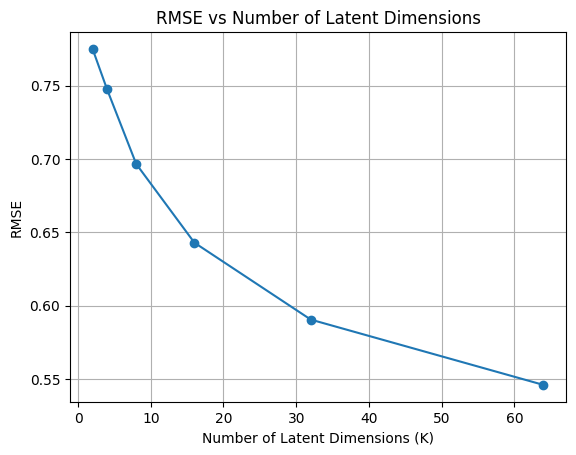

In [21]:
K_values = [2, 4, 8, 16, 32,64]
best_rmse = float('inf')
best_k = None
rmse_results = []
lambd = 0.5
gamma = 0.1
tau = 0.5

for K in K_values:
    print(f'Training with K={K}')
    users_biases = np.zeros(len(user_train_data))
    movies_biases = np.zeros(len(movie_train_data))
    users_latent = np.random.normal(0, 1 / np.sqrt(K), size=(K, len(user_train_data)))
    movies_latent = np.random.normal(0, 1 / np.sqrt(K), size=(K, len(movie_train_data)))

    loss_values_val = []
    rmse_values_val = []
    loss_values = []
    rmse_values = []

    for _ in tqdm(range(10)):
        calculate_user_bias(lambd,gamma,tau)
        update_user_latent_factors(lambd,gamma,tau,K)
        
        calculate_movie_bias(lambd,gamma,tau)
        update_movie_latent_factors(lambd,gamma,tau,K)
        
        loss = calculate_loss(lambd,gamma,tau)
        loss_values.append((lambd / 2) * loss)

        n, rmse = calculate_rmse(lambd,gamma,tau)
        rmse_values.append(rmse)

        loss_val = calculate_loss_val(lambd,gamma,tau)
        loss_values_val.append((lambd / 2) * loss_val)

        n_val, rmse_val = calculate_rmse_val(lambd,gamma,tau)
        rmse_values_val = rmse_val

    rmse = rmse_values_val
    rmse_results.append((K, rmse))

    if rmse < best_rmse:
        best_rmse = rmse
        best_k = K

print(f'Best K: {best_k}, with RMSE: {best_rmse}')

import matplotlib.pyplot as plt

ks, rmses = zip(*rmse_results)
plt.plot(ks, rmses, marker='o')
plt.xlabel('Number of Latent Dimensions (K)')
plt.ylabel('RMSE')
plt.title('RMSE vs Number of Latent Dimensions')
plt.savefig('rmse_vs_latent_dim_small_ds.svg')
plt.grid()
plt.show()


<h1>ALS with latent factors and biases</h1>

<h3>ALS, biases + U, V matrices in train test only (random split)</h3>

In [4]:
dataset = DataStructureForRecommendation('/var/autofs/misc/home/omer/Desktop/ml-32m/ratings.csv')

movie_train_data, movie_test_data = dataset.get_train_test_movies()
user_train_data, user_test_data = dataset.get_train_test_user()

movie_to_idx = dataset.get_movie_from_index(1)
user_to_idx = dataset.get_user_from_index(1)
movies_user = []
rating_user = []
users_movie = []
rating_movie = []
for i in range(len(user_train_data)):
    if len(movies_user) <= i: 
        movies_user.append([])

    if len(rating_user) <= i:
        rating_user.append([])

    for movie, rating in user_train_data[i]:
        movies_user[i].append(movie)
        rating_user[i].append(rating)
        
for i in range(len(movie_train_data)):
    if len(users_movie) <= i: 
        users_movie.append([])

    if len(rating_movie) <= i:
        rating_movie.append([])

    for user, rating in movie_train_data[i]:
        users_movie[i].append(user)
        rating_movie[i].append(rating)
movies_user_test = []
rating_user_test = []
users_movie_test = []
rating_movie_test = []
for i in range(len(user_test_data)):
    if len(movies_user_test) <= i: 
        movies_user_test.append([])

    if len(rating_user_test) <= i:
        rating_user_test.append([])

    for movie, rating in user_test_data[i]:
        movies_user_test[i].append(movie)
        rating_user_test[i].append(rating)
        
for i in range(len(movie_test_data)):
    if len(users_movie_test) <= i: 
        users_movie_test.append([])

    if len(rating_movie_test) <= i:
        rating_movie_test.append([])

    for user, rating in movie_test_data[i]:
        users_movie_test[i].append(user)
        rating_movie_test[i].append(rating)


In [5]:
def update_user_latent_factors(lambd,gamma,tau,factors):
    for i in range(len(user_train_data)):
        x = np.zeros(factors)
        y = np.zeros((factors, factors))
        actual_rating = rating_user[i]
        movies_ids = movies_user[i]
        movie_index = [movie_to_idx[movie_id] for movie_id in movies_ids]
        error = actual_rating - users_biases[i] - movies_biases[movie_index]
        x = movies_latent[:, movie_index] * error
        x = np.sum(x, axis=1)
        y = np.matmul(movies_latent[:, movie_index], movies_latent[:, movie_index].T)
        y += np.identity(factors) * tau  
        users_latent[:, i] = np.linalg.solve(lambd * y, lambd * x)


def update_movie_latent_factors(lambd,gamma,tau,factors):
    for i in range(len(movie_train_data)):
        x = np.zeros(factors)
        y = np.zeros((factors, factors))
        actual_rating = rating_movie[i]
        users_ids = users_movie[i]
        user_index = [user_to_idx[user_id] for user_id in users_ids]
        error = actual_rating - movies_biases[i] - users_biases[user_index]
        x = users_latent[:, user_index] * error
        x = np.sum(x, axis=1)
        y = np.matmul(users_latent[:, user_index], users_latent[:, user_index].T)
        y += np.identity(factors) * tau  
        movies_latent[:, i] = np.linalg.solve(lambd * y, lambd * x)


def calculate_user_bias(lambd,gamma,tau):
        for i in range(len(user_train_data)):
            bias_sum = 0
            actual_rating = rating_user[i]
            movies_ids = movies_user[i]
            movie_index = [movie_to_idx[movie_id] for movie_id in movies_ids]
            x = np.dot(users_latent[:,i].T,movies_latent[:,movie_index])
            y = x + movies_biases[movie_index]
            actual_rating = np.array(actual_rating)
            bias_sum = lambd * (actual_rating - y)
            bias_sum = np.sum(bias_sum, axis=0)
            bias = bias_sum / ( (lambd * len(actual_rating)) + gamma)
            users_biases[i] = bias
        return users_biases

def calculate_movie_bias(lambd,gamma,tau):
        for i in range(len(movie_train_data)):
            bias_sum = 0
            actual_rating = rating_movie[i]
            users_ids = users_movie[i]
            user_index = [user_to_idx[user_id] for user_id in users_ids]
            x = np.dot(movies_latent[:,i].T,users_latent[:,user_index])
            y = x + users_biases[user_index]
            actual_rating = np.array(actual_rating)
            bias_sum = lambd * (actual_rating - y)
            bias_sum = np.sum(bias_sum, axis=0)
            bias = bias_sum / ( (lambd * len(actual_rating)) + gamma)
            movies_biases[i] = bias
        return movies_biases


def calculate_loss(lambd,gamma,tau):
    overall_loss = 0
    n = 0
    for i in range(len(user_train_data)):
            movies_ids = movies_user[i]
            actual_rating = rating_user[i]
            movie_index = [movie_to_idx[movie_id] for movie_id in movies_ids]
            x = np.dot(users_latent[:,i].T, movies_latent[:,movie_index])
            y = x + users_biases[i] + movies_biases[movie_index]
            error = actual_rating - y
            loss = error ** 2
            loss = np.sum(loss, axis=0)
            overall_loss += loss
            n += len(actual_rating) 
    return overall_loss / n


def calculate_loss_test(lambd,gamma,tau):
    overall_loss = 0
    n = 0
    for i in range(len(user_test_data)):
            movies_ids = movies_user_test[i]
            actual_rating = rating_user_test[i]
            movie_index = [movie_to_idx[movie_id] for movie_id in movies_ids]
            x = np.dot(users_latent[:,i].T, movies_latent[:,movie_index])
            y = x + users_biases[i] + movies_biases[movie_index]
            error = actual_rating - y
            loss = error ** 2
            loss = np.sum(loss, axis=0)
            overall_loss += loss
            n += len(actual_rating)  
    return overall_loss / n
    



def calculate_rmse_test(lambd,gamma,tau):
    rmse = 0
    n = 0
    for i in range(len(user_test_data)):
        movies_ids = movies_user_test[i]
        actual_rating = rating_user_test[i]
        movie_index = [movie_to_idx[movie_id] for movie_id in movies_ids]
        x = np.dot(users_latent[:,i].T, movies_latent[:,movie_index])
        y = x + users_biases[i] + movies_biases[movie_index]
        error = actual_rating - y
        loss = error ** 2
        loss = np.sum(loss, axis=0)
        rmse += loss
        n += len(actual_rating)
    rmse = np.sqrt(rmse / n)
    return n, rmse


def calculate_rmse(lambd,gamma,tau):
    rmse = 0
    n = 0
    for i in range(len(user_train_data)):
        movies_ids = movies_user[i]
        actual_rating = rating_user[i]
        movie_index = [movie_to_idx[movie_id] for movie_id in movies_ids]
        x = np.dot(users_latent[:,i].T, movies_latent[:,movie_index])
        y = x + users_biases[i] + movies_biases[movie_index]
        error = actual_rating - y
        loss = error ** 2
        loss = np.sum(loss, axis=0)
        rmse += loss
        n += len(actual_rating)
    rmse = np.sqrt(rmse / n)
    return n, rmse
    
loss_values_test = []
rmse_values_test = []
loss_values = []
rmse_values = []
repeat = 10
lambd = 0.5
gamma = 0.1
tau = 0.5
factors = 32
users_latent = np.random.normal(0, 1 / math.sqrt(factors), size=(factors, len(user_train_data)))
movies_latent = np.random.normal(0, 1 / math.sqrt(factors), size=(factors, len(movie_train_data)))
users_biases = np.zeros(len(user_train_data))
movies_biases = np.zeros(len(movie_train_data))
import time
for _ in tqdm(range(repeat)):
    epoch_stime = time.time()
    
    start_time = time.time()
    calculate_user_bias(lambd,gamma,tau)
    end_time = time.time()
    execution_time = end_time - start_time
    print(f"Execution time for user bias : {execution_time:.6f} seconds")

    
    start_time = time.time()
    update_user_latent_factors(lambd,gamma,tau,factors)
    end_time = time.time()
    execution_time = end_time - start_time
    print(f"Execution time for user latent : {execution_time:.6f} seconds")

    
    start_time = time.time()
    calculate_movie_bias(lambd,gamma,tau)
    end_time = time.time()
    execution_time = end_time - start_time
    print(f"Execution time for movie bias : {execution_time:.6f} seconds")

    
    start_time = time.time()
    update_movie_latent_factors(lambd,gamma,tau,factors)
    end_time = time.time()
    execution_time = end_time - start_time
    print(f"Execution time for movie latent : {execution_time:.6f} seconds")

    
    start_time = time.time()
    loss = calculate_loss(lambd,gamma,tau)
    loss_values.append((lambd / 2) * loss)
    end_time = time.time()
    execution_time = end_time - start_time
    print(f"Execution time for train loss : {execution_time:.6f} seconds")


    start_time = time.time()
    n, rmse = calculate_rmse(lambd,gamma,tau)
    rmse_values.append(rmse)
    end_time = time.time()
    execution_time = end_time - start_time
    print(f"Execution time for train rmse : {execution_time:.6f} seconds")
    

    start_time = time.time()
    loss_test = calculate_loss_test(lambd,gamma,tau)
    loss_values_test.append((lambd / 2) * loss_test)
    end_time = time.time()
    execution_time = end_time - start_time
    print(f"Execution time for test loss : {execution_time:.6f} seconds")
    
    

    start_time = time.time()
    n_test, rmse_test = calculate_rmse_test(lambd,gamma,tau)
    rmse_values_test.append(rmse_test)
    end_time = time.time()
    execution_time = end_time - start_time
    print(f"Execution time for test rmse : {execution_time:.6f} seconds")
    
    
    
    epoch_etime = time.time()
    
    execution_epoch_time = epoch_etime - epoch_stime

    print(f' epoch {_} ended in {execution_epoch_time} : loss train {loss}, loss test {loss_test}, rmse {rmse}, rmse test {rmse_test}')


  0%|                                                    | 0/10 [00:00<?, ?it/s]

Execution time for user bias : 11.354734 seconds
Execution time for user latent : 38.032365 seconds
Execution time for movie bias : 26.068447 seconds
Execution time for movie latent : 58.651140 seconds
Execution time for train loss : 13.188047 seconds
Execution time for train rmse : 12.403347 seconds
Execution time for test loss : 4.169938 seconds


 10%|████▎                                      | 1/10 [02:47<25:11, 167.98s/it]

Execution time for test rmse : 4.115333 seconds
 epoch 0 ended in 167.98428583145142 : loss train 0.5789936065585585, loss test 0.8134749654217028, rmse 0.7609162940551073, rmse test 0.901928470235696
Execution time for user bias : 15.549035 seconds
Execution time for user latent : 51.161058 seconds
Execution time for movie bias : 31.225182 seconds
Execution time for movie latent : 48.432494 seconds
Execution time for train loss : 12.870043 seconds
Execution time for train rmse : 13.168945 seconds
Execution time for test loss : 4.028813 seconds


 20%|████████▌                                  | 2/10 [05:48<23:22, 175.30s/it]

Execution time for test rmse : 3.988639 seconds
 epoch 1 ended in 180.42522406578064 : loss train 0.46955604890284586, loss test 0.6972123635337591, rmse 0.6852415989290536, rmse test 0.8349924332194628
Execution time for user bias : 12.552834 seconds
Execution time for user latent : 38.873444 seconds
Execution time for movie bias : 24.287003 seconds
Execution time for movie latent : 49.465858 seconds
Execution time for train loss : 12.607383 seconds
Execution time for train rmse : 12.582913 seconds
Execution time for test loss : 4.202946 seconds


 30%|████████████▉                              | 3/10 [08:27<19:33, 167.67s/it]

Execution time for test rmse : 4.022840 seconds
 epoch 2 ended in 158.5961470603943 : loss train 0.4240760279473251, loss test 0.6440199448978811, rmse 0.6512112007231794, rmse test 0.8025085326012933
Execution time for user bias : 12.690617 seconds
Execution time for user latent : 41.455479 seconds
Execution time for movie bias : 23.375771 seconds
Execution time for movie latent : 50.284344 seconds
Execution time for train loss : 12.561669 seconds
Execution time for train rmse : 13.374143 seconds
Execution time for test loss : 4.367717 seconds


 40%|█████████████████▏                         | 4/10 [11:09<16:33, 165.51s/it]

Execution time for test rmse : 4.075291 seconds
 epoch 3 ended in 162.18608927726746 : loss train 0.40282336121194434, loss test 0.6197759047367212, rmse 0.6346836701948021, rmse test 0.7872584739059474
Execution time for user bias : 12.858070 seconds
Execution time for user latent : 38.541742 seconds
Execution time for movie bias : 29.418383 seconds
Execution time for movie latent : 46.724335 seconds
Execution time for train loss : 15.904126 seconds
Execution time for train rmse : 17.191828 seconds
Execution time for test loss : 4.829496 seconds


 50%|█████████████████████▌                     | 5/10 [13:59<13:56, 167.34s/it]

Execution time for test rmse : 5.127241 seconds
 epoch 4 ended in 170.59624457359314 : loss train 0.39135696509911394, loss test 0.6074260984817992, rmse 0.6255852980202731, rmse test 0.7793754541181029
Execution time for user bias : 12.875165 seconds
Execution time for user latent : 39.673228 seconds
Execution time for movie bias : 23.816121 seconds
Execution time for movie latent : 48.497178 seconds
Execution time for train loss : 12.768019 seconds
Execution time for train rmse : 13.058442 seconds
Execution time for test loss : 4.271880 seconds


 60%|█████████████████████████▊                 | 6/10 [16:38<10:58, 164.55s/it]

Execution time for test rmse : 4.176488 seconds
 epoch 5 ended in 159.13748598098755 : loss train 0.38424661115578673, loss test 0.6003571348285042, rmse 0.6198762869765118, rmse test 0.7748271644879935
Execution time for user bias : 12.592344 seconds
Execution time for user latent : 38.660748 seconds
Execution time for movie bias : 23.734967 seconds
Execution time for movie latent : 59.166186 seconds
Execution time for train loss : 16.969498 seconds
Execution time for train rmse : 16.552133 seconds
Execution time for test loss : 5.240297 seconds


 70%|██████████████████████████████             | 7/10 [19:35<08:25, 168.65s/it]

Execution time for test rmse : 4.153408 seconds
 epoch 6 ended in 177.07073712348938 : loss train 0.37937762596069113, loss test 0.5959477690999858, rmse 0.6159363814231882, rmse test 0.7719765340345429
Execution time for user bias : 12.608532 seconds
Execution time for user latent : 39.633730 seconds
Execution time for movie bias : 23.349543 seconds
Execution time for movie latent : 47.850535 seconds
Execution time for train loss : 12.659187 seconds
Execution time for train rmse : 13.800509 seconds
Execution time for test loss : 4.123720 seconds


 80%|██████████████████████████████████▍        | 8/10 [22:14<05:30, 165.26s/it]

Execution time for test rmse : 3.989588 seconds
 epoch 7 ended in 158.01653265953064 : loss train 0.37583725715902017, loss test 0.5930470732881138, rmse 0.6130556721530437, rmse test 0.7700954962133681
Execution time for user bias : 12.805644 seconds
Execution time for user latent : 38.506915 seconds
Execution time for movie bias : 23.750959 seconds
Execution time for movie latent : 47.410306 seconds
Execution time for train loss : 12.981838 seconds
Execution time for train rmse : 12.783180 seconds
Execution time for test loss : 4.074405 seconds


 90%|██████████████████████████████████████▋    | 9/10 [24:50<02:42, 162.46s/it]

Execution time for test rmse : 3.994654 seconds
 epoch 8 ended in 156.3088195323944 : loss train 0.37315957393402993, loss test 0.5910820324659541, rmse 0.6108678858264117, rmse test 0.7688185952914732
Execution time for user bias : 12.869654 seconds
Execution time for user latent : 40.497686 seconds
Execution time for movie bias : 23.772976 seconds
Execution time for movie latent : 49.118369 seconds
Execution time for train loss : 12.911193 seconds
Execution time for train rmse : 13.024347 seconds
Execution time for test loss : 4.059030 seconds


100%|██████████████████████████████████████████| 10/10 [27:30<00:00, 165.07s/it]

Execution time for test rmse : 4.120311 seconds
 epoch 9 ended in 160.37436890602112 : loss train 0.3710729425953821, loss test 0.5897233805479765, rmse 0.6091575679537947, rmse test 0.7679344897502498


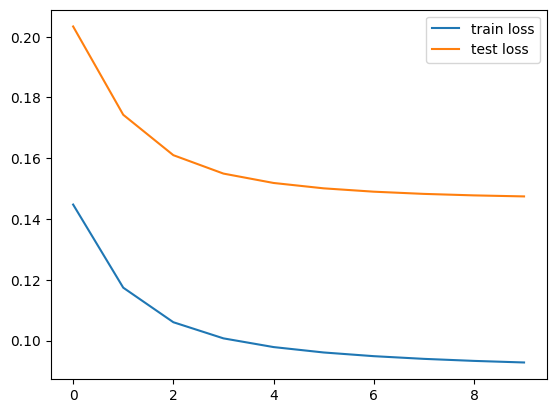

In [6]:
plt.plot(loss_values, label="Train loss")
plt.plot(loss_values_test, label="Test loss")
plt.legend(['train loss', 'test loss'])
plt.savefig('latent_bias_loss_without_val_and_timestamp.svg')


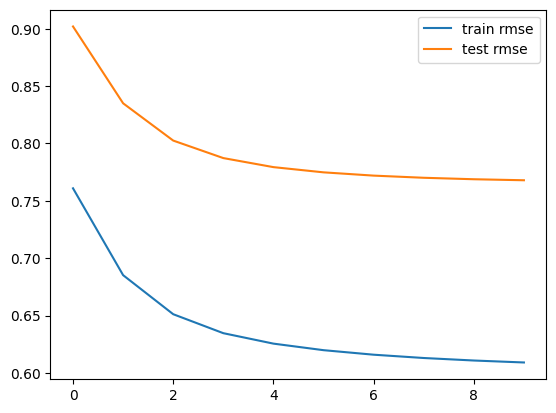

In [10]:
plt.plot(rmse_values)
plt.plot(rmse_values_test)
plt.legend(['train rmse', 'test rmse'])
plt.savefig('latent_bias_rmse_without_val_and_timestamp.svg')


In [8]:
import pickle

with open('users_latent_without_val_and_timestamp.pkl', 'wb') as file:
    pickle.dump(users_latent, file)
with open('movies_latent_without_val_and_timestamp.pkl', 'wb') as file:
    pickle.dump(movies_latent, file)
with open('users_biases_without_val_and_timestamp.pkl', 'wb') as file:
    pickle.dump(users_biases, file)
with open('movies_biases_without_val_and_timestamp.pkl', 'wb') as file:
    pickle.dump(movies_biases, file)

In [9]:
del movies_biases
del users_biases
del movies_latent
del users_latent

In [9]:
with open('/home/omer/Desktop/RC LAST/users_latent_without_val_and_timestamp.pkl', 'rb') as file:
    users_latent = pickle.load(file)
with open('/home/omer/Desktop/RC LAST/movies_latent_without_val_and_timestamp.pkl', 'rb') as file:
    movies_latent = pickle.load(file)
with open('/home/omer/Desktop/RC LAST/users_biases_without_val_and_timestamp.pkl', 'rb') as file:
    users_biases = pickle.load(file)
with open('/home/omer/Desktop/RC LAST/movies_biases_without_val_and_timestamp.pkl', 'rb') as file:
    movies_biases = pickle.load(file)

<h3>ALS, biases + U, V matrices in train, val, test  (splitted by timestamp)</h3>

In [5]:
dataset = DataStructureForRecommendationSorted('/var/autofs/misc/home/omer/Desktop/ml-32m/ratings.csv')

movie_train_data, movie_val_data, movie_test_data = dataset.get_train_test_movies()
user_train_data, user_val_data, user_test_data = dataset.get_train_test_user()

movie_to_idx = dataset.get_movie_from_index(1)
user_to_idx = dataset.get_user_from_index(1)
movies_user = []
rating_user = []
users_movie = []
rating_movie = []
for i in range(len(user_train_data)):
    if len(movies_user) <= i: 
        movies_user.append([])

    if len(rating_user) <= i:
        rating_user.append([])

    for movie, rating,_ in user_train_data[i]:
        movies_user[i].append(movie)
        rating_user[i].append(rating)
        
for i in range(len(movie_train_data)):
    if len(users_movie) <= i: 
        users_movie.append([])

    if len(rating_movie) <= i:
        rating_movie.append([])

    for user, rating,_ in movie_train_data[i]:
        users_movie[i].append(user)
        rating_movie[i].append(rating)
movies_user_test = []
rating_user_test = []
users_movie_test = []
rating_movie_test = []
for i in range(len(user_test_data)):
    if len(movies_user_test) <= i: 
        movies_user_test.append([])

    if len(rating_user_test) <= i:
        rating_user_test.append([])

    for movie, rating,_ in user_test_data[i]:
        movies_user_test[i].append(movie)
        rating_user_test[i].append(rating)
        
for i in range(len(movie_test_data)):
    if len(users_movie_test) <= i: 
        users_movie_test.append([])

    if len(rating_movie_test) <= i:
        rating_movie_test.append([])

    for user, rating,_ in movie_test_data[i]:
        users_movie_test[i].append(user)
        rating_movie_test[i].append(rating)


In [6]:
movies_user_val = []
rating_user_val = []
users_movie_val = []
rating_movie_val = []
for i in range(len(user_val_data)):
    if len(movies_user_val) <= i: 
        movies_user_val.append([])

    if len(rating_user_val) <= i:
        rating_user_val.append([])

    for movie, rating,_ in user_val_data[i]:
        movies_user_val[i].append(movie)
        rating_user_val[i].append(rating)
        
for i in range(len(movie_val_data)):
    if len(users_movie_val) <= i: 
        users_movie_val.append([])

    if len(rating_movie_val) <= i:
        rating_movie_val.append([])

    for user, rating,_ in movie_val_data[i]:
        users_movie_val[i].append(user)
        rating_movie_val[i].append(rating)

In [8]:
def update_user_latent_factors(lambd,gamma,tau,factors):
    for i in range(len(user_train_data)):
        x = np.zeros(factors)
        y = np.zeros((factors, factors))
        actual_rating = rating_user[i]
        movies_ids = movies_user[i]
        movie_index = [movie_to_idx[movie_id] for movie_id in movies_ids]
        error = actual_rating - users_biases[i] - movies_biases[movie_index]
        x = movies_latent[:, movie_index] * error
        x = np.sum(x, axis=1)
        y = np.matmul(movies_latent[:, movie_index], movies_latent[:, movie_index].T)
        y += np.identity(factors) * tau  
        users_latent[:, i] = np.linalg.solve(lambd * y, lambd * x)


def update_movie_latent_factors(lambd,gamma,tau,factors):
    for i in range(len(movie_train_data)):
        x = np.zeros(factors)
        y = np.zeros((factors, factors))
        actual_rating = rating_movie[i]
        users_ids = users_movie[i]
        user_index = [user_to_idx[user_id] for user_id in users_ids]
        error = actual_rating - movies_biases[i] - users_biases[user_index]
        x = users_latent[:, user_index] * error
        x = np.sum(x, axis=1)
        y = np.matmul(users_latent[:, user_index], users_latent[:, user_index].T)
        y += np.identity(factors) * tau  
        movies_latent[:, i] = np.linalg.solve(lambd * y, lambd * x)


def calculate_user_bias(lambd,gamma,tau):
        for i in range(len(user_train_data)):
            bias_sum = 0
            actual_rating = rating_user[i]
            movies_ids = movies_user[i]
            movie_index = [movie_to_idx[movie_id] for movie_id in movies_ids]
            x = np.dot(users_latent[:,i].T,movies_latent[:,movie_index])
            y = x + movies_biases[movie_index]
            actual_rating = np.array(actual_rating)
            bias_sum = lambd * (actual_rating - y)
            bias_sum = np.sum(bias_sum, axis=0)
            bias = bias_sum / ( (lambd * len(actual_rating)) + gamma)
            users_biases[i] = bias
        return users_biases

def calculate_movie_bias(lambd,gamma,tau):
        for i in range(len(movie_train_data)):
            bias_sum = 0
            actual_rating = rating_movie[i]
            users_ids = users_movie[i]
            user_index = [user_to_idx[user_id] for user_id in users_ids]
            x = np.dot(movies_latent[:,i].T,users_latent[:,user_index])
            y = x + users_biases[user_index]
            actual_rating = np.array(actual_rating)
            bias_sum = lambd * (actual_rating - y)
            bias_sum = np.sum(bias_sum, axis=0)
            bias = bias_sum / ( (lambd * len(actual_rating)) + gamma)
            movies_biases[i] = bias
        return movies_biases


def calculate_loss(lambd,gamma,tau):
    overall_loss = 0
    n = 0
    for i in range(len(user_train_data)):
            movies_ids = movies_user[i]
            actual_rating = rating_user[i]
            movie_index = [movie_to_idx[movie_id] for movie_id in movies_ids]
            x = np.dot(users_latent[:,i].T, movies_latent[:,movie_index])
            y = x + users_biases[i] + movies_biases[movie_index]
            error = actual_rating - y
            loss = error ** 2
            loss = np.sum(loss, axis=0)
            overall_loss += loss
            n += len(actual_rating) 
    return overall_loss / n


def calculate_loss_val(lambd,gamma,tau):
    overall_loss = 0
    n = 0
    for i in range(len(user_val_data)):
            movies_ids = movies_user_val[i]
            actual_rating = rating_user_val[i]
            movie_index = [movie_to_idx[movie_id] for movie_id in movies_ids]
            x = np.dot(users_latent[:,i].T, movies_latent[:,movie_index])
            y = x + users_biases[i] + movies_biases[movie_index]
            error = actual_rating - y
            loss = error ** 2
            loss = np.sum(loss, axis=0)
            overall_loss += loss
            n += len(actual_rating)  
    return overall_loss / n
    



def calculate_rmse_val(lambd,gamma,tau):
    rmse = 0
    n = 0
    for i in range(len(user_val_data)):
        movies_ids = movies_user_val[i]
        actual_rating = rating_user_val[i]
        movie_index = [movie_to_idx[movie_id] for movie_id in movies_ids]
        x = np.dot(users_latent[:,i].T, movies_latent[:,movie_index])
        y = x + users_biases[i] + movies_biases[movie_index]
        error = actual_rating - y
        loss = error ** 2
        loss = np.sum(loss, axis=0)
        rmse += loss
        n += len(actual_rating)
    rmse = np.sqrt(rmse / n)
    return n, rmse


def calculate_rmse(lambd,gamma,tau):
    rmse = 0
    n = 0
    for i in range(len(user_train_data)):
        movies_ids = movies_user[i]
        actual_rating = rating_user[i]
        movie_index = [movie_to_idx[movie_id] for movie_id in movies_ids]
        x = np.dot(users_latent[:,i].T, movies_latent[:,movie_index])
        y = x + users_biases[i] + movies_biases[movie_index]
        error = actual_rating - y
        loss = error ** 2
        loss = np.sum(loss, axis=0)
        rmse += loss
        n += len(actual_rating)
    rmse = np.sqrt(rmse / n)
    return n, rmse
    
loss_values_val = []
rmse_values_val = []
loss_values = []
rmse_values = []
repeat = 10
lambd = 0.5
gamma = 0.1
tau = 0.5
factors = 
users_latent = np.random.normal(0, 1 / math.sqrt(factors), size=(factors, len(user_train_data)))
movies_latent = np.random.normal(0, 1 / math.sqrt(factors), size=(factors, len(movie_train_data)))
users_biases = np.zeros(len(user_train_data))
movies_biases = np.zeros(len(movie_train_data))
import time
for _ in tqdm(range(repeat)):
    epoch_stime = time.time()
    
    start_time = time.time()
    calculate_user_bias(lambd,gamma,tau)
    end_time = time.time()
    execution_time = end_time - start_time
    print(f"Execution time for user bias : {execution_time:.6f} seconds")

    
    start_time = time.time()
    update_user_latent_factors(lambd,gamma,tau,factors)
    end_time = time.time()
    execution_time = end_time - start_time
    print(f"Execution time for user latent : {execution_time:.6f} seconds")

    
    start_time = time.time()
    calculate_movie_bias(lambd,gamma,tau)
    end_time = time.time()
    execution_time = end_time - start_time
    print(f"Execution time for movie bias : {execution_time:.6f} seconds")

    
    start_time = time.time()
    update_movie_latent_factors(lambd,gamma,tau,factors)
    end_time = time.time()
    execution_time = end_time - start_time
    print(f"Execution time for movie latent : {execution_time:.6f} seconds")

    
    start_time = time.time()
    loss = calculate_loss(lambd,gamma,tau)
    loss_values.append((lambd / 2) * loss)
    end_time = time.time()
    execution_time = end_time - start_time
    print(f"Execution time for train loss : {execution_time:.6f} seconds")


    start_time = time.time()
    n, rmse = calculate_rmse(lambd,gamma,tau)
    rmse_values.append(rmse)
    end_time = time.time()
    execution_time = end_time - start_time
    print(f"Execution time for train rmse : {execution_time:.6f} seconds")
    

    start_time = time.time()
    loss_val = calculate_loss_val(lambd,gamma,tau)
    loss_values_val.append((lambd / 2) * loss_val)
    end_time = time.time()
    execution_time = end_time - start_time
    print(f"Execution time for val loss : {execution_time:.6f} seconds")
    
    

    start_time = time.time()
    n_val, rmse_val = calculate_rmse_val(lambd,gamma,tau)
    rmse_values_val.append(rmse_val)
    end_time = time.time()
    execution_time = end_time - start_time
    print(f"Execution time for val rmse : {execution_time:.6f} seconds")
    
    
    
    epoch_etime = time.time()
    
    execution_epoch_time = epoch_etime - epoch_stime

    print(f' epoch {_} ended in {execution_epoch_time} : loss train {loss}, loss val {loss_val}, rmse {rmse}, rmse val {rmse_val}')


  0%|                                                    | 0/10 [00:00<?, ?it/s]

Execution time for user bias : 9.916328 seconds
Execution time for user latent : 43.478539 seconds
Execution time for movie bias : 24.370534 seconds
Execution time for movie latent : 49.219558 seconds
Execution time for train loss : 14.321419 seconds
Execution time for train rmse : 15.481226 seconds
Execution time for val loss : 7.971005 seconds


 10%|████▎                                      | 1/10 [02:53<25:57, 173.05s/it]

Execution time for val rmse : 8.289336 seconds
 epoch 0 ended in 173.04936909675598 : loss train 0.5721240286252576, loss val 0.7977848703675422, rmse 0.7563888078397628, rmse val 0.8931880375192797
Execution time for user bias : 13.722564 seconds
Execution time for user latent : 44.039290 seconds
Execution time for movie bias : 38.256757 seconds
Execution time for movie latent : 47.428127 seconds
Execution time for train loss : 11.395373 seconds
Execution time for train rmse : 14.352561 seconds
Execution time for val loss : 8.813080 seconds


 20%|████████▌                                  | 2/10 [05:59<24:07, 180.91s/it]

Execution time for val rmse : 8.403930 seconds
 epoch 1 ended in 186.41312217712402 : loss train 0.45476405323995334, loss val 0.6987543186176823, rmse 0.6743619601074435, rmse val 0.8359152580361734
Execution time for user bias : 13.647506 seconds
Execution time for user latent : 42.266206 seconds
Execution time for movie bias : 23.782241 seconds
Execution time for movie latent : 50.991502 seconds
Execution time for train loss : 14.545271 seconds
Execution time for train rmse : 14.827675 seconds
Execution time for val loss : 7.877987 seconds


 30%|████████████▉                              | 3/10 [08:55<20:51, 178.85s/it]

Execution time for val rmse : 8.451096 seconds
 epoch 2 ended in 176.39083576202393 : loss train 0.41168542729393415, loss val 0.6581167600287015, rmse 0.6416271715676746, rmse val 0.8112439583927276
Execution time for user bias : 14.094922 seconds
Execution time for user latent : 34.118198 seconds
Execution time for movie bias : 23.879541 seconds
Execution time for movie latent : 45.460733 seconds
Execution time for train loss : 10.922719 seconds
Execution time for train rmse : 11.881662 seconds
Execution time for val loss : 5.565313 seconds


 40%|█████████████████▏                         | 4/10 [11:27<16:48, 168.06s/it]

Execution time for val rmse : 5.608073 seconds
 epoch 3 ended in 151.5324399471283 : loss train 0.3928947987226218, loss val 0.6406210768615364, rmse 0.6268132087971837, rmse val 0.8003880789101849
Execution time for user bias : 11.246895 seconds
Execution time for user latent : 33.411243 seconds
Execution time for movie bias : 24.026488 seconds
Execution time for movie latent : 46.277869 seconds
Execution time for train loss : 12.073538 seconds
Execution time for train rmse : 11.422747 seconds
Execution time for val loss : 5.820090 seconds


 50%|█████████████████████▌                     | 5/10 [13:57<13:27, 161.49s/it]

Execution time for val rmse : 5.564148 seconds
 epoch 4 ended in 149.84425354003906 : loss train 0.38289136829418446, loss val 0.631644049241376, rmse 0.6187821654622768, rmse val 0.7947603722137736
Execution time for user bias : 12.700966 seconds
Execution time for user latent : 40.308924 seconds
Execution time for movie bias : 24.075697 seconds
Execution time for movie latent : 47.900480 seconds
Execution time for train loss : 13.038270 seconds
Execution time for train rmse : 14.481345 seconds
Execution time for val loss : 8.582260 seconds


 60%|█████████████████████████▊                 | 6/10 [16:46<10:56, 164.18s/it]

Execution time for val rmse : 8.295947 seconds
 epoch 5 ended in 169.38510012626648 : loss train 0.3767157094242853, loss val 0.6263868453340677, rmse 0.6137717079047268, rmse val 0.791446047013988
Execution time for user bias : 11.069381 seconds
Execution time for user latent : 40.904550 seconds
Execution time for movie bias : 24.339702 seconds
Execution time for movie latent : 47.670645 seconds
Execution time for train loss : 11.555454 seconds
Execution time for train rmse : 11.224782 seconds
Execution time for val loss : 5.597301 seconds


 70%|██████████████████████████████             | 7/10 [19:24<08:06, 162.22s/it]

Execution time for val rmse : 5.830368 seconds
 epoch 6 ended in 158.19352459907532 : loss train 0.37252584623787666, loss val 0.6230104241718323, rmse 0.6103489544824966, rmse val 0.789310093798269
Execution time for user bias : 10.939596 seconds
Execution time for user latent : 39.966768 seconds
Execution time for movie bias : 38.259771 seconds
Execution time for movie latent : 48.737916 seconds
Execution time for train loss : 11.147939 seconds
Execution time for train rmse : 11.253677 seconds
Execution time for val loss : 5.840341 seconds


 80%|██████████████████████████████████▍        | 8/10 [22:16<05:30, 165.25s/it]

Execution time for val rmse : 5.576751 seconds
 epoch 7 ended in 171.72414445877075 : loss train 0.36950539779576924, loss val 0.62069505976819, rmse 0.6078695565627293, rmse val 0.7878420271654654
Execution time for user bias : 10.999356 seconds
Execution time for user latent : 34.334793 seconds
Execution time for movie bias : 24.870266 seconds
Execution time for movie latent : 56.003217 seconds
Execution time for train loss : 14.669535 seconds
Execution time for train rmse : 14.419096 seconds
Execution time for val loss : 8.158243 seconds


 90%|██████████████████████████████████████▋    | 9/10 [25:05<02:46, 166.56s/it]

Execution time for val rmse : 5.994823 seconds
 epoch 8 ended in 169.45065450668335 : loss train 0.36723562522126174, loss val 0.6190214378447937, rmse 0.6059996907765397, rmse val 0.7867791544294966
Execution time for user bias : 10.847011 seconds
Execution time for user latent : 38.702836 seconds
Execution time for movie bias : 23.620969 seconds
Execution time for movie latent : 47.907309 seconds
Execution time for train loss : 10.899920 seconds
Execution time for train rmse : 11.033339 seconds
Execution time for val loss : 5.722245 seconds


100%|██████████████████████████████████████████| 10/10 [27:42<00:00, 166.23s/it]

Execution time for val rmse : 7.615938 seconds
 epoch 9 ended in 156.35065269470215 : loss train 0.36547766536640447, loss val 0.6177645158851819, rmse 0.6045474880986641, rmse val 0.7859799716819647


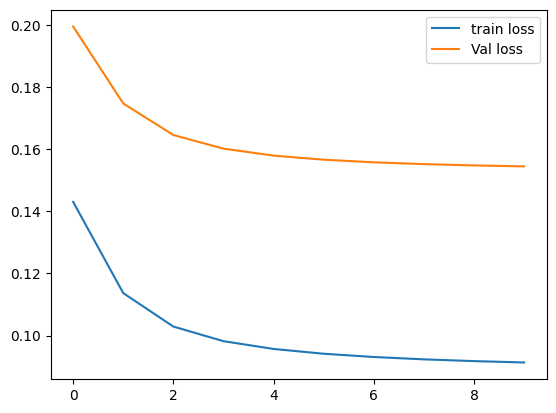

In [9]:
plt.plot(loss_values, label="Train loss")
plt.plot(loss_values_val, label="Val loss")
plt.legend(['train loss', 'Val loss'])
plt.savefig('latent_bias_loss_with_val_and_timestamp.svg')


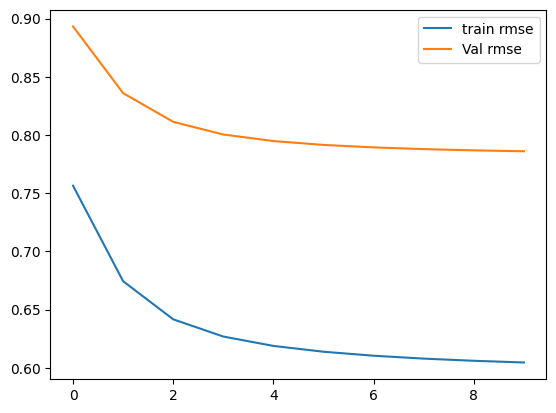

In [11]:
plt.plot(rmse_values)
plt.plot(rmse_values_val)
plt.legend(['train rmse', 'Val rmse'])
plt.savefig('latent_bias_rmse_with_val_and_timestamp.svg')


In [12]:
import pickle

with open('users_latent_with_val_and_timestamp.pkl', 'wb') as file:
    pickle.dump(users_latent, file)
with open('movies_latent_with_val_and_timestamp.pkl', 'wb') as file:
    pickle.dump(movies_latent, file)
with open('users_biases_with_val_and_timestamp.pkl', 'wb') as file:
    pickle.dump(users_biases, file)
with open('movies_biases_with_val_and_timestamp.pkl', 'wb') as file:
    pickle.dump(movies_biases, file)

In [36]:
del movies_biases
del users_biases
del movies_latent
del users_latent

In [14]:
with open('users_latent_with_val_and_timestamp.pkl', 'rb') as file:
    users_latent = pickle.load(file)
with open('movies_latent_with_val_and_timestamp.pkl', 'rb') as file:
    movies_latent = pickle.load(file)
with open('users_biases_with_val_and_timestamp.pkl', 'rb') as file:
    users_biases = pickle.load(file)
with open('movies_biases_with_val_and_timestamp.pkl', 'rb') as file:
    movies_biases = pickle.load(file)

In [15]:
def calculate_rmse_test(lambd,gamma,tau):
    rmse = 0
    n = 0
    for i in range(len(user_test_data)):
        movies_ids = movies_user_test[i]
        actual_rating = rating_user_test[i]
        movie_index = [movie_to_idx[movie_id] for movie_id in movies_ids]
        x = np.dot(users_latent[:,i].T, movies_latent[:,movie_index])
        y = x + users_biases[i] + movies_biases[movie_index]
        error = actual_rating - y
        loss = error ** 2
        loss = np.sum(loss, axis=0)
        rmse += loss
        n += len(actual_rating)
    rmse = np.sqrt(rmse / n)
    return n, rmse

In [16]:
_ , rmse_test = calculate_rmse_test(lambd,gamma,tau)
print(rmse_test)

0.8142448655206558


<h1>Prediction</h1>

In [21]:
movies.loc[movies["movieId"] == 1]

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [39]:
movies = pd.read_csv("/var/autofs/misc/home/omer/Desktop/ml-32m/movies.csv")

def calculate_dummy_user_bias(user_dummy, iterations, dummy_user_latent):
    bias_sum = 0
    item_counter = 0
    for i in range(len(user_dummy)):
        movie_id = user_dummy[i][0]
        rating = user_dummy[i][1]
        movie_index = movie_to_idx[movie_id]
        
        if iterations == 0:
            bias_sum += lambd * (rating - movies_biases[movie_index])
        else:
            bias_sum += lambd * (rating - 
                (np.dot(dummy_user_latent.T, movies_latent[:, movie_index]) + 
                 movies_biases[movie_index]))
        
        item_counter += 1
        
    if item_counter > 0:
        bias = bias_sum / ((lambd * item_counter) + gamma)
        return bias

def update_user_latent_dummy(dummy_user, dummy_user_bias):
    x = np.zeros(factors)
    y = np.zeros((factors, factors))
    for j in range(len(dummy_user)):
        actual_rating = dummy_user[j][1]
        movie_id = dummy_user[j][0]
        movie_index = movie_to_idx[movie_id]
        error = actual_rating - dummy_user_bias - movies_biases[movie_index]
        x += movies_latent[:, movie_index] * error
        y += np.outer(movies_latent[:, movie_index].T, movies_latent[:, movie_index])
    
    y += np.identity(factors) * tau 
    return np.matmul(np.linalg.inv(lambd * y), lambd * x)


In [40]:
user_dummy = [(4896, 5.0)]
dummy_user_latent = np.zeros(32)

iterations = 10
for _ in tqdm(range(iterations)):
    dummy_user_bias = calculate_dummy_user_bias(user_dummy, _, dummy_user_latent)
    dummy_user_latent = update_user_latent_dummy(user_dummy, dummy_user_bias)

preds = []
for i in range(len(movie_to_idx)):
    preds.append(np.dot(dummy_user_latent.T, movies_latent[:, i]) + (0.000000005 * movies_biases[i]))

pred_df = pd.DataFrame(preds, columns=["predictions"])
pred_df = pred_df.sort_values("predictions", ascending=False)

idx_to_movie = dataset.idx_to_movie
best_match = list(pred_df.head(100).index)

for i in range(5):
    print(movies.loc[movies["movieId"] == idx_to_movie[best_match[i]]])


100%|█████████████████████████████████████████| 10/10 [00:00<00:00, 2192.07it/s]

       movieId                                          title  \
13513    69844  Harry Potter and the Half-Blood Prince (2009)   

                                       genres  
13513  Adventure|Fantasy|Mystery|Romance|IMAX  
       movieId                                             title  \
11702    54001  Harry Potter and the Order of the Phoenix (2007)   

                             genres  
11702  Adventure|Drama|Fantasy|IMAX  
      movieId                                           title  \
5705     5816  Harry Potter and the Chamber of Secrets (2002)   

                 genres  
5705  Adventure|Fantasy  
       movieId                                              title  \
16721    88125  Harry Potter and the Deathly Hallows: Part 2 (...   

                                            genres  
16721  Action|Adventure|Drama|Fantasy|Mystery|IMAX  
       movieId                                              title  \
15541    81834  Harry Potter and the Deathly Hallows: Part 1 (.

<h1>Visulaize movies latent factors</h1>

In [16]:
movies = pd.read_csv("/var/autofs/misc/home/omer/Desktop/ml-32m/movies.csv")


In [33]:
dataset = DataStructureForRecommendation('/var/autofs/misc/home/omer/Desktop/ml-32m/ratings.csv')


In [40]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [38]:
movie_to_idx = dataset.get_movie_from_index(1)
user_to_idx = dataset.get_user_from_index(1)

In [54]:
movie_to_idx[4791]

31184

In [42]:
idx_to_movie = dataset.idx_to_movie
idx_to_movie[415]

1

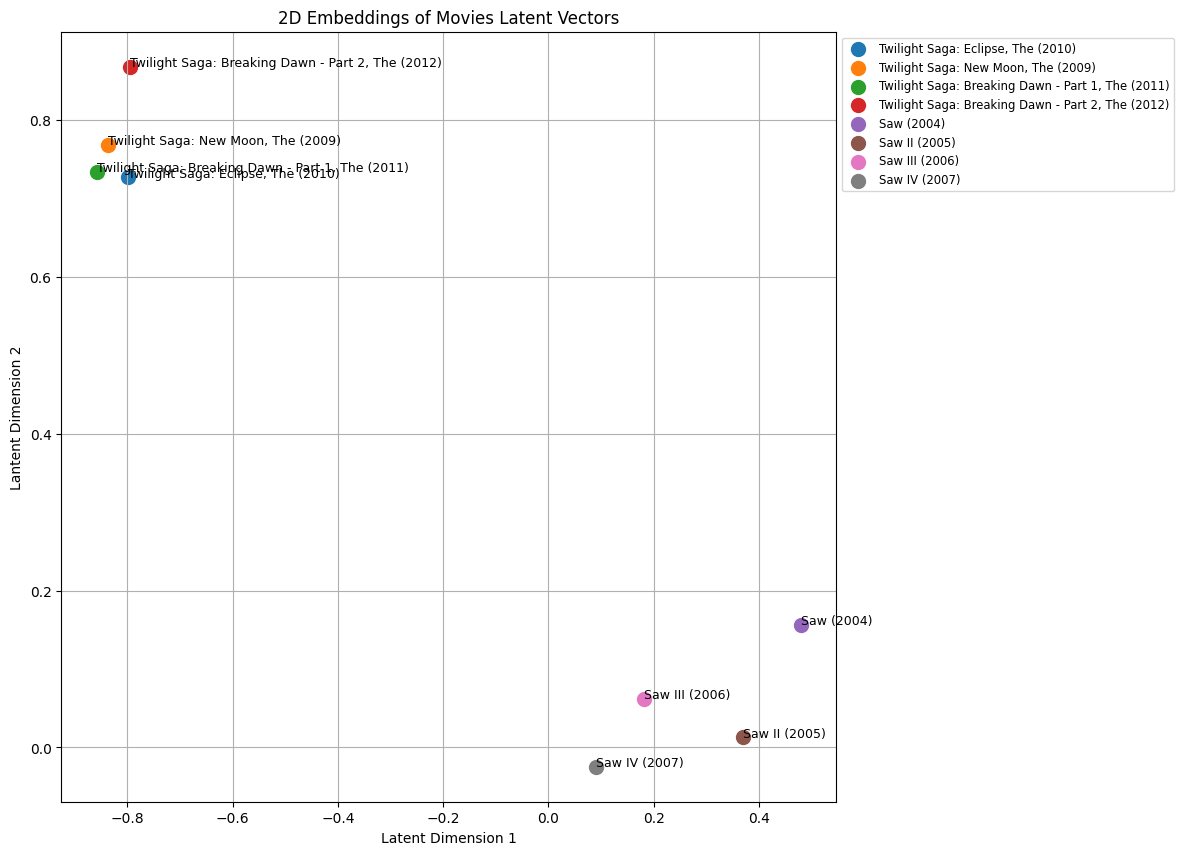

In [17]:
import matplotlib.pyplot as plt


def plot_movie_embeddings(movie_ids, movies_latent, movies_biases, movie_to_idx, movies_df):
  
    selected_vectors = np.array([movies_latent[:, movie_to_idx[movie_id]] for movie_id in movie_ids])
    selected_biases = np.array([movies_biases[movie_to_idx[movie_id]] for movie_id in movie_ids])
    scaled_vectors = selected_vectors * (1 + 0.05 * selected_biases[:, np.newaxis])

    plt.figure(figsize=(10, 10))
    
    for i, movie_id in enumerate(movie_ids):
        title = movies_df.loc[movies_df["movieId"] == movie_id, "title"].iloc[0]
        plt.scatter(scaled_vectors[i, 0], scaled_vectors[i, 1], s=100, label=title)
        plt.text(scaled_vectors[i, 0], scaled_vectors[i, 1], title, fontsize=9)

    plt.title("2D Embeddings of Movies Latent Vectors")
    plt.xlabel("Latent Dimension 1")
    plt.ylabel("Lantent Dimension 2")
    plt.savefig("2d_embeddings.svg")
    plt.legend(loc="upper left", fontsize="small", bbox_to_anchor=(1, 1))
    plt.grid()
    plt.show()
    
# 8957,39446,48877,55577
movie_ids = [78772, 72407, 91104, 98203,8957,39446,48877,55577]
plot_movie_embeddings(movie_ids, movies_latent, movies_biases, movie_to_idx, movies)


<h1>Most and least polarizing movies </h1>

<h2>Using the dataset</h2>

In [4]:
dataset = DataStructureForRecommendation('/var/autofs/misc/home/omer/Desktop/ml-32m/ratings.csv')


In [5]:
movie_to_idx = dataset.get_movie_from_index(1)
user_to_idx = dataset.get_user_from_index(1)
idx_to_movie = dataset.idx_to_movie


In [6]:
ratings = dataset.ratings

polarization = ratings.groupby('movieId')['rating'].agg(['mean', 'std', 'count']).reset_index()
polarization = polarization[polarization['count'] > 20]
most_polarizing = polarization.sort_values(by='std', ascending=False).head(10)
least_polarizing = polarization.sort_values(by='std', ascending=True).head(10)

movies = pd.read_csv("/var/autofs/misc/home/omer/Desktop/ml-32m/movies.csv")
most_polarizing = most_polarizing.merge(movies, on='movieId')
least_polarizing = least_polarizing.merge(movies, on='movieId')

print("Most Polarizing Movies:")
print(most_polarizing[['title', 'mean', 'std', 'count']])

print("\nLeast Polarizing Movies:")
print(least_polarizing[['title', 'mean', 'std', 'count']])


Most Polarizing Movies:
                                         title      mean       std  count
0                          Twisted Pair (2018)  2.612903  1.904861     31
1          Loose Change: Second Edition (2006)  2.951613  1.863486     31
2  What the Bleep! Down the Rabbit Hole (2006)  2.962963  1.849771     27
3                      Fateful Findings (2013)  2.753165  1.836024     79
4             One Direction: This Is Us (2013)  2.390244  1.804550     41
5                      Kids of Survival (1996)  2.979167  1.772245     24
6                Anatomy of a Love Seen (2014)  2.285714  1.757636     21
7               The Sound of Music Live (2013)  2.350000  1.707741     30
8                    Santa with Muscles (1996)  2.552147  1.707476    163
9                         Black Is King (2020)  2.234375  1.703812     32

Least Polarizing Movies:
                                       title      mean       std  count
0                             The Net (2016)  3.666667  0.350982

<h2>using the STD</h2>

In [34]:
data_by_user = dataset.get_all_users_list()
data_by_movie = dataset.get_all_movies_list()

In [36]:
movies_user = []

for i in range(len(data_by_movie)):
    if len(movies_user) <= i: 
        movies_user.append([])

    for user, rating in data_by_movie[i]:
        movies_user[i].append(user)



In [83]:
predictions = []
for i in range(len(data_by_movie)):
    predictions.append([])
    users_ids = movies_user[i]
    user_index = [user_to_idx[user_id] for user_id in users_ids]
    predictions[i] = np.dot(movies_latent[:,i].T,users_latent[:,user_index]) + users_biases[user_index] + movies_biases[i]
    
    # error = actual_rating - movies_biases[i] - users_biases[user_index]
    # x = users_latent[:, user_index] * error
    # x = np.sum(x, axis=1)
    # y = np.matmul(users_latent[:, user_index], users_latent[:, user_index].T)
    # y += np.identity(factors) * tau  
    # movies_latent[:, i] = np.linalg.solve(lambd * y, lambd * x)


In [88]:
pred_std = []
for i in range(len(predictions)):
    pred_std.append(np.std(predictions[i]))

In [89]:
least_indices_std = np.argsort(pred_std)

In [90]:
def check_count(movie_id):
    if (x[x['movieId'] == movie_id]['count'] > 20).values[0]:
        return True
    else :
        return False
    

In [99]:
least_polarizing_movies_std = []
for i in range(len(least_indices_std)):
    if check_count(idx_to_movie[least_indices_std[i]]):           
        least_polarizing_movies_std.append((movies[movies['movieId'] == idx_to_movie[least_indices_std[i]]],pred_std[least_indices_std[i]]))
    else:
        continue

In [100]:
least_polarizing_movies_std[0:10]

[(       movieId           title genres
  55098   189527  The Net (2016)  Drama,
  0.25891849949431295),
 (       movieId                 title         genres
  34258   144436  House of Fury (2005)  Action|Comedy,
  0.26289534185763885),
 (       movieId                     title       genres
  77766   259351  The Lost Leonardo (2021)  Documentary,
  0.2865240763846602),
 (       movieId                          title          genres
  22010   113073  Two Lives (Zwei Leben) (2012)  Drama|Thriller,
  0.2926126521836973),
 (       movieId               title                          genres
  14754    78186  Sniper, The (1952)  Crime|Drama|Film-Noir|Thriller,
  0.2943154242687916),
 (       movieId                    title          genres
  11995    56485  Return to Sender (2004)  Drama|Thriller,
  0.31272607532447033),
 (       movieId                                      title              genres
  51374   181757  Louis Theroux: Louis and the Nazis (2003)  (no genres listed),
  0.315727

<h2>using the Norm</h2>

In [101]:
movies_norms = []
for i in range(movies_latent.shape[1]):
    movies_norms.append(np.linalg.norm(movies_latent[:,i]))

In [102]:
len(movies_norms)

84432

In [103]:
least_indices_norm = np.argsort(movies_norms)

In [104]:
least_polarizing_movies_norm = []
for i in range(len(least_indices_norm)):
    if check_count(idx_to_movie[least_indices_norm[i]]):           
        least_polarizing_movies_norm.append((movies[movies['movieId'] == idx_to_movie[least_indices_norm[i]]],movies_norms[least_indices_norm[i]]))
    else:
        continue

In [108]:
least_polarizing_movies_norm[0]

(       movieId                 title         genres
 34258   144436  House of Fury (2005)  Action|Comedy,
 0.40788100810913863)

<h2>putting the norm and the std together</h2>

In [116]:
df_std = pd.DataFrame([
    {
        'movieId': tup[0]['movieId'].values[0],
        'title': tup[0]['title'].values[0],
        'std_dev': tup[1]
    }
    for tup in least_polarizing_movies_std
])

# Create DataFrame for Latent Vector Norms
df_norm = pd.DataFrame([
    {
        'movieId': tup[0]['movieId'].values[0],
        'title': tup[0]['title'].values[0],
        'latent_norm': tup[1]
    }
    for tup in least_polarizing_movies_norm
])


In [117]:
df_std.head()

,movieId,title,std_dev
0,189527,The Net (2016),0.258918
1,144436,House of Fury (2005),0.262895
2,259351,The Lost Leonardo (2021),0.286524
3,113073,Two Lives (Zwei Leben) (2012),0.292613
4,78186,"Sniper, The (1952)",0.294315


In [118]:
df_norm.head()

,movieId,title,latent_norm
0,144436,House of Fury (2005),0.407881
1,79846,Spider Forest (Geomi sup) (2004),0.640812
2,144374,Psychometry (2013),0.779359
3,8340,Escape from Alcatraz (1979),0.817690
4,161968,Dough (2015),0.833405


In [119]:
df_combined = pd.merge(df_std, df_norm, on=['movieId', 'title'], how='outer')

In [120]:
df_combined.head()

,movieId,title,std_dev,latent_norm
0,1,Toy Story (1995),0.743038,1.556323
1,2,Jumanji (1995),0.715513,1.386582
2,3,Grumpier Old Men (1995),0.794126,1.684521
3,4,Waiting to Exhale (1995),0.877314,2.259768
4,5,Father of the Bride Part II (1995),0.781209,1.295529


In [126]:
df_combined.sort_values(by='latent_norm', ascending=True)

,movieId,title,std_dev,latent_norm
17621,144436,House of Fury (2005),0.262895,0.407881
12801,79846,Spider Forest (Geomi sup) (2004),0.594735,0.640812
17609,144374,Psychometry (2013),0.458959,0.779359
7419,8340,Escape from Alcatraz (1979),0.450477,0.817690
18543,161968,Dough (2015),0.390635,0.833405
...,...,...,...,...
3699,3913,Barenaked in America (1999),1.115469,5.242451
12419,74754,"Room, The (2003)",1.322111,5.336578
8181,26157,Manos: The Hands of Fate (1966),1.252253,5.617301
13574,89281,Birdemic: Shock and Terror (2010),1.289856,6.133512


In [127]:
mean_std=np.mean(df_combined['std_dev'])

In [158]:
top_10_high_norm = df_combined.nlargest(10, 'latent_norm')
top_10_high_norm

,movieId,title,std_dev,latent_norm,residuals
17859,148426,Fateful Findings (2013),1.578272,6.141332,0.170094
13574,89281,Birdemic: Shock and Terror (2010),1.289856,6.133512,-0.117140
8181,26157,Manos: The Hands of Fate (1966),1.252253,5.617301,-0.076701
12419,74754,"Room, The (2003)",1.322111,5.336578,0.035597
3699,3913,Barenaked in America (1999),1.115469,5.242451,-0.156815
11933,70366,"Silent Night, Deadly Night Part 2 (1987)",0.896086,5.159497,-0.363657
5652,5939,"Man Who Saves the World, The (Dünyayi Kurtaran...",1.147672,5.012164,-0.089797
11098,59295,Expelled: No Intelligence Allowed (2008),1.431452,4.959569,0.201934
20732,194680,Twisted Pair (2018),1.457564,4.827200,0.248058
15185,108579,Samurai Cop (1989),1.236650,4.800586,0.031167


In [159]:
top_10_low_norm = df_combined.nsmallest(10, 'latent_norm')
top_10_low_norm

,movieId,title,std_dev,latent_norm,residuals
17621,144436,House of Fury (2005),0.262895,0.407881,-0.278494
12801,79846,Spider Forest (Geomi sup) (2004),0.594735,0.640812,0.018131
17609,144374,Psychometry (2013),0.458959,0.779359,-0.138591
7419,8340,Escape from Alcatraz (1979),0.450477,0.817690,-0.152868
18543,161968,Dough (2015),0.390635,0.833405,-0.215085
18222,156692,How To Plan An Orgy in a Small Town (2015),0.391778,0.845272,-0.215737
5699,5989,Catch Me If You Can (2002),0.518425,0.855818,-0.090684
15691,115556,Films to Keep You Awake: The Baby's Room (Pelí...,0.443902,0.858348,-0.165590
18199,155917,The House of Fear (1945),0.390803,0.859228,-0.218822
16642,132106,Weather Girl (2009),0.618350,0.876803,0.006069


In [160]:
top_10_high_std=np.mean(top_10_high_norm['std_dev'])
top_10_high_std

1.2727385850973059

In [161]:
top_10_low_std=np.mean(top_10_low_norm['std_dev'])
top_10_low_std

0.4520960840861151

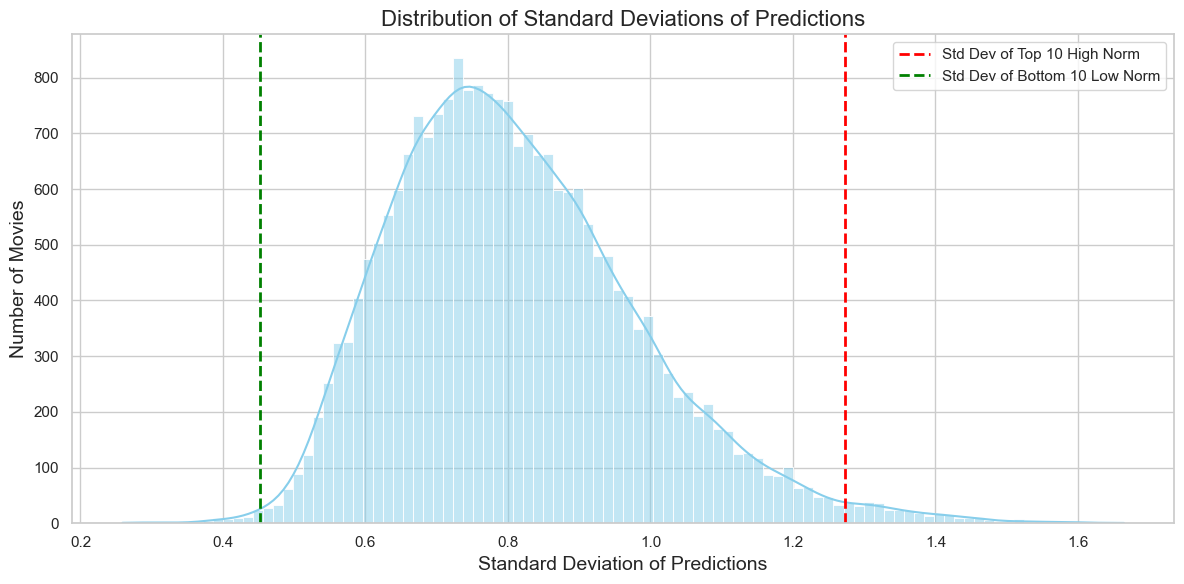

In [163]:
plt.figure(figsize=(12, 6))
sns.histplot(df_combined['std_dev'], bins=100, kde=True, color='skyblue')
plt.title('Distribution of Standard Deviations of Predictions', fontsize=16)
plt.xlabel('Standard Deviation of Predictions', fontsize=14)
plt.ylabel('Number of Movies', fontsize=14)

plt.axvline(x=top_10_high_std, color='red', linestyle='--', linewidth=2, label='Std Dev of Top 10 High Norm')
plt.axvline(x=top_10_low_std, color='green', linestyle='--', linewidth=2, label='Std Dev of Bottom 10 Low Norm')

plt.legend()
plt.savefig('std vs norm.svg')
plt.tight_layout()
plt.show()


In [168]:
with open("idx_to_movie.pkl","wb") as file:
    pickle.dump(idx_to_movie,file)

In [190]:
def search_movie(movie_name):
  movie_name_lower = movie_name.lower()
  result = movies[movies['title'].str.lower().str.contains(movie_name_lower)][['movieId', 'title']]
  if len(result) > 0:
    return result.to_dict('records')
  else:
    return None

In [193]:
def search_movie(movie_name):
  movie_name_lower = movie_name.lower()
  result = movies[movies['title'].str.lower().str.contains(movie_name_lower)][['movieId', 'title']]
  if len(result) > 0:
    return result.to_dict('records')
  else:
    return None
def movie_info(movie_name):
    movie_inf = search_movie(movie_name)
    if movie_inf:
        for movie in movie_inf:
            return movie['movieId']
    else:
        return 1

movie_info("Harry Potter and the Philosopher's Stone")

4896